# Libraries

In [84]:
import pandas  as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit,RandomizedSearchCV,train_test_split,KFold,cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import gc

from xgboost import XGBClassifier
import os
import joblib
import random
from random import sample
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy
from itertools import product
from collections import defaultdict
from scipy import stats
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score
from scipy.stats import boxcox, skew, kurtosis
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
#warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# Data 

In [85]:
seed= 0 

In [86]:
df = pd.read_csv('model_data.csv',sep='|',low_memory=False)

In [87]:
df.head()

Unnamed: 0       loan_id  act_period channel  orig_rate  orig_upb  \
0           0  523899932680  2010-04-20       C      4.750  239000.0   
1           1  239106981350  2009-06-20       C      5.250   80000.0   
2           2  667907597231  2018-05-20       R      2.875  210000.0   
3           3  940076896427  2012-05-20       B      6.875  134000.0   
4           4  849058792149  2005-04-20       C      5.625  113000.0   

   orig_term   orig_date   first_pay  loan_age  ...  target last_period  \
0      360.0  2009-01-20  2009-03-20      14.0  ...       A         NaN   
1      180.0  2002-10-20  2003-01-20      81.0  ...       P  2009-06-20   
2      180.0  2012-12-20  2013-02-20      64.0  ...       A         NaN   
3      360.0  2002-09-20  2002-11-20     116.0  ...       P  2012-05-20   
4      180.0  2002-08-20  2002-10-20      31.0  ...       A         NaN   

   calc_age  age_dif  calc_rem_months  cscore_min       orig_val  Vintage  \
0        15      1.0              346       778.0  412068.965517     2009   
1        81      NaN               99       776.0  129032.258065     2002   
2        65      1.0              116       707.0  344262.295082     2012   
3       116      NaN              244       710.0  138144.329897     2002   
4        33      2.0              149       792.0  182258.064516     2002   

  Prepay Default  
0      0       0  
1      1       0  
2      0       0  
3      1       0  
4      0       0  

[5 rows x 44 columns]

In [88]:
df.shape

(557640, 44)

In [89]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [90]:
df.head()

loan_id  act_period channel  orig_rate  orig_upb  orig_term  \
0  523899932680  2010-04-20       C      4.750  239000.0      360.0   
1  239106981350  2009-06-20       C      5.250   80000.0      180.0   
2  667907597231  2018-05-20       R      2.875  210000.0      180.0   
3  940076896427  2012-05-20       B      6.875  134000.0      360.0   
4  849058792149  2005-04-20       C      5.625  113000.0      180.0   

    orig_date   first_pay  loan_age  rem_months  ... target  last_period  \
0  2009-01-20  2009-03-20      14.0       346.0  ...      A          NaN   
1  2002-10-20  2003-01-20      81.0        99.0  ...      P   2009-06-20   
2  2012-12-20  2013-02-20      64.0       116.0  ...      A          NaN   
3  2002-09-20  2002-11-20     116.0       244.0  ...      P   2012-05-20   
4  2002-08-20  2002-10-20      31.0       149.0  ...      A          NaN   

   calc_age  age_dif  calc_rem_months  cscore_min       orig_val Vintage  \
0        15      1.0              346       778.0  412068.965517    2009   
1        81      NaN               99       776.0  129032.258065    2002   
2        65      1.0              116       707.0  344262.295082    2012   
3       116      NaN              244       710.0  138144.329897    2002   
4        33      2.0              149       792.0  182258.064516    2002   

  Prepay Default  
0      0       0  
1      1       0  
2      0       0  
3      1       0  
4      0       0  

[5 rows x 43 columns]

In [91]:
df.columns

Index(['loan_id', 'act_period', 'channel', 'orig_rate', 'orig_upb',
       'orig_term', 'orig_date', 'first_pay', 'loan_age', 'rem_months',
       'matr_dt', 'oltv', 'ocltv', 'num_bo', 'dti', 'cscore_b', 'cscore_c',
       'first_flag', 'purpose', 'prop', 'no_units', 'occ_stat', 'state', 'msa',
       'zip', 'mi_pct', 'dlq_status', 'zero_bal_code', 'zb_dte', 'mi_type',
       'homeready_program_indicator', 'relocation_mortgage_indicator',
       'high_balance_loan_indicator', 'target', 'last_period', 'calc_age',
       'age_dif', 'calc_rem_months', 'cscore_min', 'orig_val', 'Vintage',
       'Prepay', 'Default'],
      dtype='object')

In [92]:
df_default = df[df['Default'] == 1]

In [93]:
df_notdefault = df[df['Default'] == 0]

In [94]:
len(df_default) , len(df_notdefault)  # there is a huge imbalance

(157732, 399908)

In [95]:
# Lets balance this target value
df_notdefault = df_notdefault.sample(frac=0.5,axis=0,random_state=seed)

In [96]:
df_balanced = pd.concat([df_default,df_notdefault],axis=0)
df_balanced.Default.value_counts(normalize = True)

0    0.559021
1    0.440979
Name: Default, dtype: float64

In [97]:
df_balanced.Default.value_counts()

0    199954
1    157732
Name: Default, dtype: int64

In [98]:
df_balanced.isna().sum()

loan_id                               0
act_period                            0
channel                               0
orig_rate                             0
orig_upb                              0
orig_term                             0
orig_date                             0
first_pay                             0
loan_age                              0
rem_months                            0
matr_dt                           92832
oltv                                  0
ocltv                                 0
num_bo                               66
dti                                   0
cscore_b                              0
cscore_c                              0
first_flag                          194
purpose                               0
prop                                  0
no_units                              0
occ_stat                              0
state                                 0
msa                                   0
zip                                   1


In [99]:
cols_to_drop=['loan_id','first_pay','act_period','orig_date','matr_dt','msa','zip','zero_bal_code','zb_dte','last_period','calc_age','age_dif',
              'calc_rem_months' ,'Prepay','target','dlq_status','state','homeready_program_indicator']

#Some of these columns give information about Our Target value and Future predictions so we decided to drop these columns


In [100]:
df_model=df_balanced.drop(cols_to_drop, axis=1)

In [101]:
df_model.isna().sum()

channel                               0
orig_rate                             0
orig_upb                              0
orig_term                             0
loan_age                              0
rem_months                            0
oltv                                  0
ocltv                                 0
num_bo                               66
dti                                   0
cscore_b                              0
cscore_c                              0
first_flag                          194
purpose                               0
prop                                  0
no_units                              0
occ_stat                              0
mi_pct                                0
mi_type                          273984
relocation_mortgage_indicator         0
high_balance_loan_indicator           0
cscore_min                            0
orig_val                              0
Vintage                               0
Default                               0


In [102]:
df_model['num_bo'].fillna(df_model['num_bo'].mode()[0], inplace = True)

In [103]:
df_model['first_flag'].fillna(df_model['first_flag'].mode()[0], inplace = True)


In [104]:
df_model.isna().sum()

channel                               0
orig_rate                             0
orig_upb                              0
orig_term                             0
loan_age                              0
rem_months                            0
oltv                                  0
ocltv                                 0
num_bo                                0
dti                                   0
cscore_b                              0
cscore_c                              0
first_flag                            0
purpose                               0
prop                                  0
no_units                              0
occ_stat                              0
mi_pct                                0
mi_type                          273984
relocation_mortgage_indicator         0
high_balance_loan_indicator           0
cscore_min                            0
orig_val                              0
Vintage                               0
Default                               0


In [105]:
df_model['mi_type'].unique()

array([ 1., nan,  2.,  3.])

In [106]:
df_model.mi_type.value_counts()

1.0    77187
2.0     6473
3.0       42
Name: mi_type, dtype: int64

In [107]:
df_model['mi_type'] = df_model['mi_type'].fillna(0) # fill with "0"  for clients with no mortgage insurance 

In [108]:
df_model.isna().sum()

channel                          0
orig_rate                        0
orig_upb                         0
orig_term                        0
loan_age                         0
rem_months                       0
oltv                             0
ocltv                            0
num_bo                           0
dti                              0
cscore_b                         0
cscore_c                         0
first_flag                       0
purpose                          0
prop                             0
no_units                         0
occ_stat                         0
mi_pct                           0
mi_type                          0
relocation_mortgage_indicator    0
high_balance_loan_indicator      0
cscore_min                       0
orig_val                         0
Vintage                          0
Default                          0
dtype: int64

In [109]:
df_model.isna().sum().sum()

0

In [110]:
num_vars=['orig_rate', 'orig_upb','orig_val',
       'orig_term' ,'loan_age', 'rem_months',
       'oltv', 'ocltv',  'dti', 'cscore_b', 'cscore_c','cscore_min',
        'mi_pct']
cat_vars=['channel','purpose', 'prop', 'no_units', 'occ_stat',
       'mi_type',
       'num_bo']
bin_vars=['first_flag',
#        'homeready_program_indicator',
       'relocation_mortgage_indicator', 'high_balance_loan_indicator',
       ]

In [111]:
df_model[['relocation_mortgage_indicator','high_balance_loan_indicator','first_flag']].value_counts()

relocation_mortgage_indicator  high_balance_loan_indicator  first_flag
N                              N                            N             308437
                                                            Y              44133
                               Y                            N               2913
Y                              N                            N               1190
N                              Y                            Y                802
Y                              N                            Y                197
                               Y                            N                 13
                                                            Y                  1
dtype: int64

In [112]:
df4 = df_model.copy()

In [113]:
for column in num_vars:
    df4[column] = df4[column].astype('float')

In [114]:
df4.columns

Index(['channel', 'orig_rate', 'orig_upb', 'orig_term', 'loan_age',
       'rem_months', 'oltv', 'ocltv', 'num_bo', 'dti', 'cscore_b', 'cscore_c',
       'first_flag', 'purpose', 'prop', 'no_units', 'occ_stat', 'mi_pct',
       'mi_type', 'relocation_mortgage_indicator',
       'high_balance_loan_indicator', 'cscore_min', 'orig_val', 'Vintage',
       'Default'],
      dtype='object')

In [115]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357686 entries, 5 to 207389
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   channel                        357686 non-null  object 
 1   orig_rate                      357686 non-null  float64
 2   orig_upb                       357686 non-null  float64
 3   orig_term                      357686 non-null  float64
 4   loan_age                       357686 non-null  float64
 5   rem_months                     357686 non-null  float64
 6   oltv                           357686 non-null  float64
 7   ocltv                          357686 non-null  float64
 8   num_bo                         357686 non-null  float64
 9   dti                            357686 non-null  float64
 10  cscore_b                       357686 non-null  float64
 11  cscore_c                       357686 non-null  float64
 12  first_flag                    

Skewness of orig_rate is -0.17236969441125488
Skewness of orig_upb is 0.9489368971359935
Skewness of orig_val is 1.4728736970390341
Skewness of orig_term is -1.4987157396535586
Skewness of loan_age is 0.9586577346762819
Skewness of rem_months is -0.8583500056708824
Skewness of oltv is -0.9637151044138543
Skewness of ocltv is -0.9704753766323287
Skewness of dti is -0.08124782865390738
Skewness of cscore_b is -0.448239231419664
Skewness of cscore_c is -0.4663348794687657
Skewness of cscore_min is -0.40423557194164533
Skewness of mi_pct is -2.267051541852625


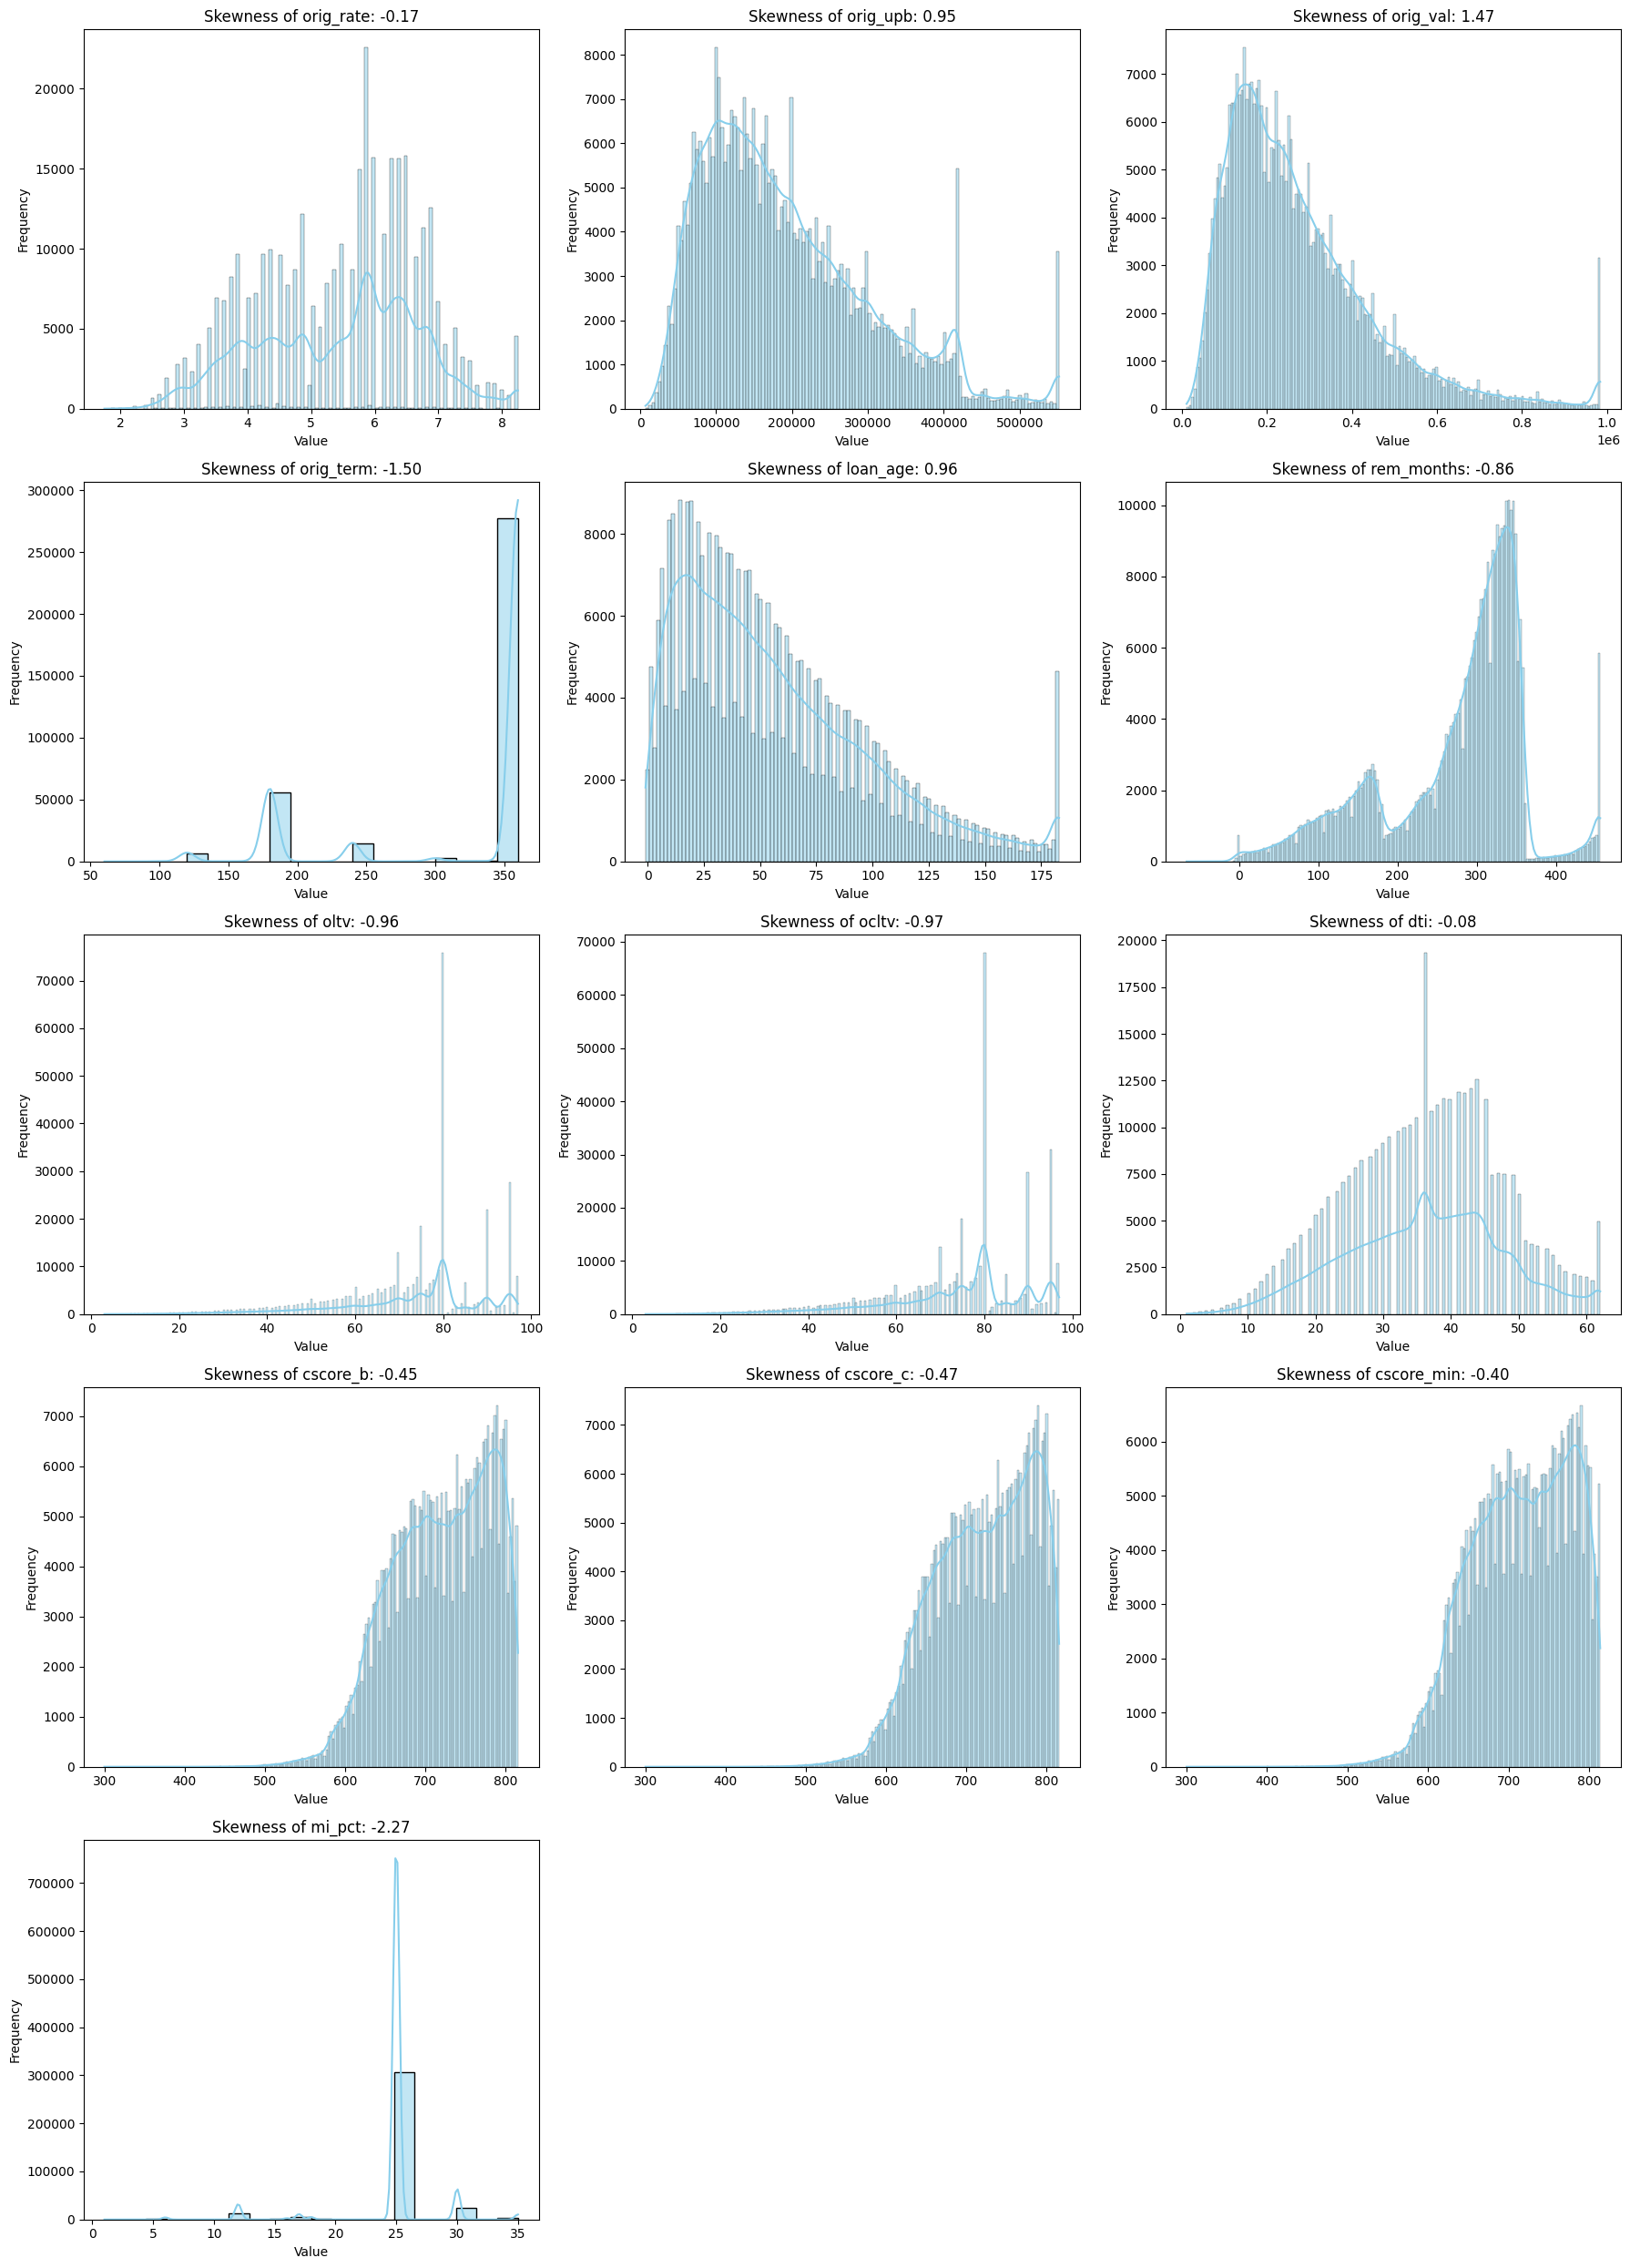

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


num_columns = len(num_vars)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows required

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.ravel()

for i, col in enumerate(num_vars):
    skewness = skew(df4[col])  # Calculate skewness
    print(f'Skewness of {col} is {skewness}')

    # Plot a distribution plot using Seaborn
    sns.histplot(df4[col], kde=True, color='skyblue', ax=axes[i])
    
    # Set title and labels
    axes[i].set_title(f'Skewness of {col}: {skewness:.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any remaining empty subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [117]:
from scipy.stats import skew, kurtosis

# List of columns you want to check for skewness and kurtosis (include the transformed columns)


# Calculate and print skewness and kurtosis for each column
for col in num_vars:
    skewness = skew(df4[col])
    kurt = kurtosis(df4[col])
    print(f'Skewness of {col} is {skewness}')
    print(f'Kurtosis of {col} is {kurt}')
    print('**'*50)

Skewness of orig_rate is -0.17236969441125488
Kurtosis of orig_rate is -0.6991884364220802
****************************************************************************************************
Skewness of orig_upb is 0.9489368971359935
Kurtosis of orig_upb is 0.5404135170790676
****************************************************************************************************
Skewness of orig_val is 1.4728736970390341
Kurtosis of orig_val is 2.651812040205563
****************************************************************************************************
Skewness of orig_term is -1.4987157396535586
Kurtosis of orig_term is 0.4710452446920623
****************************************************************************************************
Skewness of loan_age is 0.9586577346762819
Kurtosis of loan_age is 0.43292621207990667
****************************************************************************************************
Skewness of rem_months is -0.8583500056708824
Kurtosis of

In [118]:
# List of columns to apply square root transformation
columns_to_sqrt = ['orig_val', 'orig_upb', 'mi_pct']

# Apply square root transformation to specified columns
for col in columns_to_sqrt:
    df4[col] = np.sqrt(df4[col])


In [119]:
columns_to_sqrt = ['orig_val', 'orig_upb', 'mi_pct']

for col in columns_to_sqrt:
    skewness = skew(df4[col])
    kurt = kurtosis(df4[col])
    print(f'Skewness of {col} is {skewness}')
    print(f'Kurtosis of {col} is {kurt}')
    print('**'*50)

Skewness of orig_val is 0.6427787458037962
Kurtosis of orig_val is 0.29845136915059767
****************************************************************************************************
Skewness of orig_upb is 0.3405606193250289
Kurtosis of orig_upb is -0.42666231258365084
****************************************************************************************************
Skewness of mi_pct is -3.094274447796289
Kurtosis of mi_pct is 13.69781184716479
****************************************************************************************************


# Heatmap

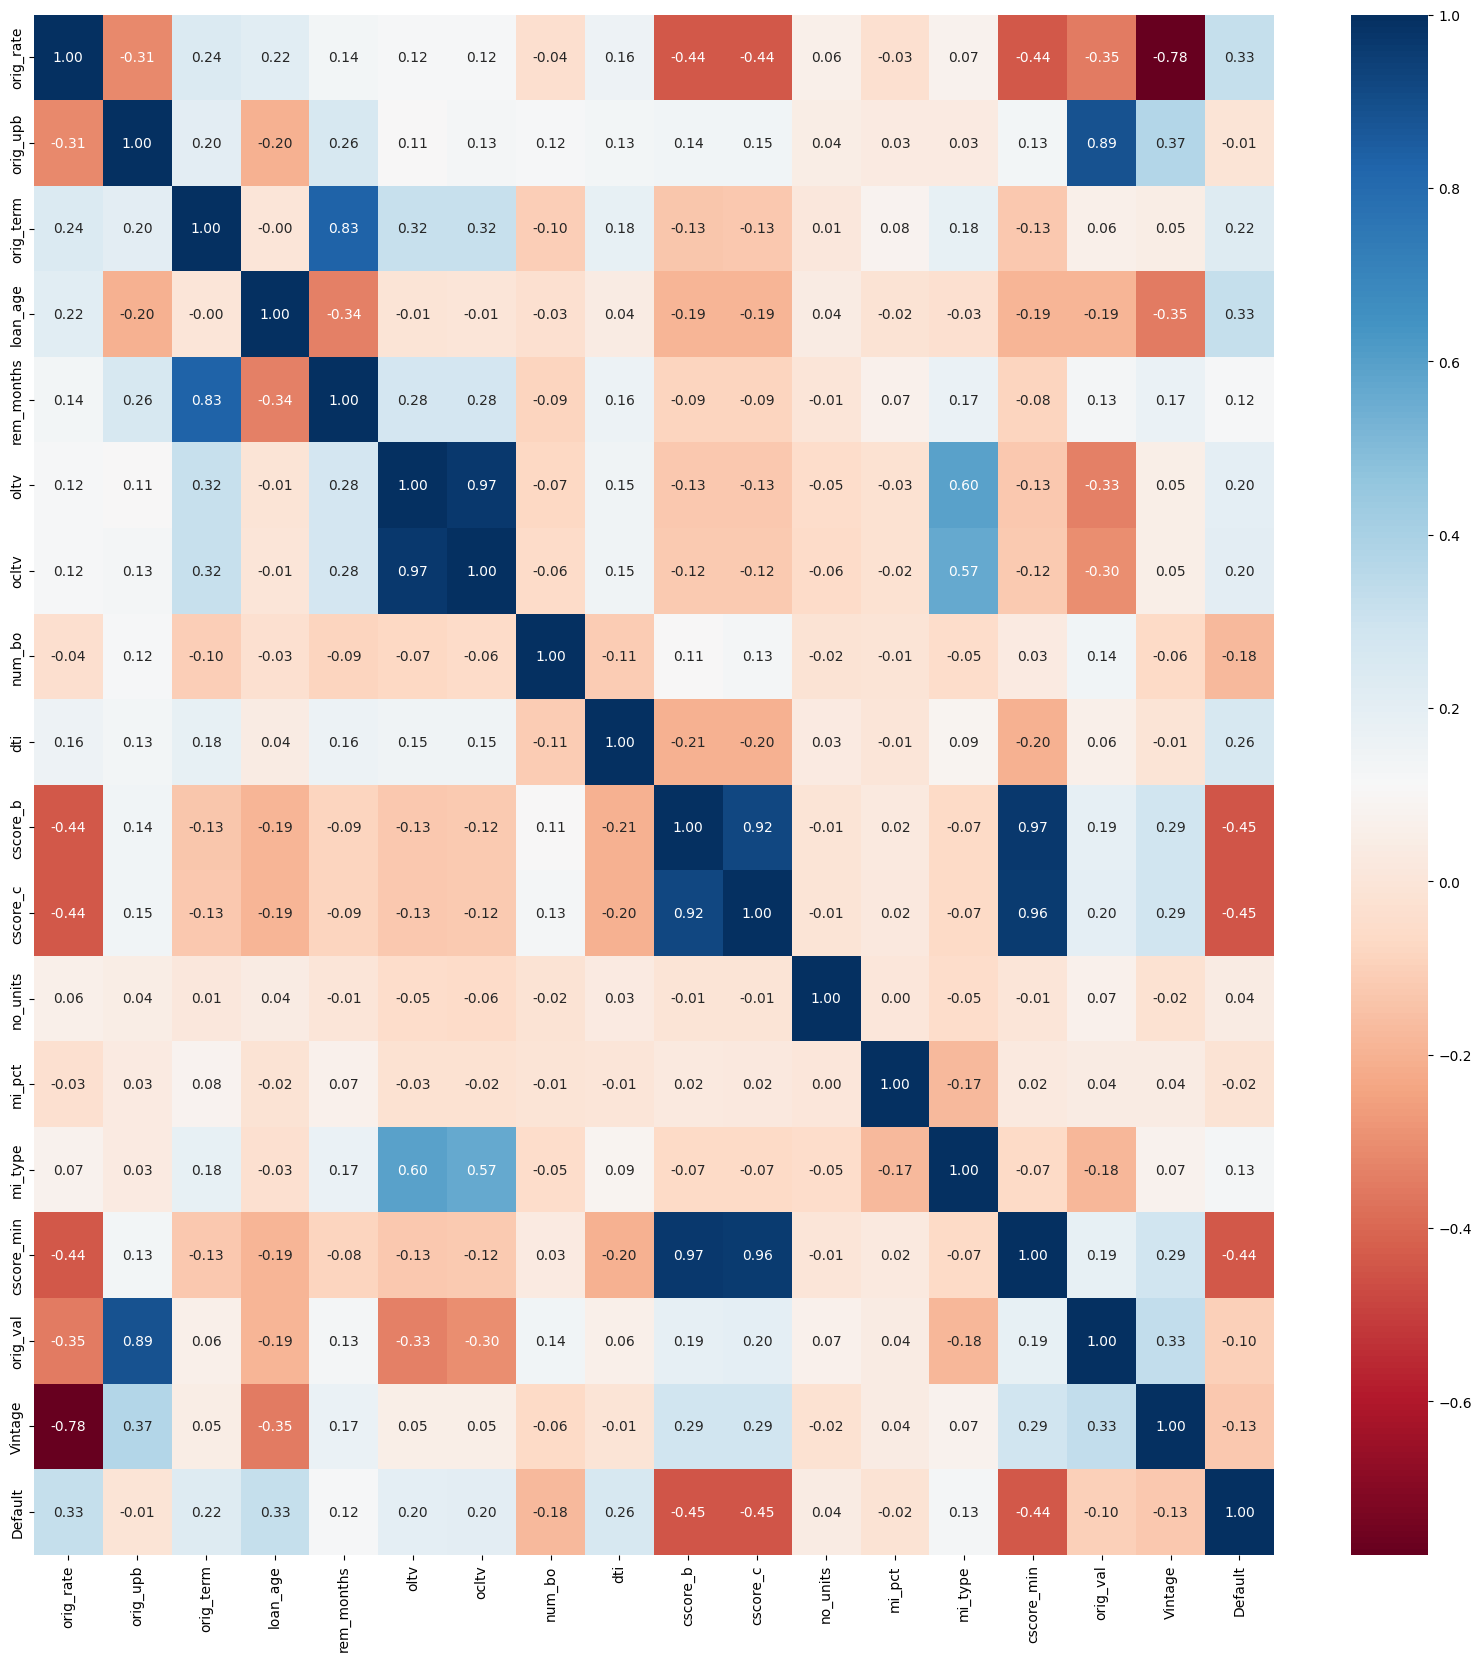

In [120]:
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(),annot=True, fmt = '.2f',cmap='RdBu');

# XGBClassifier 

## get_dummies

In [121]:
df4.num_bo.value_counts()

1.0    182896
2.0    173021
3.0      1401
4.0       362
6.0         3
5.0         2
7.0         1
Name: num_bo, dtype: int64

In [122]:
df4.num_bo.value_counts(normalize=True)

1.0    0.511331
2.0    0.483723
3.0    0.003917
4.0    0.001012
6.0    0.000008
5.0    0.000006
7.0    0.000003
Name: num_bo, dtype: float64

In [123]:
df_model_xgb = pd.get_dummies(df4, columns=cat_vars+bin_vars)

In [124]:
df_model_xgb['bad_vintage']=df_model_xgb.apply(lambda x: 1 if x.Vintage in [2006,2007,2008] else 0,axis=1)

In [125]:
df_model_xgb[['bad_vintage','Default']].value_counts()

bad_vintage  Default
0            0          181395
             1           99446
1            1           58286
             0           18559
dtype: int64

In [126]:
df_model_xgb.columns

Index(['orig_rate', 'orig_upb', 'orig_term', 'loan_age', 'rem_months', 'oltv',
       'ocltv', 'dti', 'cscore_b', 'cscore_c', 'mi_pct', 'cscore_min',
       'orig_val', 'Vintage', 'Default', 'channel_B', 'channel_C', 'channel_R',
       'purpose_C', 'purpose_P', 'purpose_R', 'purpose_U', 'prop_CO',
       'prop_CP', 'prop_MH', 'prop_PU', 'prop_SF', 'no_units_1.0',
       'no_units_2.0', 'no_units_3.0', 'no_units_4.0', 'occ_stat_I',
       'occ_stat_P', 'occ_stat_S', 'mi_type_0.0', 'mi_type_1.0', 'mi_type_2.0',
       'mi_type_3.0', 'num_bo_1.0', 'num_bo_2.0', 'num_bo_3.0', 'num_bo_4.0',
       'num_bo_5.0', 'num_bo_6.0', 'num_bo_7.0', 'first_flag_N',
       'first_flag_Y', 'relocation_mortgage_indicator_N',
       'relocation_mortgage_indicator_Y', 'high_balance_loan_indicator_N',
       'high_balance_loan_indicator_Y', 'bad_vintage'],
      dtype='object')

In [127]:
df_model_xgb.shape

(357686, 52)

In [128]:
df_model_xgb

orig_rate    orig_upb  orig_term  loan_age  rem_months  oltv  ocltv  \
5           3.875  622.093241      360.0      15.0       345.0  90.0   90.0   
8           6.125  371.483512      360.0     113.0       456.0  80.0   80.0   
12          6.750  388.587185      360.0      62.0       298.0  90.0   90.0   
19          4.125  551.361950      360.0     100.0       260.0  80.0   80.0   
20          5.625  320.936131      360.0      71.0       301.0  93.0   93.0   
...           ...         ...        ...       ...         ...   ...    ...   
22291       5.250  618.869938      360.0      19.0       341.0  75.0   75.0   
399673      7.250  209.761770      180.0      12.0       168.0  80.0   80.0   
219691      3.375  325.576412      360.0      51.0       309.0  80.0   80.0   
475109      6.750  298.328678      360.0      73.0       287.0  53.0   53.0   
207389      4.250  306.594194      360.0       7.0       353.0  80.0   80.0   

         dti  cscore_b  cscore_c  ...  num_bo_5.0  num_bo_6.0  num_bo_7.0  \
5       37.0     791.0     791.0  ...           0           0           0   
8       46.0     591.0     591.0  ...           0           0           0   
12      39.0     726.0     723.0  ...           0           0           0   
19      49.0     754.0     733.0  ...           0           0           0   
20      58.0     684.0     684.0  ...           0           0           0   
...      ...       ...       ...  ...         ...         ...         ...   
22291   43.0     792.0     781.0  ...           0           0           0   
399673  11.0     711.0     711.0  ...           0           0           0   
219691  31.0     793.0     795.0  ...           0           0           0   
475109  19.0     637.0     637.0  ...           0           0           0   
207389  42.0     808.0     808.0  ...           0           0           0   

        first_flag_N  first_flag_Y  relocation_mortgage_indicator_N  \
5                  0             1                                1   
8                  0             1                                1   
12                 1             0                                1   
19                 0             1                                1   
20                 1             0                                1   
...              ...           ...                              ...   
22291              1             0                                1   
399673             1             0                                1   
219691             1             0                                1   
475109             1             0                                1   
207389             1             0                                1   

        relocation_mortgage_indicator_Y  high_balance_loan_indicator_N  \
5                                     0                              1   
8                                     0                              1   
12                                    0                              1   
19                                    0                              1   
20                                    0                              1   
...                                 ...                            ...   
22291                                 0                              1   
399673                                0                              1   
219691                                0                              1   
475109                                0                              1   
207389                                0                              1   

        high_balance_loan_indicator_Y  bad_vintage  
5                                   0            0  
8                                   0            1  
12                                  0            1  
19                                  0            0  
20                                  0            0  
...                               ...          ...  
22291                

In [129]:
oot_index_names = df_model_xgb[(df_model_xgb['Vintage'] >= 2014)].index

In [130]:
df_oot=df_model_xgb.loc[oot_index_names]

In [131]:
df_oot.shape

(76562, 52)

In [132]:
Y_oot=df_oot['Default']

In [133]:
Y_oot.shape

(76562,)

In [134]:
df_oot.drop(['Default','Vintage'],axis=1, inplace=True)

In [135]:
df_ins=df_model_xgb.drop(oot_index_names)

In [136]:
df_oot.shape , df_ins.shape

((76562, 50), (281124, 52))

In [137]:
Y_ins=df_ins['Default']

In [138]:
Y_ins.shape

(281124,)

In [139]:
df_ins.drop(['Default','Vintage'],axis=1, inplace=True)

In [140]:
df_ins.shape

(281124, 50)

In [141]:
final_features = list(df_ins)
final_features

['orig_rate',
 'orig_upb',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'dti',
 'cscore_b',
 'cscore_c',
 'mi_pct',
 'cscore_min',
 'orig_val',
 'channel_B',
 'channel_C',
 'channel_R',
 'purpose_C',
 'purpose_P',
 'purpose_R',
 'purpose_U',
 'prop_CO',
 'prop_CP',
 'prop_MH',
 'prop_PU',
 'prop_SF',
 'no_units_1.0',
 'no_units_2.0',
 'no_units_3.0',
 'no_units_4.0',
 'occ_stat_I',
 'occ_stat_P',
 'occ_stat_S',
 'mi_type_0.0',
 'mi_type_1.0',
 'mi_type_2.0',
 'mi_type_3.0',
 'num_bo_1.0',
 'num_bo_2.0',
 'num_bo_3.0',
 'num_bo_4.0',
 'num_bo_5.0',
 'num_bo_6.0',
 'num_bo_7.0',
 'first_flag_N',
 'first_flag_Y',
 'relocation_mortgage_indicator_N',
 'relocation_mortgage_indicator_Y',
 'high_balance_loan_indicator_N',
 'high_balance_loan_indicator_Y',
 'bad_vintage']

In [142]:
variables_to_remove = ['Default', 'Vintage']

# Create an empty list to store the updated final_features
updated_final_features = []

# Iterate through the original final_features
for var in final_features:
    # Check if the variable should not be removed
    if var not in variables_to_remove:
        # Append it to the updated_final_features list
        updated_final_features.append(var)

# Print the updated_final_features list
print(updated_final_features)


['orig_rate', 'orig_upb', 'orig_term', 'loan_age', 'rem_months', 'oltv', 'ocltv', 'dti', 'cscore_b', 'cscore_c', 'mi_pct', 'cscore_min', 'orig_val', 'channel_B', 'channel_C', 'channel_R', 'purpose_C', 'purpose_P', 'purpose_R', 'purpose_U', 'prop_CO', 'prop_CP', 'prop_MH', 'prop_PU', 'prop_SF', 'no_units_1.0', 'no_units_2.0', 'no_units_3.0', 'no_units_4.0', 'occ_stat_I', 'occ_stat_P', 'occ_stat_S', 'mi_type_0.0', 'mi_type_1.0', 'mi_type_2.0', 'mi_type_3.0', 'num_bo_1.0', 'num_bo_2.0', 'num_bo_3.0', 'num_bo_4.0', 'num_bo_5.0', 'num_bo_6.0', 'num_bo_7.0', 'first_flag_N', 'first_flag_Y', 'relocation_mortgage_indicator_N', 'relocation_mortgage_indicator_Y', 'high_balance_loan_indicator_N', 'high_balance_loan_indicator_Y', 'bad_vintage']


In [147]:
print('Test Data Percentage:',(len(Y_ins)/(len(df_ins)+len(Y_ins)))*100)

Test Data Percentage: 50.0


# XGB Model Fit

In [148]:
Y_ins.value_counts()

0    149407
1    131717
Name: Default, dtype: int64

In [152]:
model = XGBClassifier()
pipeline = Pipeline(steps=[('classifier', model)])
param_grid = [
    {'classifier__n_estimators' : [10,20,30],
     'classifier__learning_rate' : [0.05,0.1,0.15],
     'classifier__max_depth' : [8,12,16],
     'classifier__min_child_weight' : [2,20],
     'classifier__gamma' : [0.05,0.5]
}]

In [153]:
cv_method = KFold(n_splits=4, shuffle=True)

In [154]:
xgb_grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv_method)

In [159]:
len(Y_oot) / len(Y_ins) 

0.2723424538637754

In [ ]:
xgb_grid.fit(df_ins, Y_ins)

In [ ]:
xgb_grid.best_params_

In [123]:
xgb_best_para = XGBClassifier(gamma=0.05,
                             learning_rate=0.15,
                             max_depth = 12,
                             min_child_weight = 20,
                             n_estimators = 30)

In [144]:
xgb_best_para.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [146]:
y_pred = xgb_best_para.predict(X_test)
print(xgb_best_para.score(X_train,y_train))
print(accuracy_score(y_test, y_pred))

0.8634434801653571
0.7166993426363741


In [147]:
print('Training Score:', xgb_best_para.score(X_train, y_train))
print('Testing Score:', xgb_best_para.score(X_test, y_test))

Training Score: 0.8634434801653571
Testing Score: 0.7166993426363741


In [112]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.05, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=20, missing=nan,
                               monotone_constraints=None, n_estimators=30,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [113]:
xgbc_feature = best_model.named_steps['classifier']
xgbc_feature.feature_importances_

array([0.08078772, 0.00915689, 0.05450813, 0.09078033, 0.03087323,
       0.01485363, 0.02532873, 0.01555743, 0.10968572, 0.16466874,
       0.0107253 , 0.015386  , 0.00806377, 0.0222307 , 0.01171651,
       0.02864026, 0.01141562, 0.01389945, 0.00583686, 0.00968394,
       0.0134163 , 0.01214717, 0.00750146, 0.        , 0.01015102,
       0.        , 0.01550098, 0.00577675, 0.00609459, 0.0124465 ,
       0.00938075, 0.        , 0.        , 0.01326329, 0.01157058,
       0.01015231, 0.01165029, 0.00754779, 0.02552253, 0.        ,
       0.03562487, 0.01759619, 0.        , 0.        , 0.        ,
       0.        , 0.01001209, 0.        , 0.03084548, 0.        ,
       0.        , 0.        ], dtype=float32)

In [114]:
loaded_grid_search

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_poli...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid=[{'classifier__gamma': [0.05, 0.5],
                          'classifier__learning_rate': [0.05, 0.1, 0.15],
                          'classifier__max_depth': [8, 12, 16],
                          'classifier__min_child_weight': [2, 20],
                          'classifier__n_estimators': [10, 20, 30]}])

In [115]:
X_train.columns

Index(['orig_rate', 'orig_upb', 'orig_term', 'loan_age', 'rem_months', 'oltv',
       'ocltv', 'dti', 'cscore_b', 'cscore_c', 'mi_pct', 'cscore_min',
       'orig_val', '12M Change', '36M Change', '60M Change', 'unemp',
       'channel_B', 'channel_C', 'channel_R', 'purpose_C', 'purpose_P',
       'purpose_R', 'purpose_U', 'prop_CO', 'prop_CP', 'prop_MH', 'prop_PU',
       'prop_SF', 'no_units_1.0', 'no_units_2.0', 'no_units_3.0',
       'no_units_4.0', 'occ_stat_I', 'occ_stat_P', 'occ_stat_S', 'mi_type_0.0',
       'mi_type_1.0', 'mi_type_2.0', 'mi_type_3.0', 'num_bo_1.0', 'num_bo_2.0',
       'num_bo_3.0', 'num_bo_4.0', 'num_bo_5.0', 'num_bo_6.0', 'first_flag_N',
       'first_flag_Y', 'relocation_mortgage_indicator_N',
       'relocation_mortgage_indicator_Y', 'high_balance_loan_indicator_N',
       'high_balance_loan_indicator_Y'],
      dtype='object')

In [116]:
# Assuming X_train.columns is a pandas Index object, convert it to a list
X_train_columns = X_train.columns.tolist()

# List the columns that are in X_train but not in final_features
columns_not_in_final_features = [col for col in final_features if col not in X_train_columns]

# Print or work with the columns that are not in final_features
print(columns_not_in_final_features)


['Vintage', 'Default']


# Default EDA

In [117]:
ypred = pd.DataFrame(best_model.predict_proba(X_train.values),columns=['predA','pred'])
df1 = pd.DataFrame(X_train.values, columns =updated_final_features)
df2 = pd.DataFrame(y_train.values, columns =['target'])
df3 = df.drop(oot_index_names) ## df_oot=df_model.loc[oot_index_names]s ##
df_ins_4plot=pd.concat([df1,df2,df3[['loan_id','act_period','Vintage']],ypred],axis=1)

In [118]:
ypred_oot = pd.DataFrame(best_model.predict_proba(X_test.values),columns=['predA','pred'])
df1_oot = pd.DataFrame(X_test.values, columns =updated_final_features)
df2_oot = pd.DataFrame(y_test.values, columns =['target'])
df3_oot=df.loc[oot_index_names] ## df_oot=df_model.loc[oot_index_names]
df_oot_4plot=pd.concat([df1_oot,df2_oot,df3_oot[['loan_id','act_period','Vintage']],ypred_oot],axis=1)

In [119]:
x_var='Vintage'
x_var_plot='Vintage'
y_var='target'
y_pred='pred'
bin_size=6

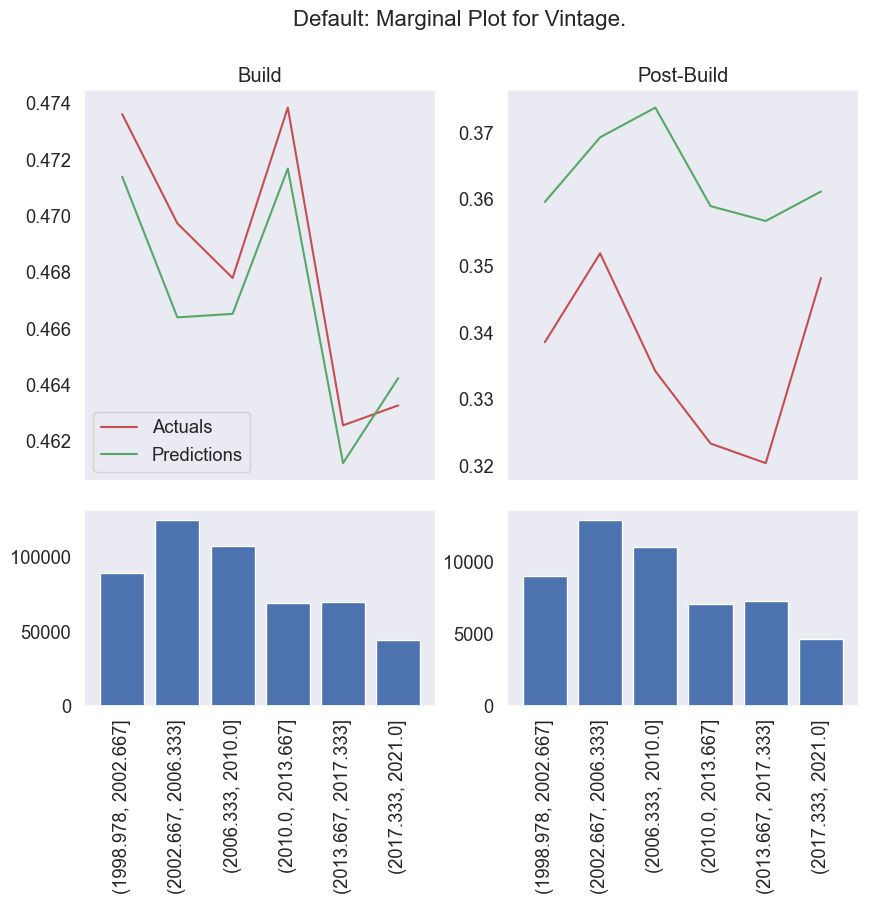

In [144]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
fig = plt.figure(figsize=(10,8))
fig.suptitle('Default: Marginal Plot for {}.'.format(x_var_plot), fontsize=16)
gs = gridspec.GridSpec(2, 2, hspace=.1,height_ratios=[2, 1])


# the first subplot for model performance along the feature of interest in-sample
ax0 = plt.subplot(gs[0])

s=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_var]
line0, = ax0.plot(s.index.astype(str), s.values, color='r',label='line1')
sp=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_pred]
line1, = ax0.plot(sp.index.astype(str), sp.values, color='g',label='line2')
plt.title("Build")

# the second subplot for counts for that feature in-sample
# shared axis X
ax1 = plt.subplot(gs[2], sharex = ax0)
ax0.grid()
ax1.grid()



t=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).count() [x_var]
plt.setp(ax0.get_xticklabels(), visible=False)
line2= ax1.bar(t.index.astype(str), t.values, color='b')
plt.xticks(rotation = 90)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
# put legend on first subplot
ax0.legend((line0, line1), ('Actuals', 'Predictions'), loc='lower left')


# the third subplot for model performance along the feature of interest in holdout

ax2 = plt.subplot(gs[1])
# log scale for axis Y of the first subplot
s=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_var]
line4, = ax2.plot(s.index.astype(str), s.values, color='r',label='line1')
sp=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_pred]+0.20
line5, = ax2.plot(sp.index.astype(str), sp.values, color='g',label='line2')
plt.title("Post-Build")

# # the fourth subplot for counts for that feature in holdout
# shared axis X
ax3 = plt.subplot(gs[3], sharex = ax2)
ax2.grid()
ax3.grid()



t=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).count() [x_var]
plt.setp(ax2.get_xticklabels(), visible=False)
line6= ax3.bar(t.index.astype(str), t.values, color='b')


#plt.xticks(ax2.get_xticklabels(), [fmt(i) for i in x_sum], rotation=90)
plt.xticks(rotation = 90)
# remove last tick label for the second subplot
yticks = ax3.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

plt.show()




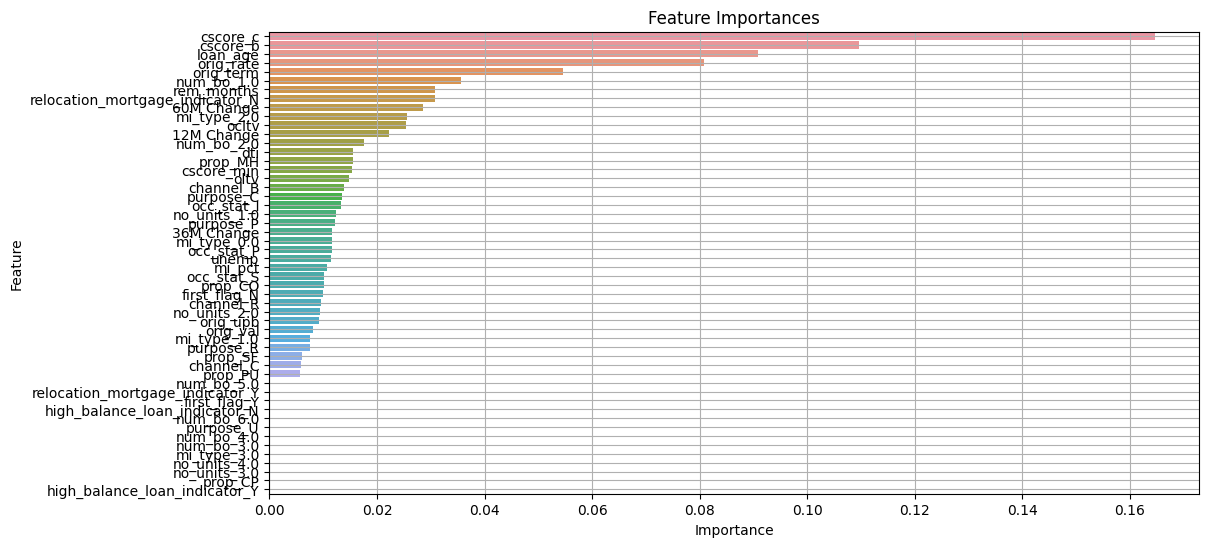

In [121]:
# Get feature importances from the trained model
feature_importances = xgbc_feature.feature_importances_

# Get the corresponding feature names (assuming your features are in a DataFrame)
feature_names = df_ins.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


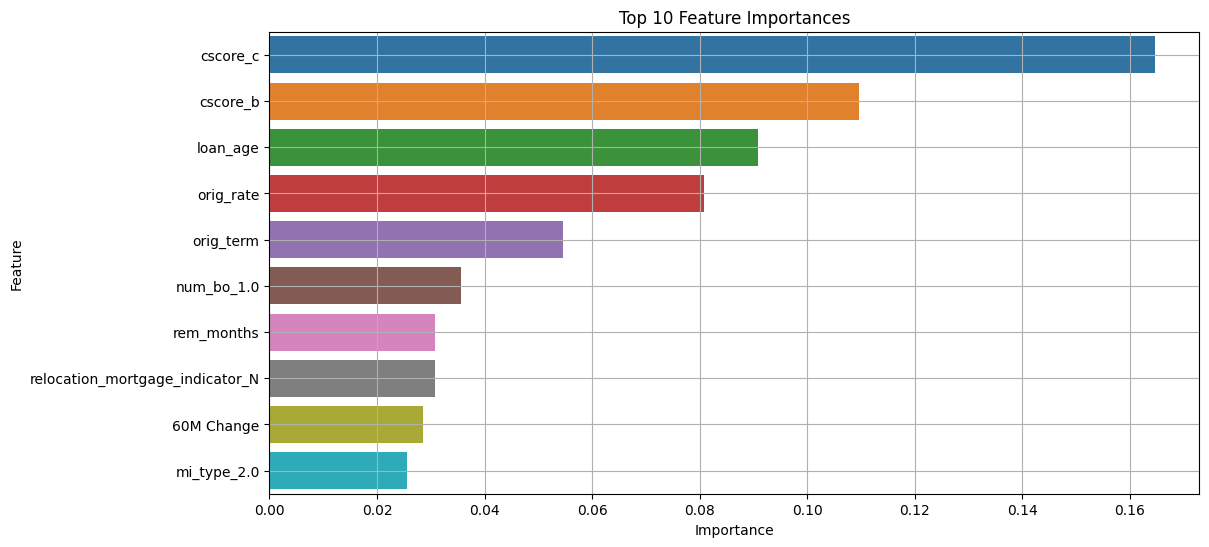

In [122]:
# Get the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


[[0.8477682  0.15223181]
 [0.7944476  0.2055524 ]
 [0.6874478  0.3125522 ]
 ...
 [0.9923636  0.00763642]
 [0.96690375 0.03309627]
 [0.98518574 0.01481425]]
[[22947 11309]
 [ 3098 14672]]


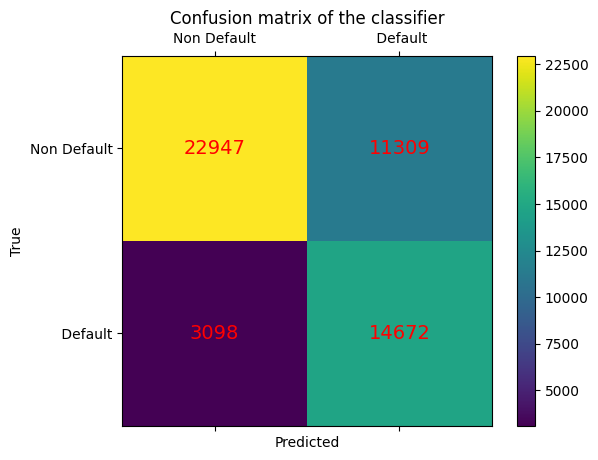

f1: 67.07%


0.8272600019529212

In [123]:
from sklearn.metrics import confusion_matrix, f1_score,roc_auc_score

threshold=0.07
ypred = best_model.predict_proba(df_oot.values)
print(ypred)
## added Sep 2023
ypred_binary = (ypred[:, 1] >= threshold).astype(int)
np.unique(ypred_binary,return_counts=True)
#cm = confusion_matrix(Y_oot,ypred,labels=[0, 1])
cm = confusion_matrix(Y_oot,ypred_binary)
print(cm)
labels=['Non Default', ' Default']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
# Add class counts to the heatmap cells
for i in range(2):
    for j in range(2):
        ax.text(j + 0.0, i + 0.0, str(cm[i, j]), ha='center', va='center', color='red',fontsize=14)


plt.show()
f1 = f1_score(Y_oot, ypred_binary)
print("f1: %.2f%%" % (f1 * 100.0)) 

ypred_p = best_model.predict_proba(df_oot.values)
roc_auc_score(Y_oot, ypred_p[:, 1])

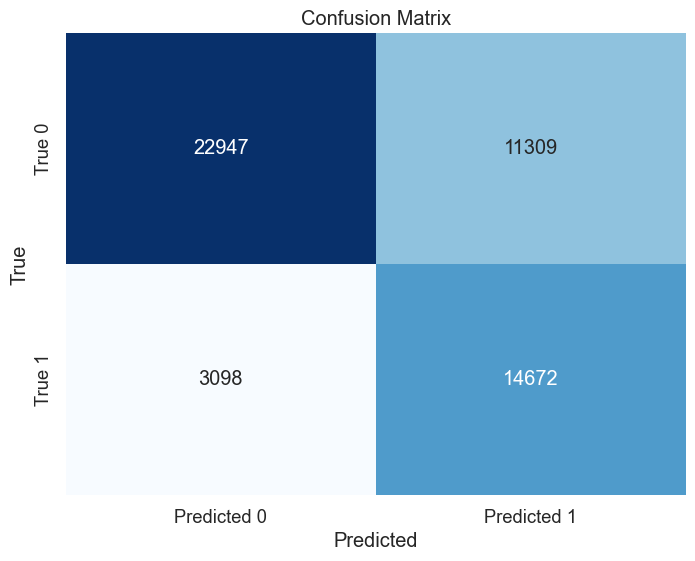

In [124]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predicted labels (replace these with your own data)


# Calculate the confusion matrix
confusion_mat = cm

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


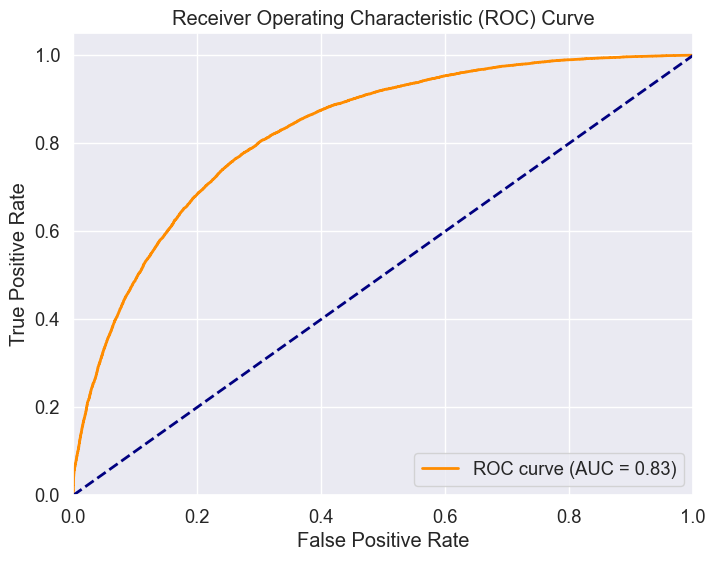

In [125]:
#roc_auc_score(Y_oot, ypred_p[:, 1])
ypred_p = best_model.predict_proba(X_test.values)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ypred_p[:, 1])
roc_auc = roc_auc_score(y_test, ypred_p[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [126]:
y_pred , y_test

('pred',
 0         1
 13        1
 21        1
 47        1
 49        1
          ..
 357663    0
 357671    0
 357679    0
 357681    0
 357685    0
 Name: Default, Length: 52026, dtype: int64)

# EDA

In [127]:
x_var='Vintage'
x_var_plot='Vintage'
y_var='target'
y_pred='pred'
bin_size=6


In [128]:
ypred = pd.DataFrame(best_model.predict_proba(df_ins.values),columns=['predA','pred'])
df1 = pd.DataFrame(df_ins.values, columns =updated_final_features)
df2 = pd.DataFrame(Y_ins.values, columns =['target'])
df3 = df.drop(oot_index_names) ## df_oot=df_model.loc[oot_index_names]s ##
df_ins_4plot_xgb=pd.concat([df1,df2,df3[['loan_id','act_period','Vintage']],ypred],axis=1)

In [129]:
ypred_oot = pd.DataFrame(best_model.predict_proba(df_oot.values),columns=['predA','pred'])
df1_oot = pd.DataFrame(df_oot.values, columns =updated_final_features)
df2_oot = pd.DataFrame(Y_oot.values, columns =['target'])
df3_oot=df.loc[oot_index_names] ## df_oot=df_model.loc[oot_index_names]
df_oot_4plot_xgb=pd.concat([df1_oot,df2_oot,df3_oot[['loan_id','act_period','Vintage']],ypred_oot],axis=1)

In [130]:


def marginal_plots(df_ins_4plot,df_oot_4plot,x_var,x_var_plot,y_var,y_pred,bin_size=6):
    fig = plt.figure(figsize=(10,8))
    fig.suptitle('Default: Marginal Plot for {}.'.format(x_var_plot), fontsize=16)
    gs = gridspec.GridSpec(2, 2, hspace=.1,height_ratios=[2, 1])


    # the first subplot for model performance along the feature of interest in-sample
    ax0 = plt.subplot(gs[0])

    s=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_var]
    line0, = ax0.plot(s.index.astype(str), s.values, color='r',label='line1')
    sp=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).mean() [y_pred]
    line1, = ax0.plot(sp.index.astype(str), sp.values, color='g',label='line2')
    plt.title("Build")

    # the second subplot for counts for that feature in-sample
    # shared axis X
    ax1 = plt.subplot(gs[2], sharex = ax0)
    ax0.grid()
    ax1.grid()



    t=df_ins_4plot.groupby([pd.cut(df_ins_4plot[x_var],bins=bin_size)]).count() [x_var]
    plt.setp(ax0.get_xticklabels(), visible=False)
    line2= ax1.bar(t.index.astype(str), t.values, color='b')
    plt.xticks(rotation = 90)
    # remove last tick label for the second subplot
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    # put legend on first subplot
    ax0.legend((line0, line1), ('Actuals', 'Predictions'), loc='lower left')


    # the third subplot for model performance along the feature of interest in holdout

    ax2 = plt.subplot(gs[1])
    # log scale for axis Y of the first subplot
    s=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_var]
    line4, = ax2.plot(s.index.astype(str), s.values, color='r',label='line1')
    sp=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).mean() [y_pred]+0.20
    line5, = ax2.plot(sp.index.astype(str), sp.values, color='g',label='line2')
    plt.title("Post-Build")

    # # the fourth subplot for counts for that feature in holdout
    # shared axis X
    ax3 = plt.subplot(gs[3], sharex = ax2)
    ax2.grid()
    ax3.grid()



    t=df_oot_4plot.groupby([pd.cut(df_oot_4plot[x_var],bins=bin_size)]).count() [x_var]
    plt.setp(ax2.get_xticklabels(), visible=False)
    line6= ax3.bar(t.index.astype(str), t.values, color='b')


    #plt.xticks(ax2.get_xticklabels(), [fmt(i) for i in x_sum], rotation=90)
    plt.xticks(rotation = 90)
    # remove last tick label for the second subplot
    yticks = ax3.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)

    plt.show()




In [131]:
x_var_list=['Vintage',
            'orig_rate',
 'orig_upb',
 'orig_val',
 'orig_term',
 'loan_age',
# 'rem_months',
 'oltv',
 'ocltv',
 'dti',
 'cscore_b',
 'cscore_c',
 'cscore_min',
 'mi_pct',
 '12M Change',
 '36M Change',
 '60M Change',
 'unemp']
x_var_name=['Vintage',
            'Origination Rate',
            'Origination Balance',
            'Origination Value',
            'Origination Term',
            'Loan Age',
#            'Remaining Months',
            'Origination LTV',
           'Origination CLTV',
            'Debt to Income',
            'Borrower FICO',
            'CoBorrower FICO',
            'Minimum FICO',
            'Mortgage Insurance Percent',
            '12M HPA',
            '36M HPA',
            '60M HPA',
            'Unemployment']


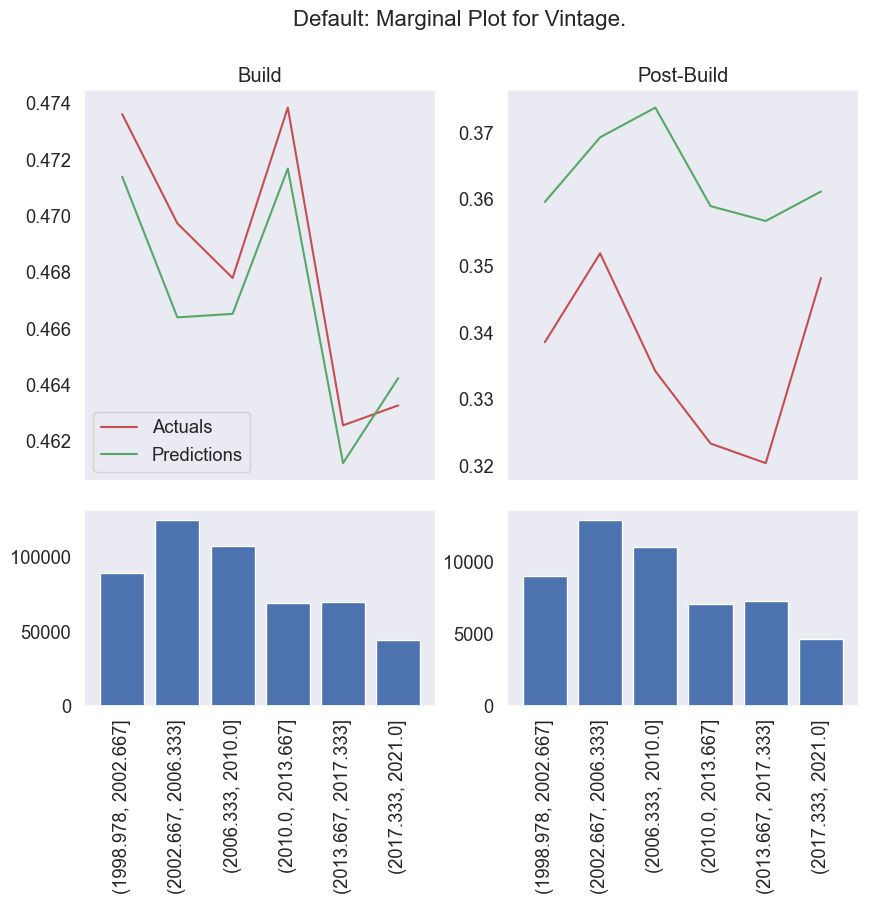

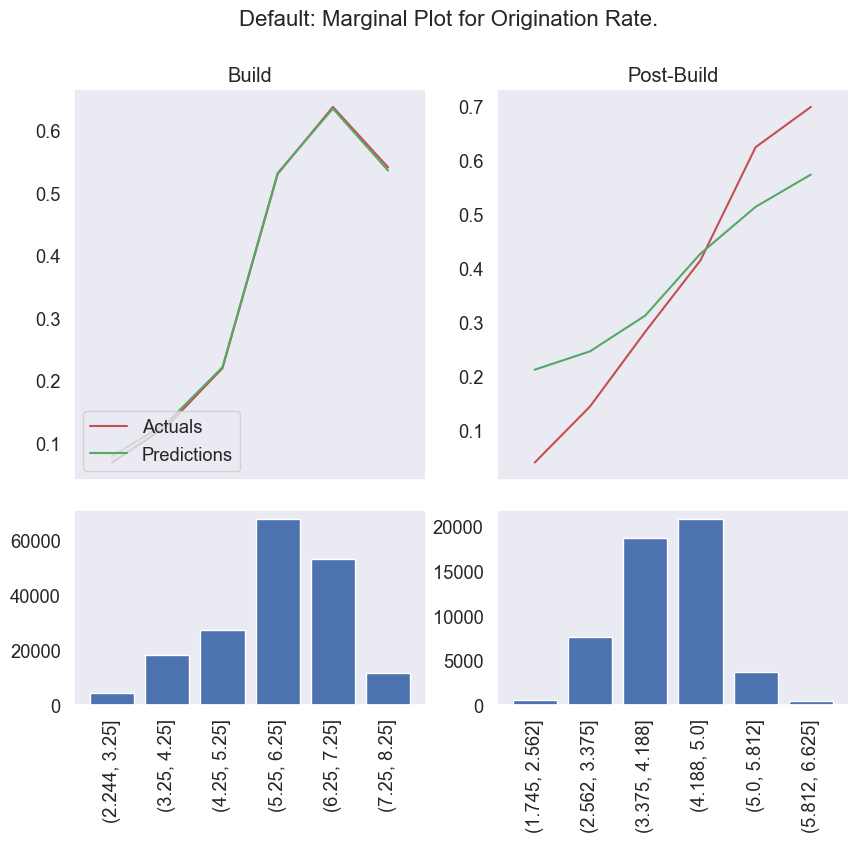

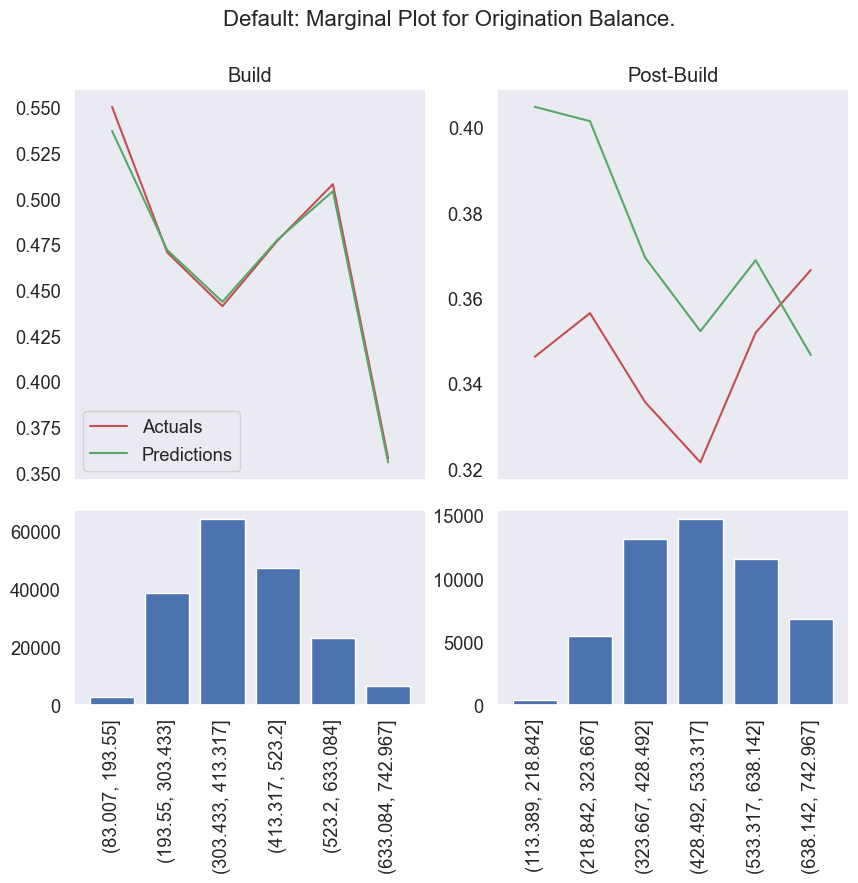

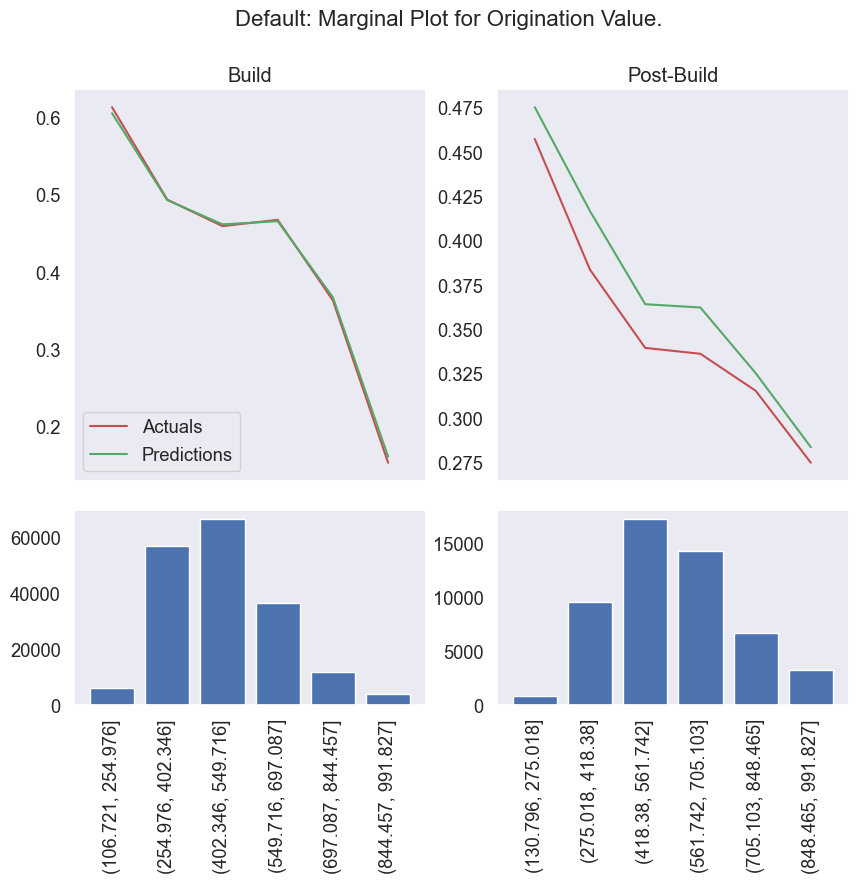

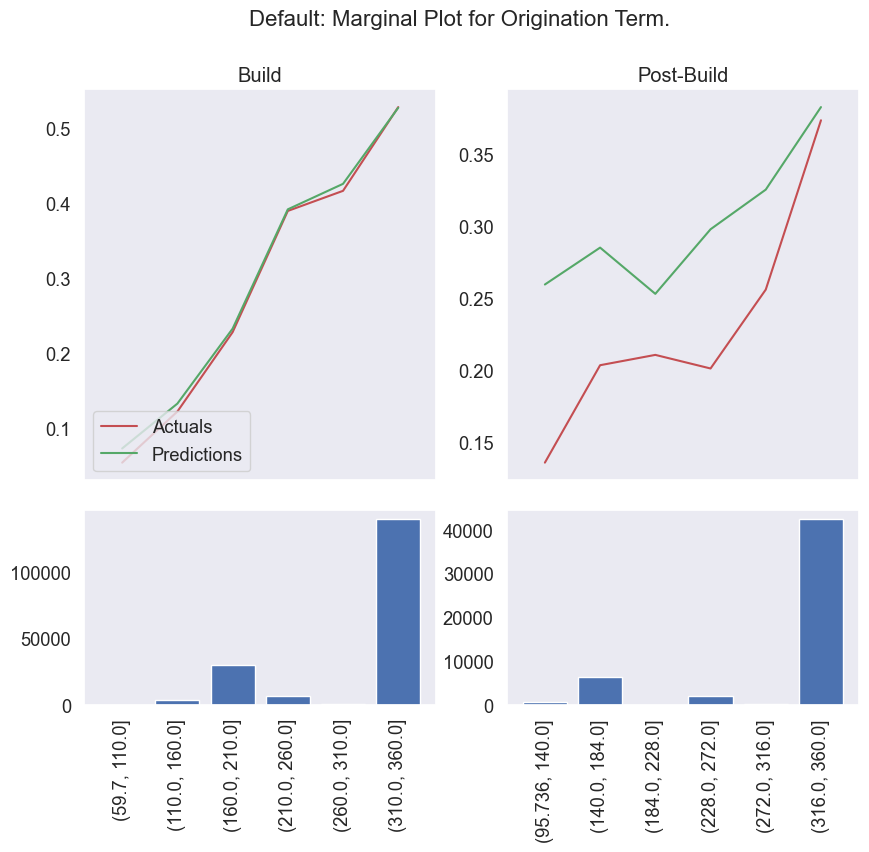

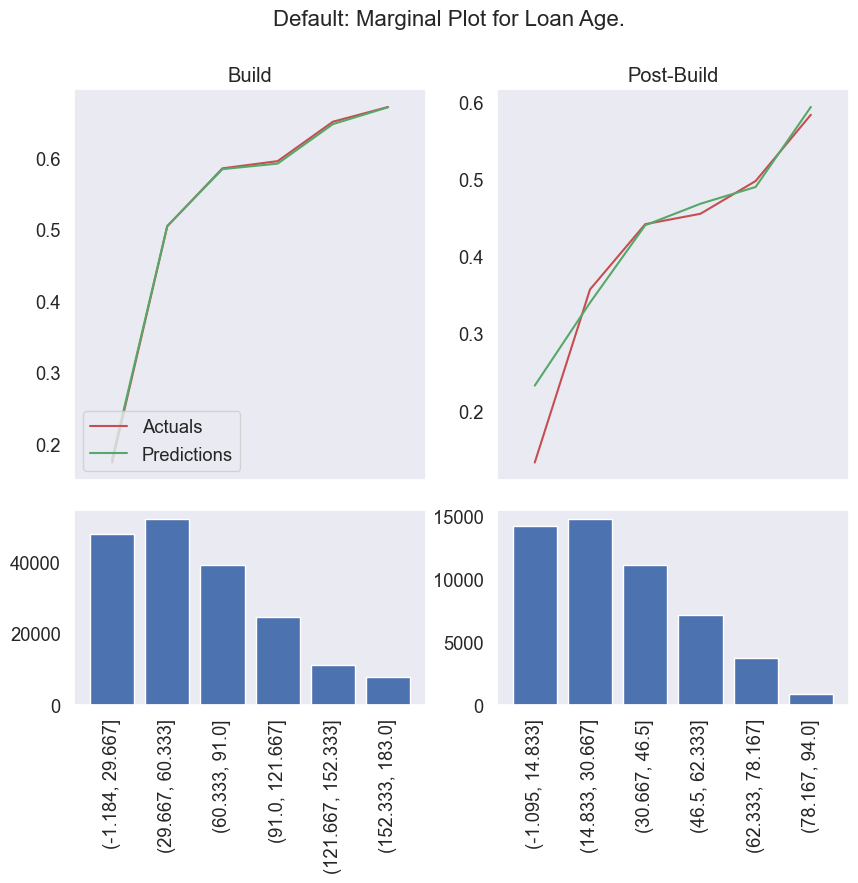

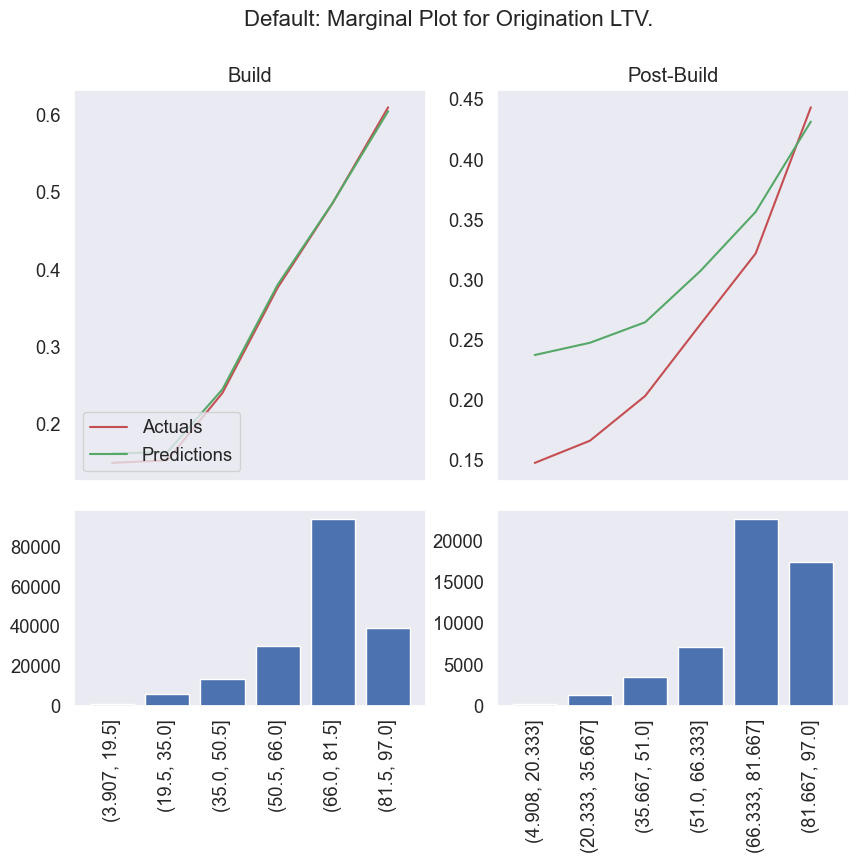

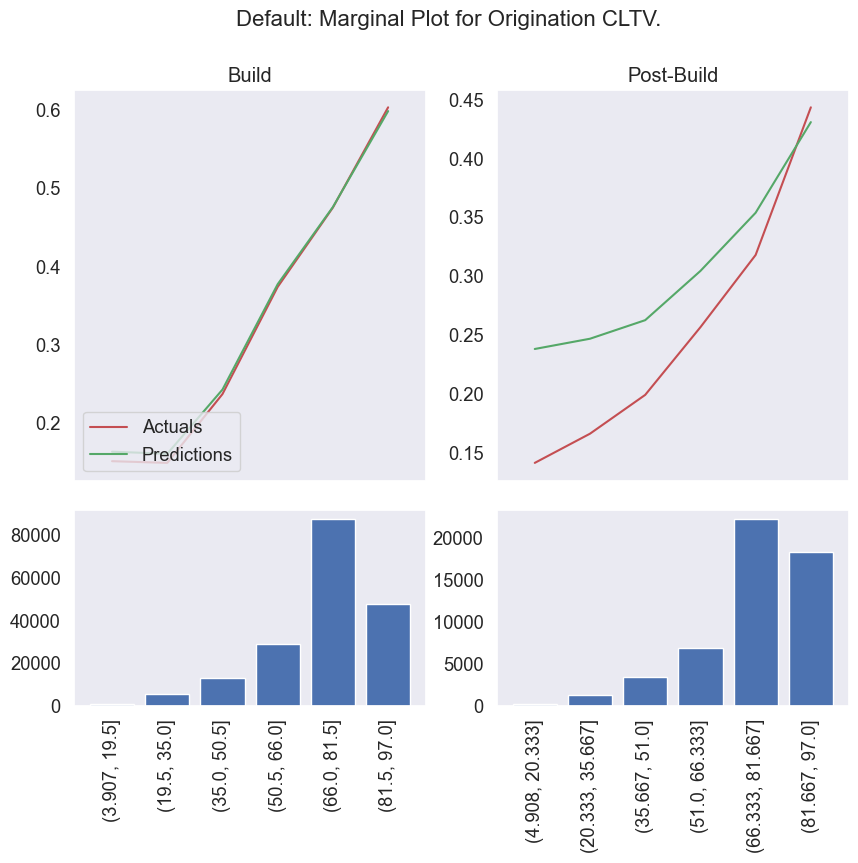

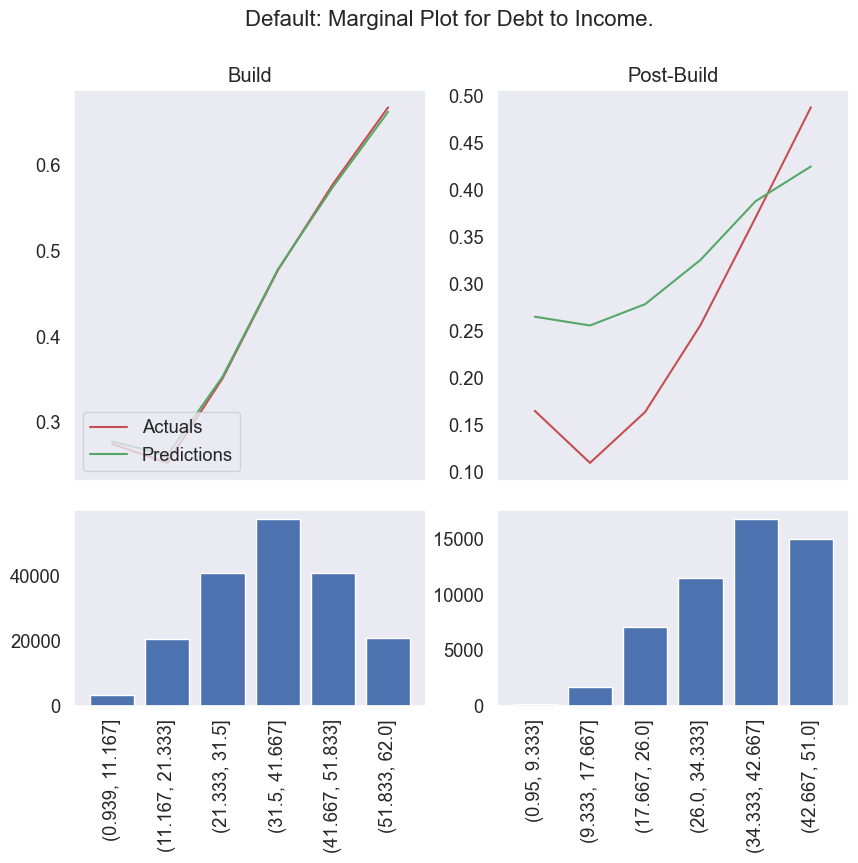

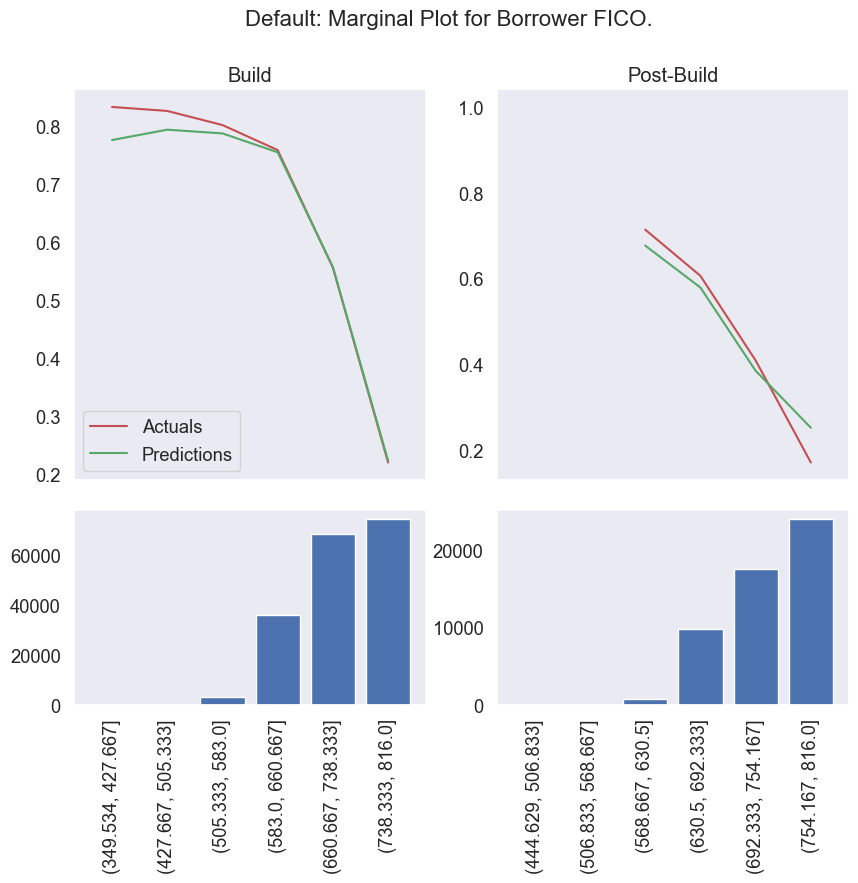

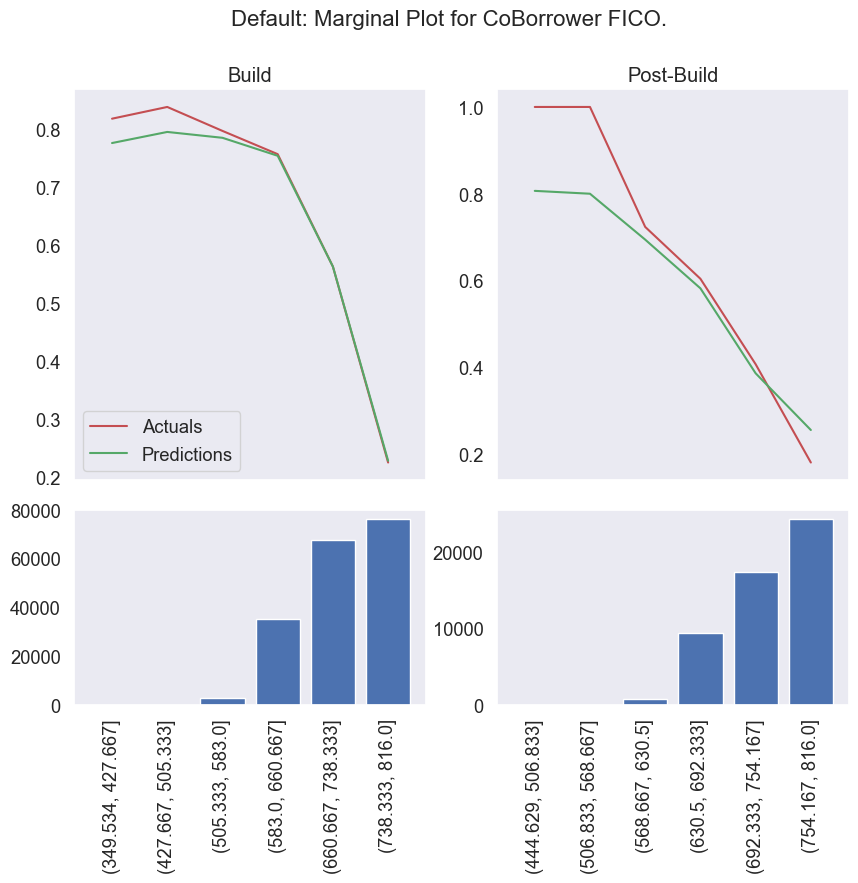

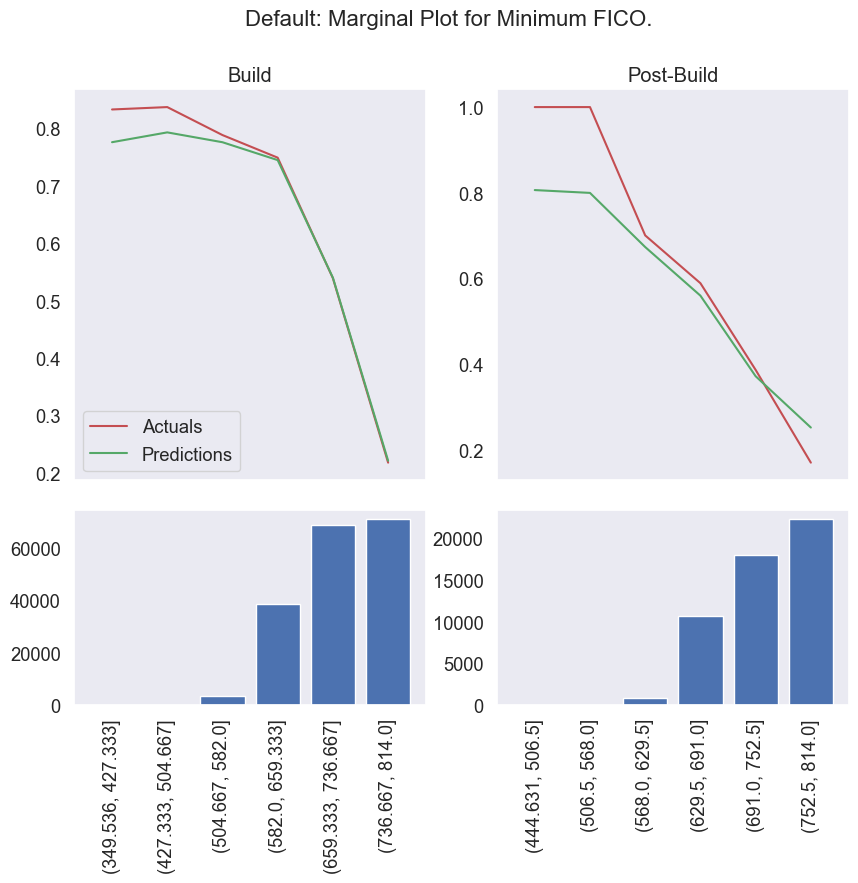

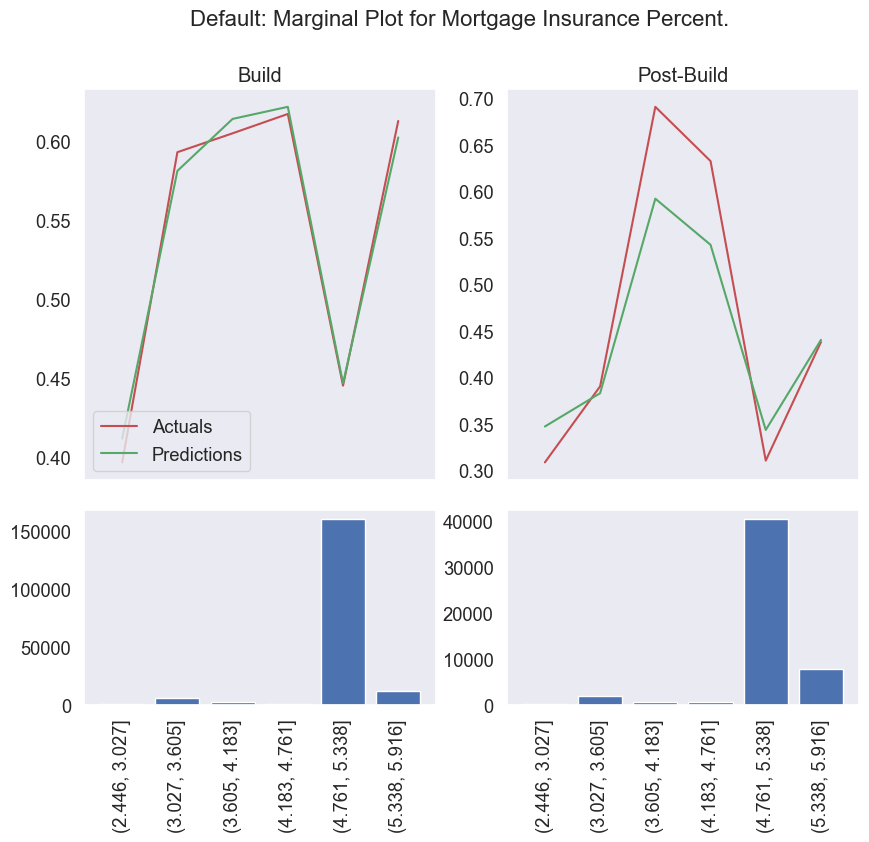

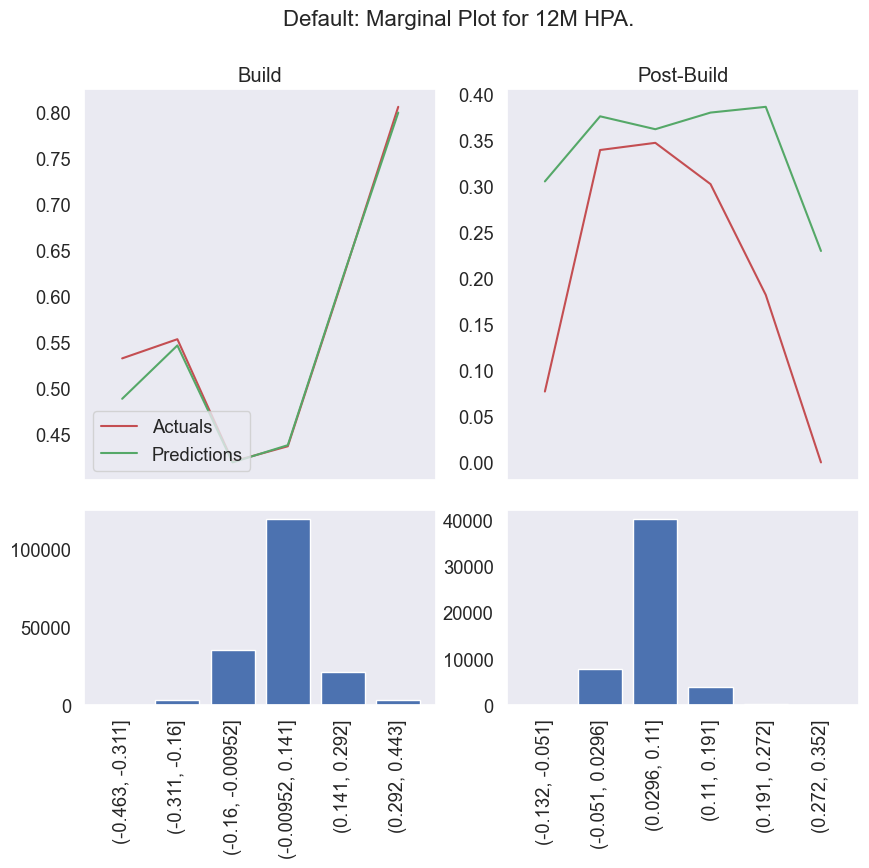

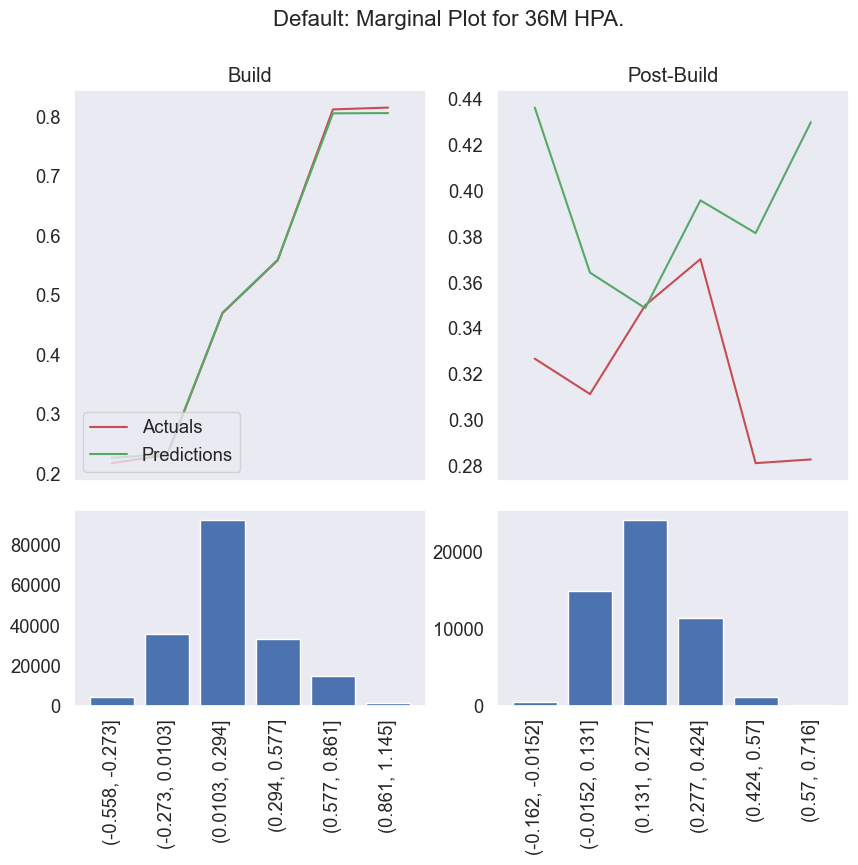

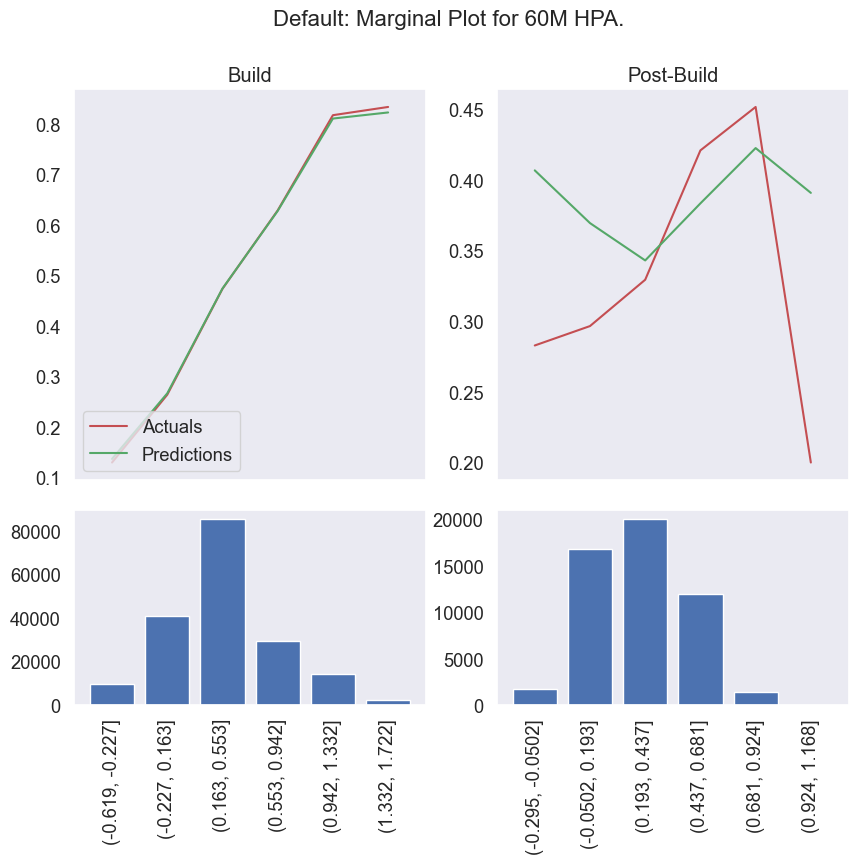

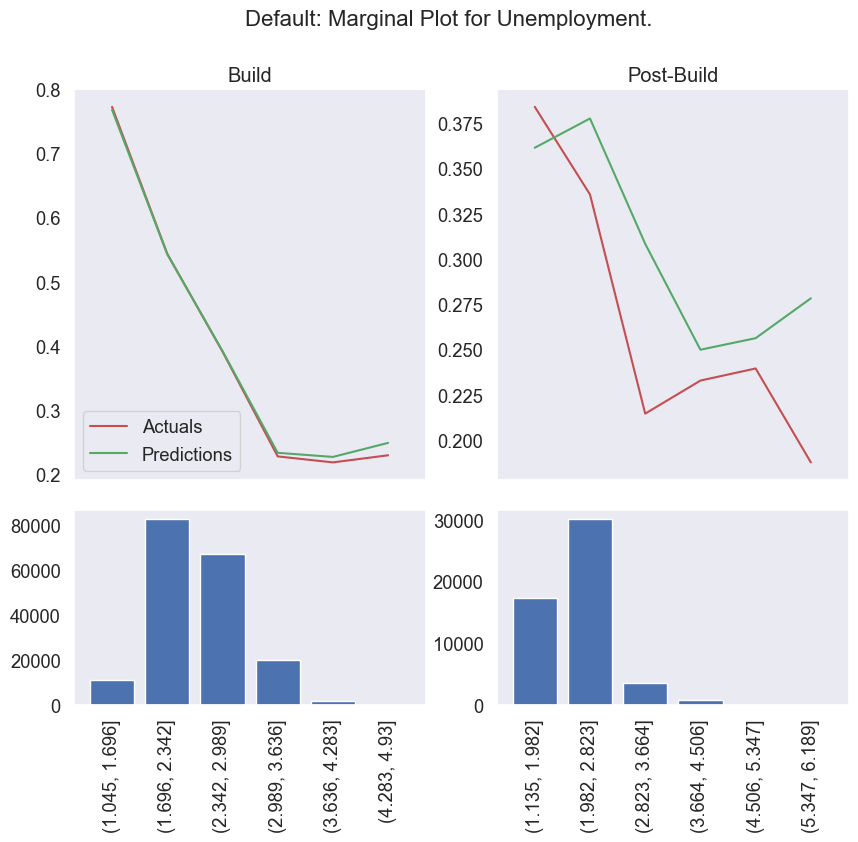

In [132]:

for i,j in zip(x_var_list, x_var_name):
    marginal_plots(df_ins_4plot_xgb,df_oot_4plot_xgb,i,j,y_var,y_pred,bin_size)

# Logistic Regression

In [145]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [133]:
df_model_log = pd.get_dummies(df_model, drop_first=True, columns=cat_vars+bin_vars)
df_model_log.drop(['Vintage'],axis=1,inplace=True)

In [134]:
df_model_log.isna().sum().sum()

0

In [135]:
### there are different types of scalers but for interpretability purposes I will center the numerical variables at their mean


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

x = df_model_log[num_vars].values #returns a numpy array
print(dict(zip(num_vars,x.mean(axis=0))))
print(dict(zip(num_vars,x.std(axis=0))))
scaled_mean=x.mean(axis=0)
scaled_std=x.std(axis=0)
"""
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_model_log = pd.DataFrame(x_scaled, index = df_model_log.index, columns = df_model_log.columns)
"""
"""power_trans=preprocessing.power_transform(x, standardize=True, copy=True)
#x_power_trans=power_trans.fit_transform(x)
df_model_log_num=pd.DataFrame(power_trans, index = df_model_log.index, columns = num_vars)"""

scaler = StandardScaler()

# Fit and transform the data
centered_data = scaler.fit_transform(x)

# The centered data will have a mean close to zero
print(np.mean(centered_data))
# Output: [0.]
df_model_log_num=pd.DataFrame(centered_data, index = df_model_log.index, columns = num_vars)

{'orig_rate': 5.434146296146355, 'orig_upb': 190229.91038135864, 'orig_val': 274023.5668143383, 'orig_term': 321.7123637928757, 'loan_age': 55.7250373943689, 'rem_months': 273.42734838767416, 'oltv': 73.2751074954935, 'ocltv': 74.10656223232664, 'dti': 36.05369873988435, 'cscore_b': 720.6255960726324, 'cscore_c': 721.819309557191, 'cscore_min': 715.8573814992692, 'mi_pct': 24.77790088681119, '12M Change': 0.05036579755171938, '36M Change': 0.19134178120705514, '60M Change': 0.33365531938453585, 'unemp': 5.73851002083857}
{'orig_rate': 1.264571231155936, 'orig_upb': 111124.50524266943, 'orig_val': 179148.60808659348, 'orig_term': 73.28151796647718, 'loan_age': 41.47252387016116, 'rem_months': 89.11027717592363, 'oltv': 16.35818931047985, 'ocltv': 16.449272821307073, 'dti': 11.589301390388423, 'cscore_b': 61.16612344659058, 'cscore_c': 61.36443970132158, 'cscore_min': 61.22869495145147, 'mi_pct': 3.4452944083047967, '12M Change': 0.08515505699072082, '36M Change': 0.22933640263908386, '6

In [136]:
df_model_log_num

orig_rate  orig_upb  orig_val  orig_term  loan_age  rem_months  \
0       -1.232945  1.770717  0.870654   0.522473 -0.981976    0.803192   
1        0.546315 -0.470013 -0.566700   0.522473  1.381034    2.048839   
2        1.040553 -0.353027 -0.593060   0.522473  0.151304    0.275756   
4        0.150924 -0.784975 -0.911371   0.522473  0.368315    0.309422   
5        0.842858 -1.387902 -1.298610   0.522473  0.440652    0.141091   
...           ...       ...       ...        ...       ...         ...   
357678   0.744010  0.285896  0.144999   0.522473 -1.054313    0.836858   
357679  -1.035249  2.103677  1.428850   0.522473 -1.319549    0.960301   
357681  -0.145620  1.734722  1.320932   0.522473 -0.885527    0.758304   
357683  -1.628336 -0.757978 -0.789979   0.522473 -0.113932    0.399198   
357685  -0.936401 -0.865965 -0.873708   0.522473 -1.174875    0.892968   

            oltv     ocltv       dti  cscore_b  cscore_c  cscore_min  \
0       1.022417  0.966209  0.081653  1.150545  1.127374    1.227245   
1       0.411102  0.358280  0.858231 -2.119238 -2.131842   -2.039197   
2       1.022417  0.966209  0.254226  0.087866  0.019241    0.116655   
4       1.205811  1.148588  1.893669 -0.598789 -0.616307   -0.520301   
5       0.839023  0.783830 -1.212644 -1.056559 -1.072597   -0.977603   
...          ...       ...       ...       ...       ...         ...   
357678  0.044314  0.966209  0.081653  0.185959  0.165905    0.263645   
357679  0.411102  0.358280 -1.644077 -0.091972 -0.111128   -0.014003   
357681  0.105445  0.054315  0.599372  1.166894  0.964413    1.063923   
357683  0.411102  0.358280 -0.436066  1.183243  1.192559    1.259910   
357685  0.411102  0.358280  0.513085  1.428477  1.404408    1.504893   

          mi_pct  12M Change  36M Change  60M Change     unemp  
0       0.064464   -0.094037    0.128890    0.631874 -1.243450  
1       0.064464   -0.737423   -0.587021   -0.467576 -0.213353  
2       0.064464   -0.643851    1.474954    1.544255 -0.926497  
4       1.515719    0.134727   -0.168881   -0.324869  0.460172  
5       0.064464    0.126145    0.068061    0.054482  0.579029  
...          ...         ...         ...         ...       ...  
357678  0.064464    0.092004   -0.105845   -0.201581 -0.015257  
357679  0.064464   -0.255878   -0.427724   -0.434433 -0.332210  
357681  0.064464   -0.102531   -0.203464   -0.268239 -0.609544  
357683  0.064464   -0.128058   -1.170983   -2.148575  1.965699  
357685  0.064464   -0.410638   -0.497474   -0.788664 -0.252972  

[234661 rows x 17 columns]

In [137]:
### since I have only centered numeric features I need to reconstitute the model dataset
l_cat=list(df_model_log.columns)
#l_cat.remove(num_vars)
l_cat = [i for i in l_cat if i not in num_vars]
l_cat.remove('Default')

In [138]:
df_model_log = pd.concat([df_model_log_num, df_model_log[l_cat],df_model_log['Default']], axis=1)

In [146]:
### the variables below created issues with logistic regression. Therefore I dropped them
### TO DO: create a variable for num_bo so I can combine any number of borrowers greater than 1 into one category

l=list(df_model_log.columns)
l.remove('Default')
#l.remove('cscore_c')
#l.remove('cscore_min')
#l.remove('ocltv')
l.remove('mi_type_3.0')
#l.remove('num_bo_5.0')
#l.remove('num_bo_6.0')
#l.remove('num_bo_7.0')
#l.remove('high_balance_loan_indicator')
#l.remove('Vintage')

In [147]:
df_oot_log=df_model_log.loc[oot_index_names]
X_oot_log=df_oot_log[l]
Y_oot_log=df_oot_log["Default"]

In [148]:
df_ins_log=df_model_log.drop(oot_index_names)
X_ins_log=df_ins_log[l]
Y_ins_log=df_ins_log["Default"]

In [149]:
Y_ins_log.value_counts(dropna=False)

0    97922
1    84713
Name: Default, dtype: int64

# Logistic Regression w/ GridSearch

In [188]:
model_log = LogisticRegression(max_iter=100, n_jobs=-1)
pipeline = Pipeline(steps=[('selector', SelectKBest(f_classif, k=16)), ('classifier', model_log)])
param_grid = [
    {'classifier__penalty' : ['l1', 'l2','elasticnet'],
     'classifier__C' : np.linspace(0.1, 0.3, 4),
     'classifier__solver' : ['liblinear', 'lbfgs']
}]

In [189]:
log_reg_grid = GridSearchCV( pipeline, param_grid)

In [191]:
log_reg_grid.fit(X_ins_log, Y_ins_log)

GridSearchCV(estimator=Pipeline(steps=[('selector', SelectKBest(k=16)),
                                       ('classifier',
                                        LogisticRegression(n_jobs=-1))]),
             param_grid=[{'classifier__C': array([0.1       , 0.16666667, 0.23333333, 0.3       ]),
                          'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                          'classifier__solver': ['liblinear', 'lbfgs']}])

In [193]:
print('best_parameters :', log_reg_grid.best_params_)
print('accuracy :', log_reg_grid.best_score_)

best_parameters : {'classifier__C': 0.23333333333333334, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
accuracy : 0.8001642620527282


In [195]:
print('Training Score:', log_reg_grid.score(X_ins_log, Y_ins_log))
print('Testing Score:', log_reg_grid.score(X_oot_log, Y_oot_log))

Training Score: 0.8000766556246065
Testing Score: 0.740399031253604


In [198]:
model_LR5 = LogisticRegression(max_iter=1000, C = 0.23333333333333334, penalty= 'l2', solver = 'liblinear')
pipeline_log = Pipeline(steps=[('selector', SelectKBest(f_classif, k=16)), ('classifier', model_LR5)])
pipeline_log.fit(X_ins_log,Y_ins_log)
print('Training Score:', pipeline_log.score(X_ins_log, Y_ins_log))
print('Testing Score:', pipeline_log.score(X_oot_log, Y_oot_log))

Training Score: 0.8000766556246065
Testing Score: 0.740399031253604


In [199]:
model_LR6 = LogisticRegression(max_iter=1000, C = 23333333333333334, penalty= 'l2', solver = 'liblinear')
pipeline_log1 = Pipeline(steps=[('classifier', model_LR6)])
pipeline_log1.fit(X_ins_log,Y_ins_log)
print('Training Score:', pipeline_log1.score(X_ins_log, Y_ins_log))
print('Testing Score:', pipeline_log1.score(X_oot_log, Y_oot_log))

Training Score: 0.8087004133928327
Testing Score: 0.7450889939645562


In [200]:
pipeline_log[:-1].get_feature_names_out()

array(['orig_rate', 'orig_term', 'loan_age', 'rem_months', 'oltv',
       'ocltv', 'dti', 'cscore_b', 'cscore_c', 'cscore_min', '36M Change',
       '60M Change', 'unemp', 'purpose_R', 'mi_type_1.0', 'num_bo_2.0'],
      dtype=object)

In [201]:
pipeline_log.steps[0][1]

SelectKBest(k=16)

In [202]:
pipeline_log.steps[1][1]

LogisticRegression(C=0.23333333333333334, max_iter=1000, solver='liblinear')

In [204]:
a1= pipeline_log[:-1].get_feature_names_out()

In [205]:
a1

array(['orig_rate', 'orig_term', 'loan_age', 'rem_months', 'oltv',
       'ocltv', 'dti', 'cscore_b', 'cscore_c', 'cscore_min', '36M Change',
       '60M Change', 'unemp', 'purpose_R', 'mi_type_1.0', 'num_bo_2.0'],
      dtype=object)

In [206]:
len(pipeline_log[:-1].get_feature_names_out())

16

In [207]:
a2 = pipeline_log.steps[1][1].coef_

In [208]:
a2

array([[ 0.12582789, -0.29643782,  1.05839537,  0.73708728,  0.05316605,
         0.47266292,  0.26939855, -0.37380628, -0.25177404, -0.21225823,
        -0.67213719,  1.19467557, -0.11177094, -0.09697053, -0.08494197,
        -0.71331549]])

In [209]:
df_log_results = pd.DataFrame(a1)

In [210]:
df_log_results2 = pd.DataFrame(a2[0])

In [211]:
result_log = pd.concat([df_log_results, df_log_results2], axis = 1)

In [212]:
result_log.columns = ['feature_names','feature_importances']

In [213]:
result_log['abs_feature_importances']=np.abs(result_log.feature_importances)

In [214]:
result_log.sort_values('feature_importances')

feature_names  feature_importances  abs_feature_importances
15    num_bo_2.0            -0.713315                 0.713315
10    36M Change            -0.672137                 0.672137
7       cscore_b            -0.373806                 0.373806
1      orig_term            -0.296438                 0.296438
8       cscore_c            -0.251774                 0.251774
9     cscore_min            -0.212258                 0.212258
12         unemp            -0.111771                 0.111771
13     purpose_R            -0.096971                 0.096971
14   mi_type_1.0            -0.084942                 0.084942
4           oltv             0.053166                 0.053166
0      orig_rate             0.125828                 0.125828
6            dti             0.269399                 0.269399
5          ocltv             0.472663                 0.472663
3     rem_months             0.737087                 0.737087
2       loan_age             1.058395                 1.058395
11    60M Change             1.194676                 1.194676

In [215]:
pipeline_log.steps[1][1].intercept_

array([-0.15501078])

In [216]:
result_log.set_index('feature_names', inplace=True)
result_log

feature_importances  abs_feature_importances
feature_names                                              
orig_rate                 0.125828                 0.125828
orig_term                -0.296438                 0.296438
loan_age                  1.058395                 1.058395
rem_months                0.737087                 0.737087
oltv                      0.053166                 0.053166
ocltv                     0.472663                 0.472663
dti                       0.269399                 0.269399
cscore_b                 -0.373806                 0.373806
cscore_c                 -0.251774                 0.251774
cscore_min               -0.212258                 0.212258
36M Change               -0.672137                 0.672137
60M Change                1.194676                 1.194676
unemp                    -0.111771                 0.111771
purpose_R                -0.096971                 0.096971
mi_type_1.0              -0.084942                 0.084942
num_bo_2.0               -0.713315                 0.713315

# Saving best Logistic Regression Model

In [242]:
# import joblib
# grid_search_filename = 'logistic_regression_grid_search.joblib'
# # Save the grid search object, including the best model and parameters
# joblib.dump(log_reg_grid, grid_search_filename)

['logistic_regression_grid_search.joblib']

In [243]:
# import joblib
# # Load the grid search object
# loaded_grid_search_log = joblib.load("logistic_regression_grid_search.joblib")
# # Access the best model and best parameters
# best_model = log_reg_grid.best_estimator_
# best_params = log_reg_grid.best_params_

In [244]:
best_params

{'classifier__C': 0.23333333333333334,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [245]:
best_model

Pipeline(steps=[('selector', SelectKBest(k=16)),
                ('classifier',
                 LogisticRegression(C=0.23333333333333334, n_jobs=-1,
                                    solver='liblinear'))])

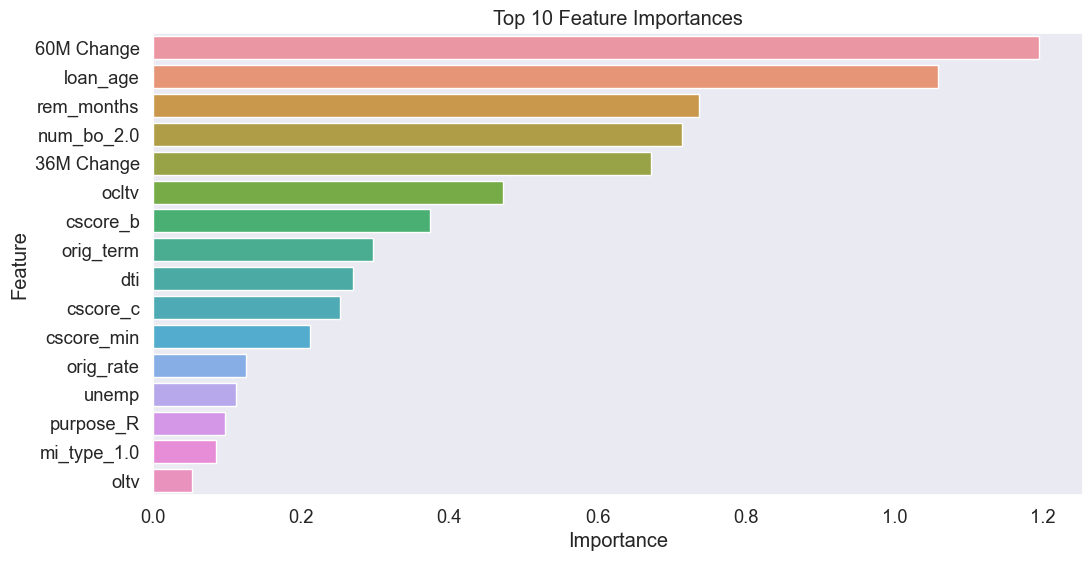

In [222]:
import seaborn as sns

# Get the top 10 most important features
top_10_features = result_log['abs_feature_importances'].nlargest(16)

# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')  # Add grid lines on the x-axis
plt.show()


In [225]:
y_pred= pipeline_log.predict(X_oot_log)

[[0.8477682  0.15223181]
 [0.7944476  0.2055524 ]
 [0.6874478  0.3125522 ]
 ...
 [0.9923636  0.00763642]
 [0.96690375 0.03309627]
 [0.98518574 0.01481425]]
[[22947 11309]
 [ 3098 14672]]


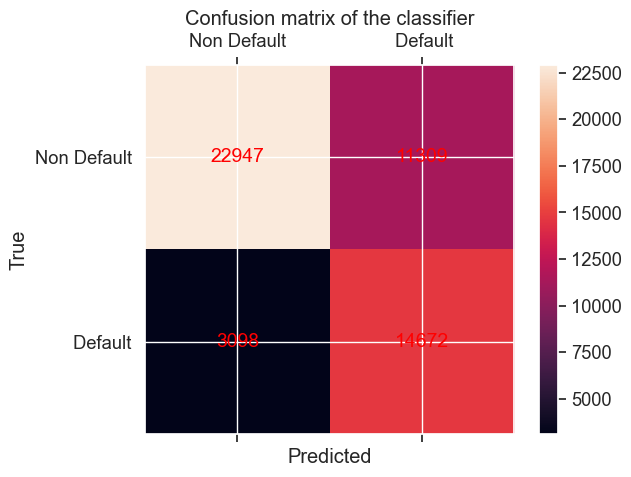

f1: 67.07%


0.8272600019529212

In [237]:
from sklearn.metrics import confusion_matrix, f1_score,roc_auc_score

threshold=0.07
y_pred= pipeline_log.predict(X_oot_log)
print(ypred)
## added Sep 2023
ypred_binary = (ypred[:, 1] >= threshold).astype(int)
np.unique(ypred_binary,return_counts=True)
#cm = confusion_matrix(Y_oot,ypred,labels=[0, 1])
cm = confusion_matrix(Y_oot,ypred_binary)
print(cm)
labels=['Non Default', ' Default']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
# Add class counts to the heatmap cells
for i in range(2):
    for j in range(2):
        ax.text(j + 0.0, i + 0.0, str(cm[i, j]), ha='center', va='center', color='red',fontsize=14)


plt.show()
f1 = f1_score(Y_oot, ypred_binary)
print("f1: %.2f%%" % (f1 * 100.0)) 

ypred_p = best_model.predict_proba(df_oot.values)
roc_auc_score(Y_oot, ypred_p[:, 1])

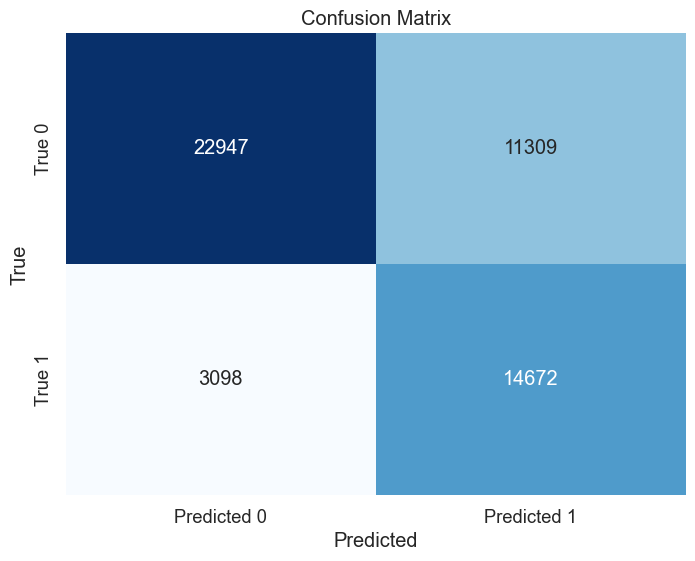

In [238]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predicted labels (replace these with your own data)


# Calculate the confusion matrix
confusion_mat = cm

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


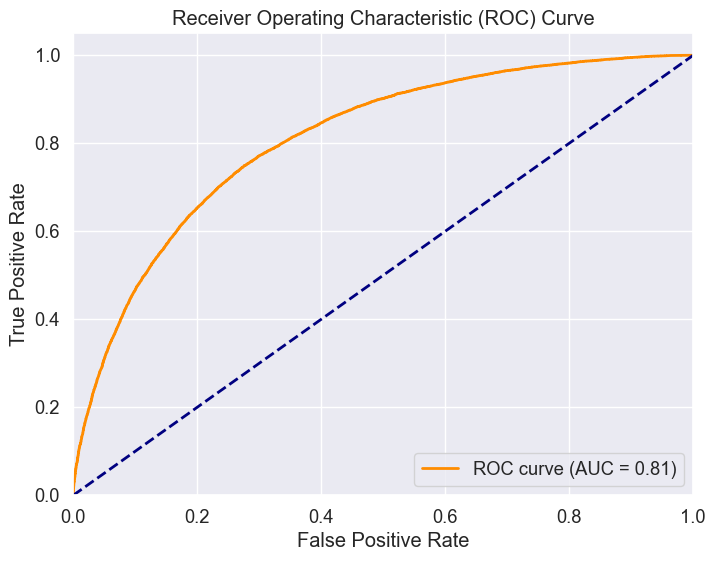

In [246]:
#roc_auc_score(Y_oot, ypred_p[:, 1])
ypred_p = pipeline_log.predict_proba(X_oot_log)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_oot_log, ypred_p[:, 1])
roc_auc = roc_auc_score(Y_oot_log, ypred_p[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [150]:
## Lets calculate intercept adjustment
Original_Data_Actives=2293375803
Original_Data_Defaults=17966109
#Original_Data_Event_Rate:
p1=Original_Data_Defaults/(Original_Data_Defaults+Original_Data_Actives)
print(p1)
Sampled_Data_Actives=114327
Sampled_Data_Defaults=78962
#Sampled_Data_Event_Rate:
r1=Sampled_Data_Defaults/(Sampled_Data_Defaults+Sampled_Data_Actives)
print(r1)
#log[(r1*(1-p1)) / ((1-r1)*p1)],
Intercept_Adjustment=np.log((r1*(1-p1)) / ((1-r1)*p1))

Intercept_Adjustment

0.007773020904749639
0.40851781529212733


4.479196971741276

In [151]:
offset = [ Intercept_Adjustment for i in range(len(X_ins_log.index))]


In [152]:
X_ins_log= sm.add_constant(X_ins_log)
final_features_log=list(X_ins_log.columns)
# Instantiate a binomial family model with the default link function.
#log_model = sm.GLM(Y_ins_log, X_ins_log, family=sm.families.Binomial(),offset=offset)
log_model = sm.GLM(Y_ins_log, X_ins_log, family=sm.families.Binomial())

In [153]:
log_results = log_model.fit()

print(log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:               182635
Model:                            GLM   Df Residuals:                   182593
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78371.
Date:                Wed, 27 Sep 2023   Deviance:                   1.5674e+05
Time:                        15:23:15   Pearson chi2:                 2.29e+05
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [154]:
coeff=log_results.params

In [155]:
coeff

const                               0.664294
orig_rate                           0.077480
orig_upb                            0.541770
orig_val                           -0.523161
orig_term                          -0.248273
loan_age                            1.078413
rem_months                          0.708824
oltv                               -0.279200
ocltv                               0.636962
dti                                 0.245494
cscore_b                           -0.318415
cscore_c                           -0.191966
cscore_min                         -0.318585
mi_pct                              0.008251
12M Change                         -0.441701
36M Change                          0.181414
60M Change                          0.627572
unemp                              -0.118767
channel_C                          -0.114618
channel_R                          -0.265609
purpose_P                          -0.646737
purpose_R                          -0.404752
purpose_U 

In [156]:
coeff_new=coeff.drop('const').to_frame(name='coef')

In [157]:
coeff_new['feat']=coeff_new.index

In [158]:
coeff_new.reset_index(inplace=True)

In [159]:
coeff_new.drop('index',inplace=True,axis=1)

In [160]:
coeff_new_all=pd.concat([coeff_new,pd.Series(scaled_mean),pd.DataFrame(scaled_std)],axis=1).set_axis(labels=['A','B','C','D'],axis=1)

In [161]:
coeff_new_all

A                                B              C              D
0    0.077480                        orig_rate       5.434146       1.264571
1    0.541770                         orig_upb  190229.910381  111124.505243
2   -0.523161                         orig_val  274023.566814  179148.608087
3   -0.248273                        orig_term     321.712364      73.281518
4    1.078413                         loan_age      55.725037      41.472524
5    0.708824                       rem_months     273.427348      89.110277
6   -0.279200                             oltv      73.275107      16.358189
7    0.636962                            ocltv      74.106562      16.449273
8    0.245494                              dti      36.053699      11.589301
9   -0.318415                         cscore_b     720.625596      61.166123
10  -0.191966                         cscore_c     721.819310      61.364440
11  -0.318585                       cscore_min     715.857381      61.228695
12   0.008251                           mi_pct      24.777901       3.445294
13  -0.441701                       12M Change       0.050366       0.085155
14   0.181414                       36M Change       0.191342       0.229336
15   0.627572                       60M Change       0.333655       0.352945
16  -0.118767                            unemp       5.738510       2.524034
17  -0.114618                        channel_C            NaN            NaN
18  -0.265609                        channel_R            NaN            NaN
19  -0.646737                        purpose_P            NaN            NaN
20  -0.404752                        purpose_R            NaN            NaN
21  -1.078545                        purpose_U            NaN            NaN
22  -0.312026                          prop_CP            NaN            NaN
23   0.543052                          prop_MH            NaN            NaN
24   0.060455                          prop_PU            NaN            NaN
25   0.038564                          prop_SF            NaN            NaN
26   0.224121                     no_units_2.0            NaN            NaN
27   0.268235                     no_units_3.0            NaN            NaN
28  -0.202354                     no_units_4.0            NaN            NaN
29  -0.463123                       occ_stat_P            NaN            NaN
30  -0.268045                       occ_stat_S            NaN            NaN
31   0.181845                      mi_type_1.0            NaN            NaN
32   0.550798                      mi_type_2.0            NaN            NaN
33  -0.770699                       num_bo_2.0            NaN            NaN
34  -0.883635                       num_bo_3.0            NaN            NaN
35  -1.654020                       num_bo_4.0            NaN            NaN
36 -22.057551                       num_bo_5.0            NaN            NaN
37   0.424881                       num_bo_6.0            NaN            NaN
38   0.090447                     first_flag_Y            NaN            NaN
39  -0.928067  relocation_mortgage_indicator_Y            NaN            NaN
40   0.723012    high_balance_loan_indicator_Y            NaN            NaN

In [162]:
coeff_new_all['Beta_adj']=np.exp(coeff_new_all['A']/coeff_new_all['D'])

In [163]:
coeff_new_all

A                                B              C              D  \
0    0.077480                        orig_rate       5.434146       1.264571   
1    0.541770                         orig_upb  190229.910381  111124.505243   
2   -0.523161                         orig_val  274023.566814  179148.608087   
3   -0.248273                        orig_term     321.712364      73.281518   
4    1.078413                         loan_age      55.725037      41.472524   
5    0.708824                       rem_months     273.427348      89.110277   
6   -0.279200                             oltv      73.275107      16.358189   
7    0.636962                            ocltv      74.106562      16.449273   
8    0.245494                              dti      36.053699      11.589301   
9   -0.318415                         cscore_b     720.625596      61.166123   
10  -0.191966                         cscore_c     721.819310      61.364440   
11  -0.318585                       cscore_min     715.857381      61.228695   
12   0.008251                           mi_pct      24.777901       3.445294   
13  -0.441701                       12M Change       0.050366       0.085155   
14   0.181414                       36M Change       0.191342       0.229336   
15   0.627572                       60M Change       0.333655       0.352945   
16  -0.118767                            unemp       5.738510       2.524034   
17  -0.114618                        channel_C            NaN            NaN   
18  -0.265609                        channel_R            NaN            NaN   
19  -0.646737                        purpose_P            NaN            NaN   
20  -0.404752                        purpose_R            NaN            NaN   
21  -1.078545                        purpose_U            NaN            NaN   
22  -0.312026                          prop_CP            NaN            NaN   
23   0.543052                          prop_MH            NaN            NaN   
24   0.060455                          prop_PU            NaN            NaN   
25   0.038564                          prop_SF            NaN            NaN   
26   0.224121                     no_units_2.0            NaN            NaN   
27   0.268235                     no_units_3.0            NaN            NaN   
28  -0.202354                     no_units_4.0            NaN            NaN   
29  -0.463123                       occ_stat_P            NaN            NaN   
30  -0.268045                       occ_stat_S            NaN            NaN   
31   0.181845                      mi_type_1.0            NaN            NaN   
32   0.550798                      mi_type_2.0            NaN            NaN   
33  -0.770699                       num_bo_2.0            NaN            NaN   
34  -0.883635                       num_bo_3.0            NaN            NaN   
35  -1.654020                       num_bo_4.0            NaN            NaN   
36 -22.057551                       num_bo_5.0            NaN            NaN   
37   0.424881                       num_bo_6.0            NaN            NaN   
38   0.090447                     first_flag_Y            NaN            NaN   
39  -0.928067  relocation_mortgage_indicator_Y            NaN            NaN   
40   0.723012    high_balance_loan_indicator_Y            NaN            NaN   

    Beta_adj  
0   1.063186  
1   1.000005  
2   0.999997  
3   0.996618  
4   1.026344  
5   1.007986  
6   0.983077  
7   1.039482  
8   1.021409  
9   0.994808  
10  0.996877  
11  0.994810  
12  1.002398  
13  0.005589  
14  2.205685  
15  5.918614  
16  0.954035  
17       NaN  
18       NaN  
19       NaN  
20       NaN  
21       NaN  
22       NaN  
23       NaN  
24       NaN  
25       NaN  
26       NaN  
27       NaN  
28       NaN  
29       NaN  
30       NaN  
31       NaN  
32       NaN  
33       NaN  
34       NaN  
35       NaN  
36       NaN  
37       NaN  
38       NaN  
39       NaN  
40       NaN

In [164]:
df_model.loc[oot_index_names]

channel  orig_rate  orig_upb  orig_term  loan_age  rem_months  oltv  \
0            C      3.875  387000.0      360.0      15.0       345.0  90.0   
13           C      4.500   92000.0      360.0      31.0       329.0  60.0   
21           C      4.875   80000.0      360.0      27.0       333.0  97.0   
47           R      4.000   82000.0      360.0      33.0       327.0  87.0   
49           C      4.625  200000.0      360.0      17.0       343.0  80.0   
...        ...        ...       ...        ...       ...         ...   ...   
357663       R      4.500  177000.0      360.0      32.0       328.0  80.0   
357671       C      3.875   45000.0      120.0      86.0        34.0  75.0   
357679       R      4.125  424000.0      360.0       1.0       359.0  80.0   
357681       B      5.250  383000.0      360.0      19.0       341.0  75.0   
357685       R      4.250   94000.0      360.0       7.0       353.0  80.0   

        ocltv  num_bo   dti  ...  relocation_mortgage_indicator  \
0        90.0     1.0  37.0  ...                              N   
13       60.0     1.0  31.0  ...                              N   
21       97.0     1.0  29.0  ...                              N   
47       87.0     2.0  33.0  ...                              N   
49       80.0     1.0  46.0  ...                              N   
...       ...     ...   ...  ...                            ...   
357663   80.0     1.0  28.0  ...                              N   
357671   75.0     1.0  17.0  ...                              N   
357679   80.0     1.0  17.0  ...                              N   
357681   75.0     2.0  43.0  ...                              N   
357685   80.0     1.0  42.0  ...                              N   

        high_balance_loan_indicator cscore_min       orig_val Vintage  \
0                                 N      791.0  430000.000000    2019   
13                                N      683.0  153333.333333    2016   
21                                N      727.0   82474.226804    2017   
47                                N      720.0   94252.873563    2016   
49                                N      677.0  250000.000000    2019   
...                             ...        ...            ...     ...   
357663                            N      713.0  221250.000000    2017   
357671                            N      796.0   60000.000000    2014   
357679                            N      715.0  530000.000000    2017   
357681                            N      781.0  510666.666667    2019   
357685                            N      808.0  117500.000000    2015   

        Default 12M Change  36M Change  60M Change unemp  
0             1   0.042358    0.220901    0.556672   2.6  
13            1   0.072343    0.221307    0.228621   4.8  
21            1   0.043385    0.119036    0.147404   2.7  
47            1   0.008078    0.027774    0.025166   6.4  
49            1   0.035888    0.082315    0.237040   5.3  
...         ...        ...         ...         ...   ...  
357663        0   0.112417    0.295025    0.617942   3.6  
357671        0   0.014515   -0.008814   -0.054931   5.8  
357679        0   0.028576    0.093249    0.180325   4.9  
357681        0   0.041635    0.144680    0.238982   4.2  
357685        0   0.015398    0.077253    0.055301   5.1  

[52026 rows x 29 columns]

In [165]:

ypred_log = pd.DataFrame(log_results.predict(X_ins_log.values),columns=['pred'])

df1=pd.DataFrame(X_ins_log.values,columns=final_features_log)

df2=pd.DataFrame(Y_ins_log.values,columns =['target'])

df3 =df_model.drop(oot_index_names)
df_ins_4plot=pd.concat([df1,df2,df3[['Vintage']],ypred_log],axis=1)

In [166]:
X_oot_log= sm.add_constant(X_oot_log)
ypred_log_oot = pd.DataFrame(log_results.predict(X_oot_log.values),columns=['pred'])
df1_oot=pd.DataFrame(X_oot_log.values,columns=final_features_log)
df2_oot=pd.DataFrame(Y_oot_log.values,columns =['target'])
df3_oot=df_model.loc[oot_index_names]
df_oot_4plot=pd.concat([df1_oot,df2_oot,df3_oot[['Vintage']],ypred_log_oot],axis=1)

In [168]:
x_var='Vintage'
x_var_plot='Vintage'
y_var='target'
y_pred='pred'
bin_size=6

In [169]:
x_var_list=['Vintage',
            'orig_rate',
 'orig_upb',
 'orig_val',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'dti',
 'cscore_b',
 'cscore_c',
 'cscore_min',
 'mi_pct',
 '12M Change',
 '36M Change',
 '60M Change',
 'unemp']
x_var_name=['Vintage',
            'Origination Rate',
            'Origination Balance',
            'Origination Value',
            'Origination Term',
            'Loan Age',
            'Remaining Months',
            'Origination LTV',
           'Origination CLTV',
            'Debt to Income',
            'Borrower FICO',
            'CoBorrower FICO',
            'Minimum FICO',
            'Mortgage Insurance Percent',
            '12M HPA',
            '36M HPA',
            '60M HPA',
            'Unemployment']


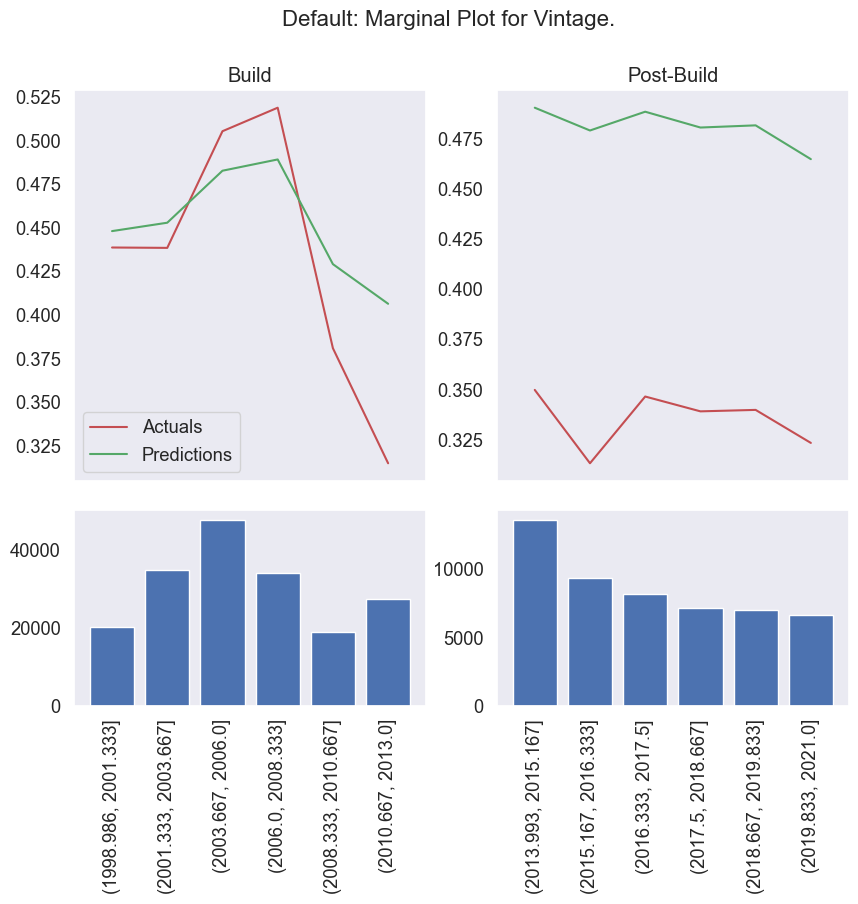

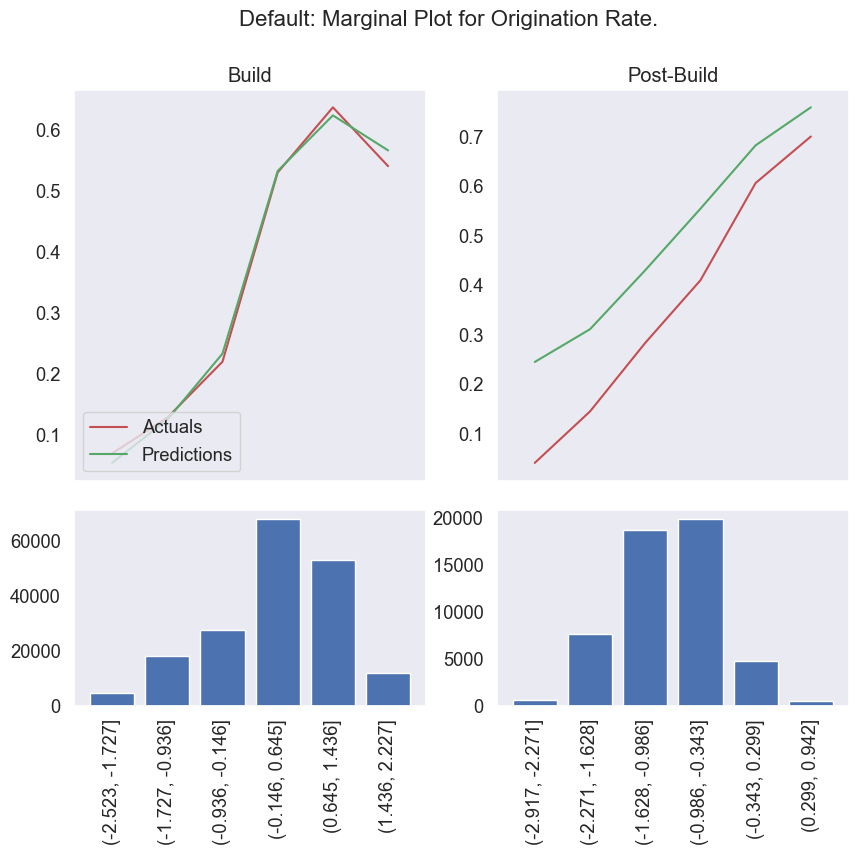

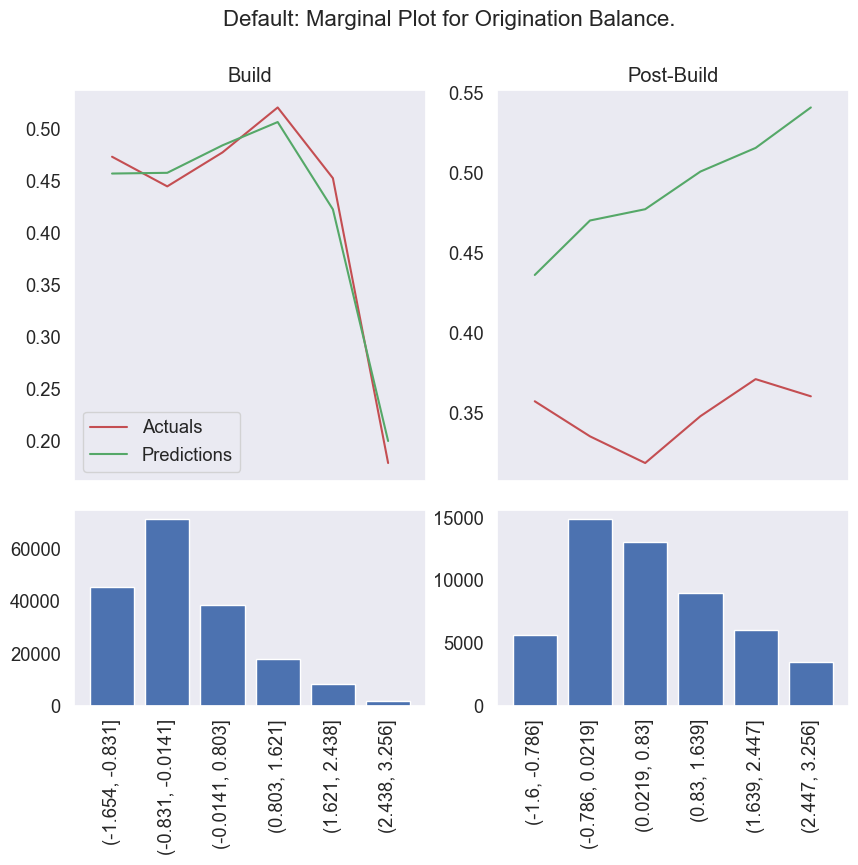

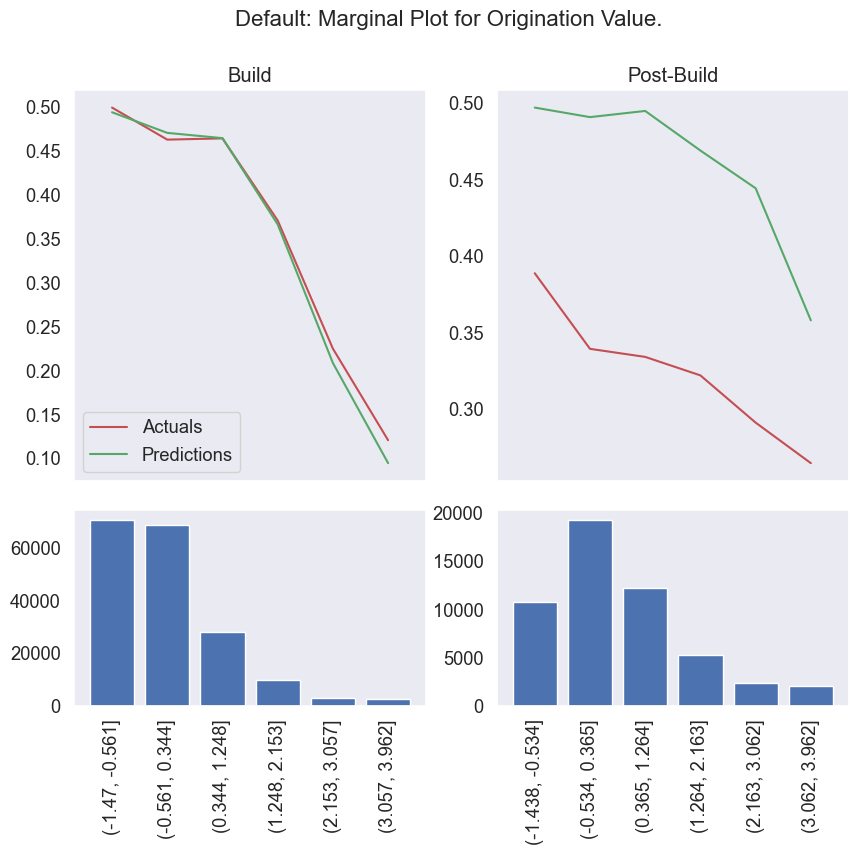

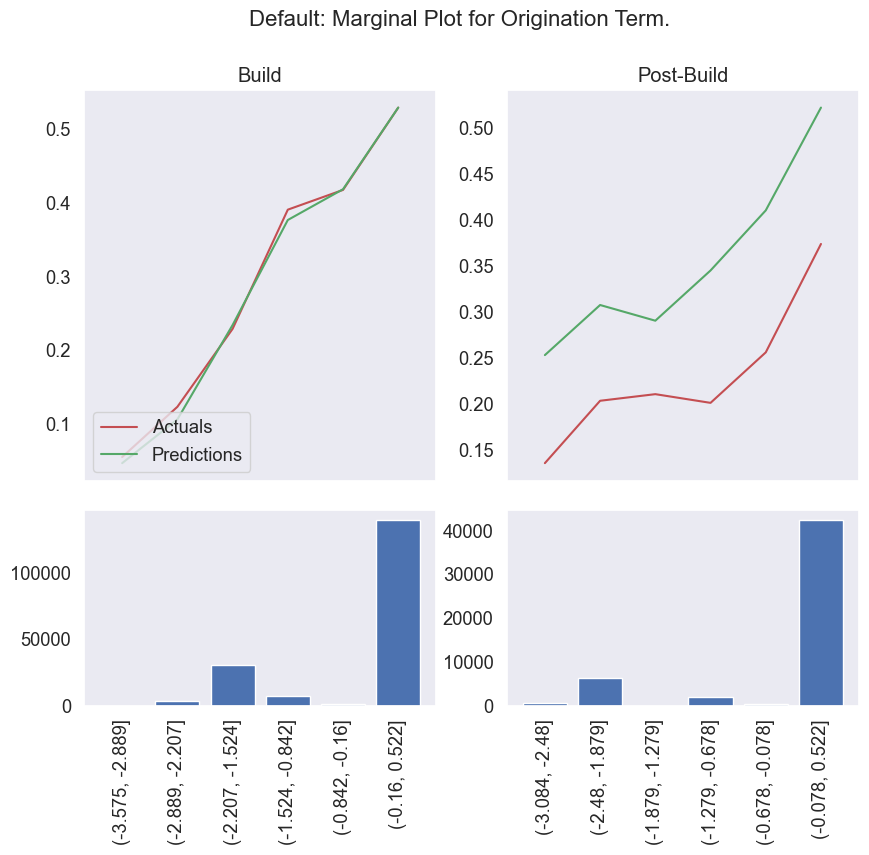

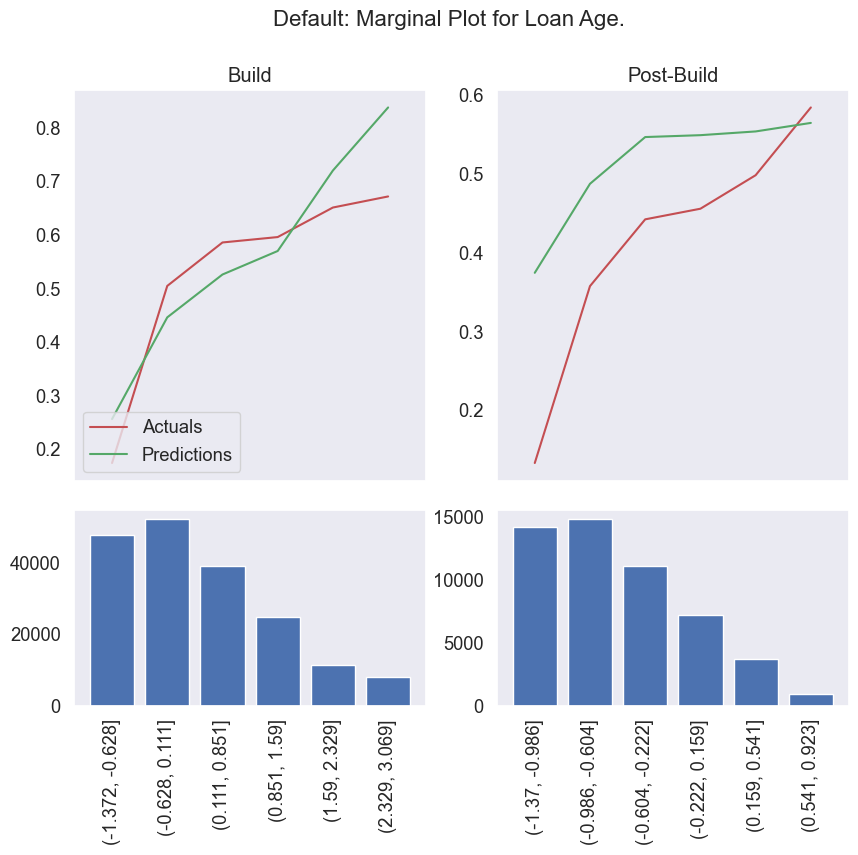

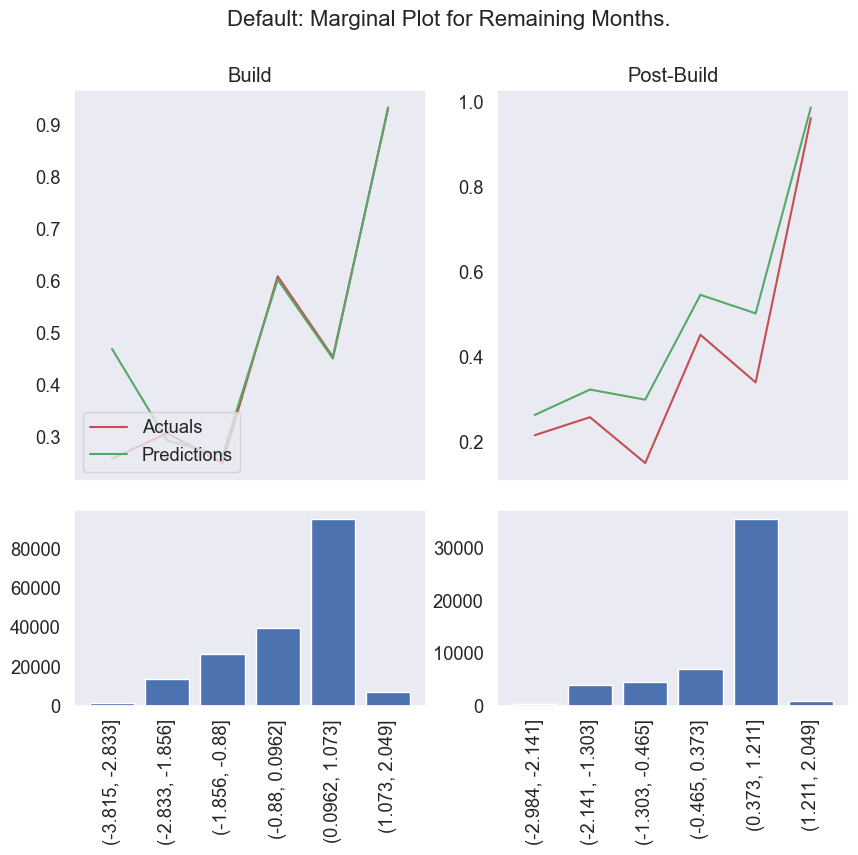

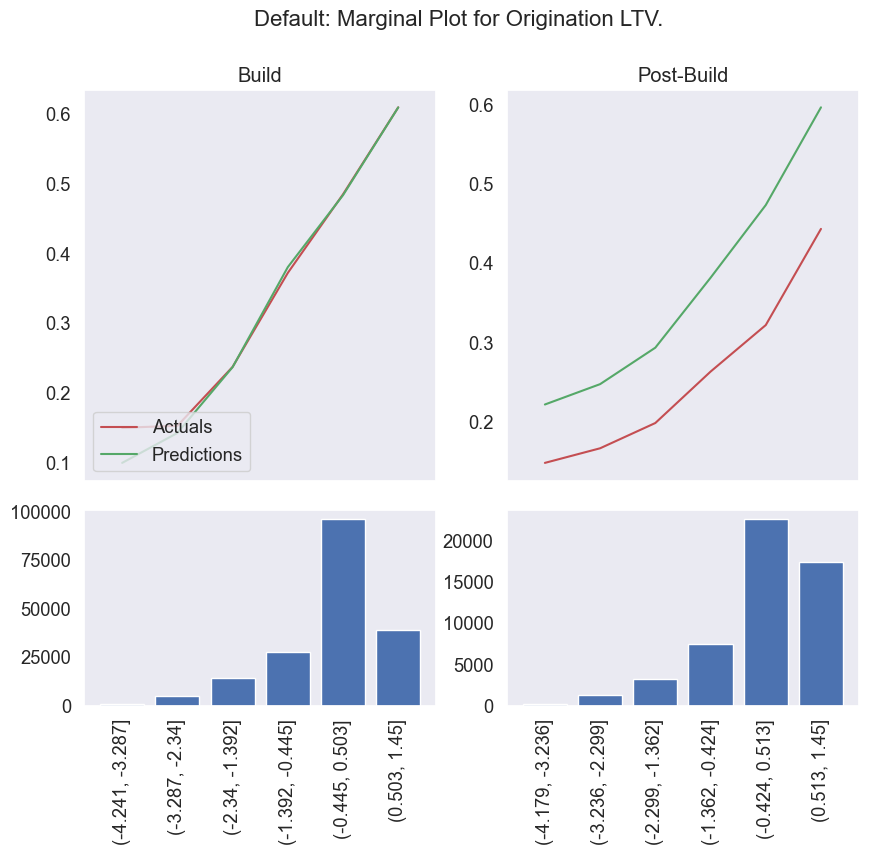

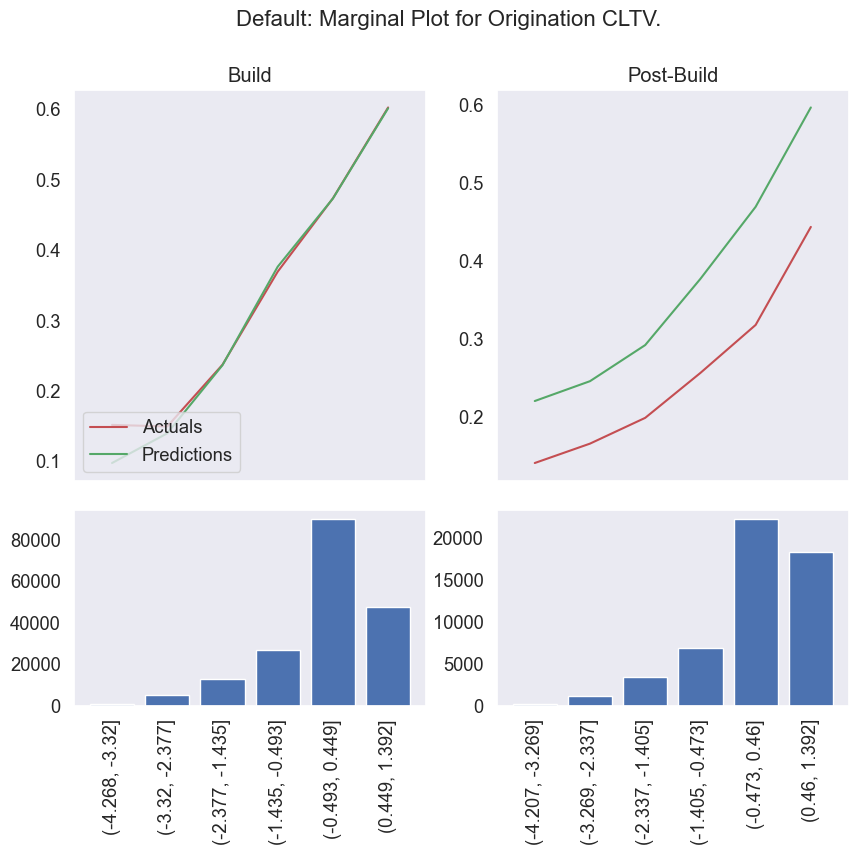

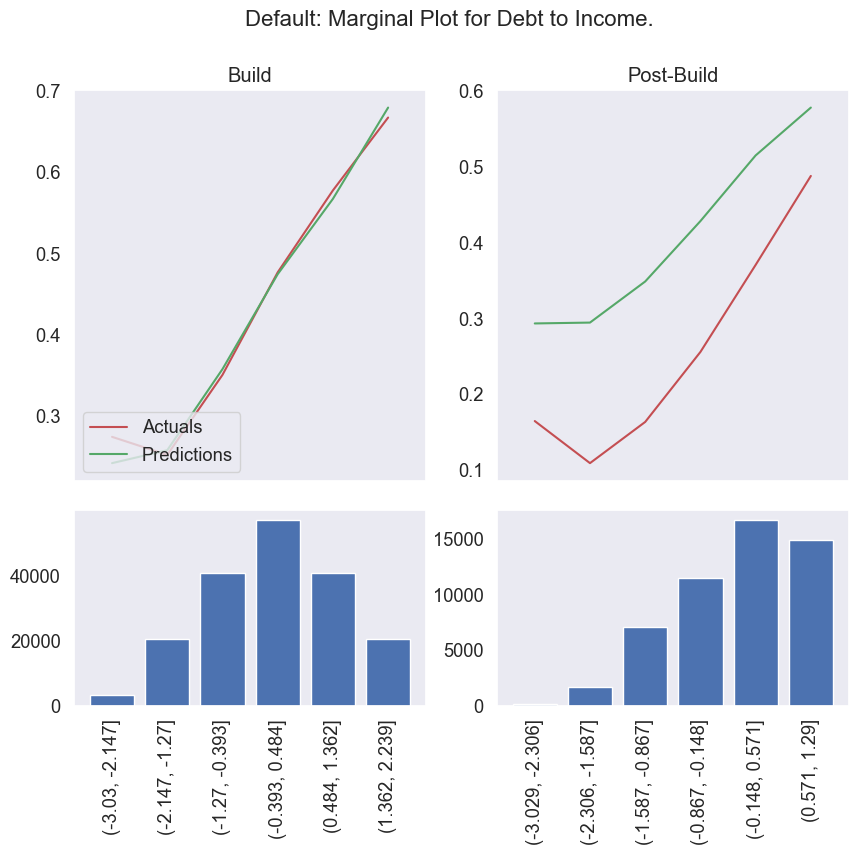

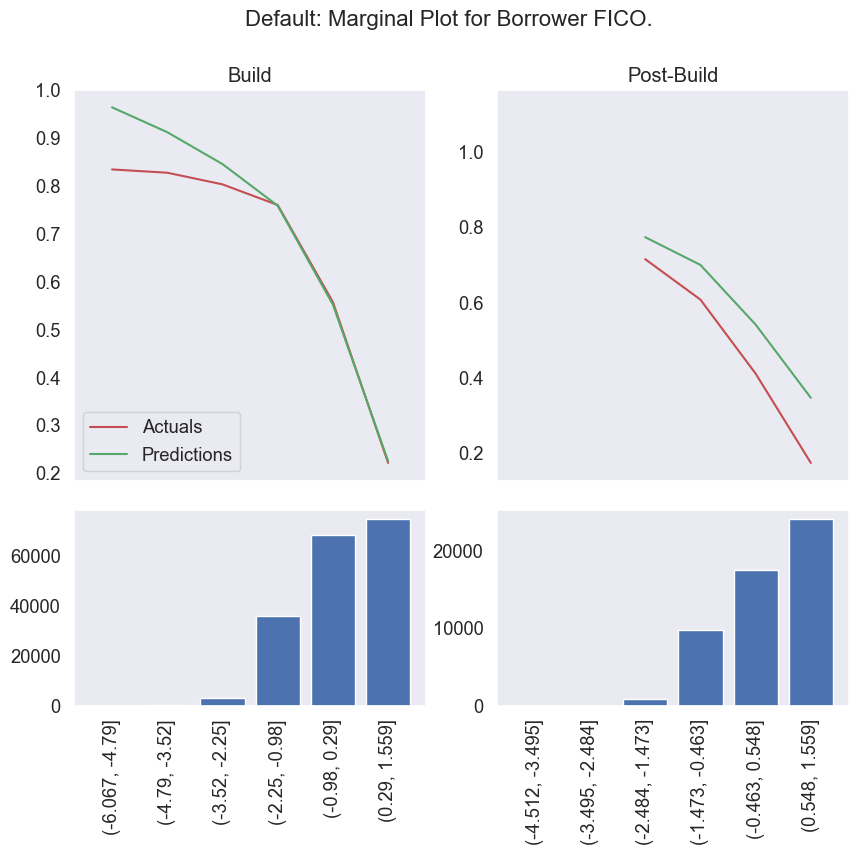

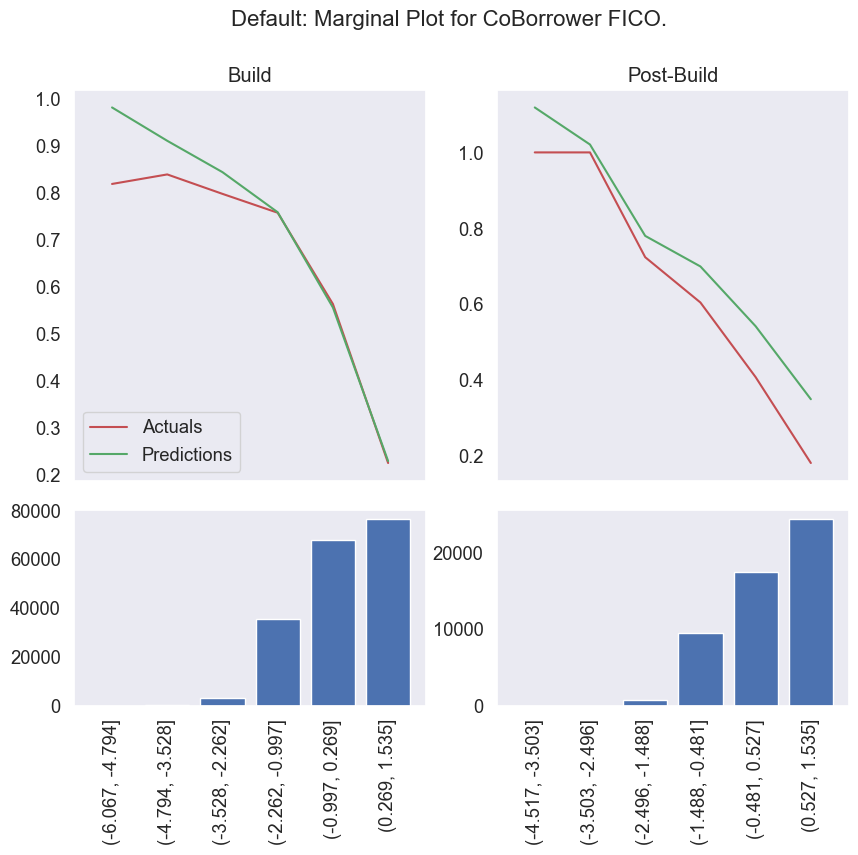

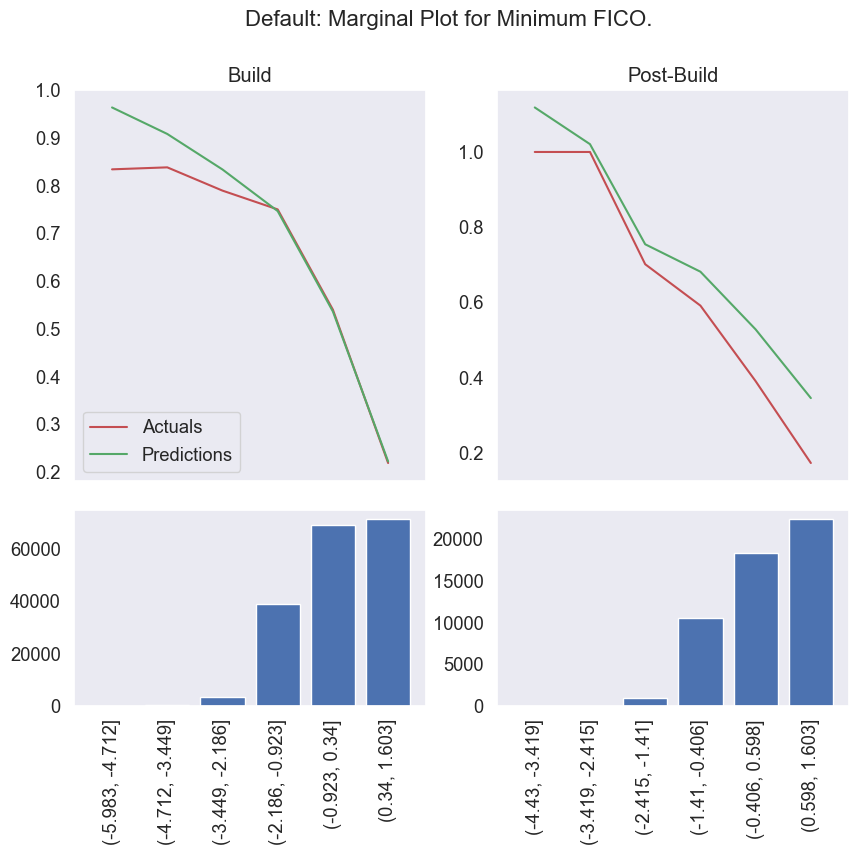

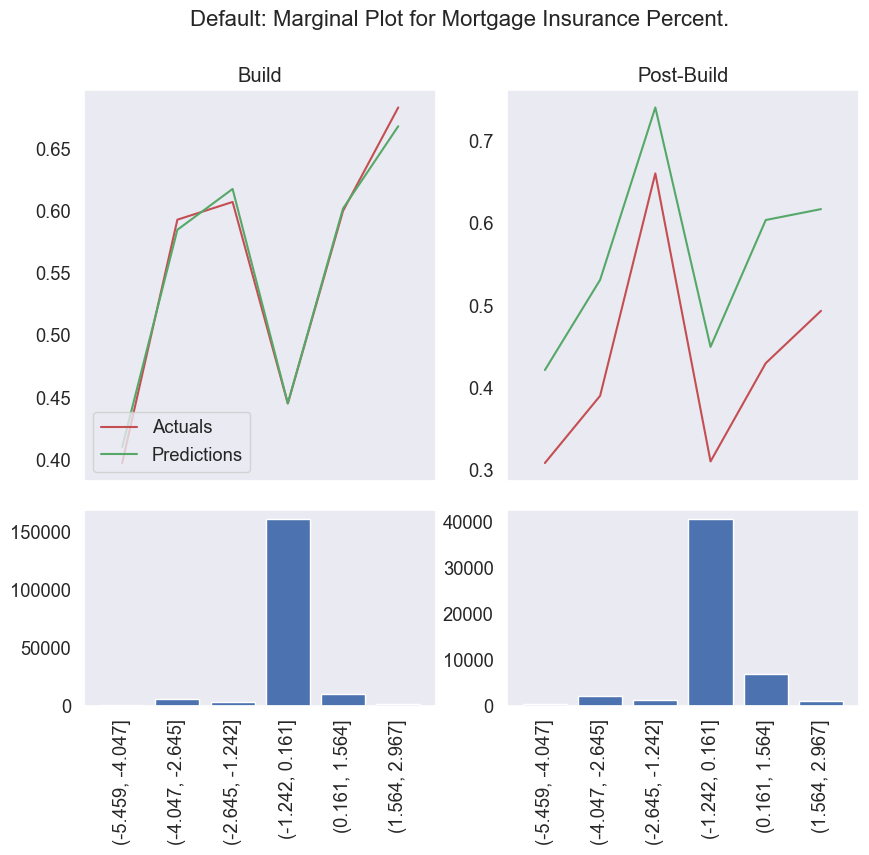

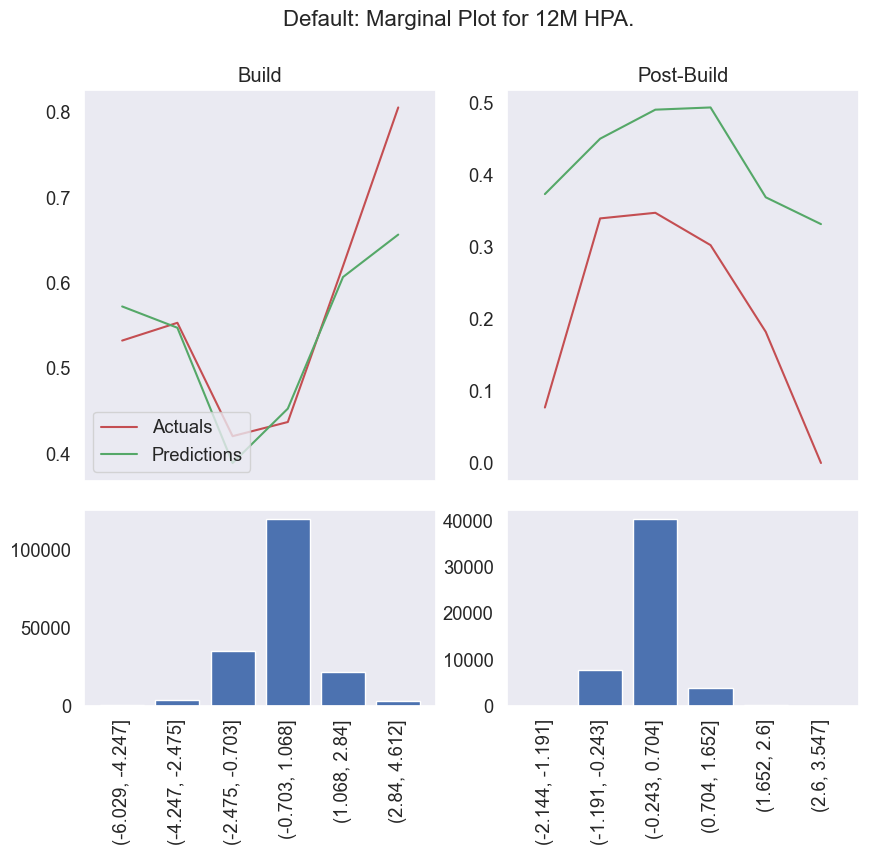

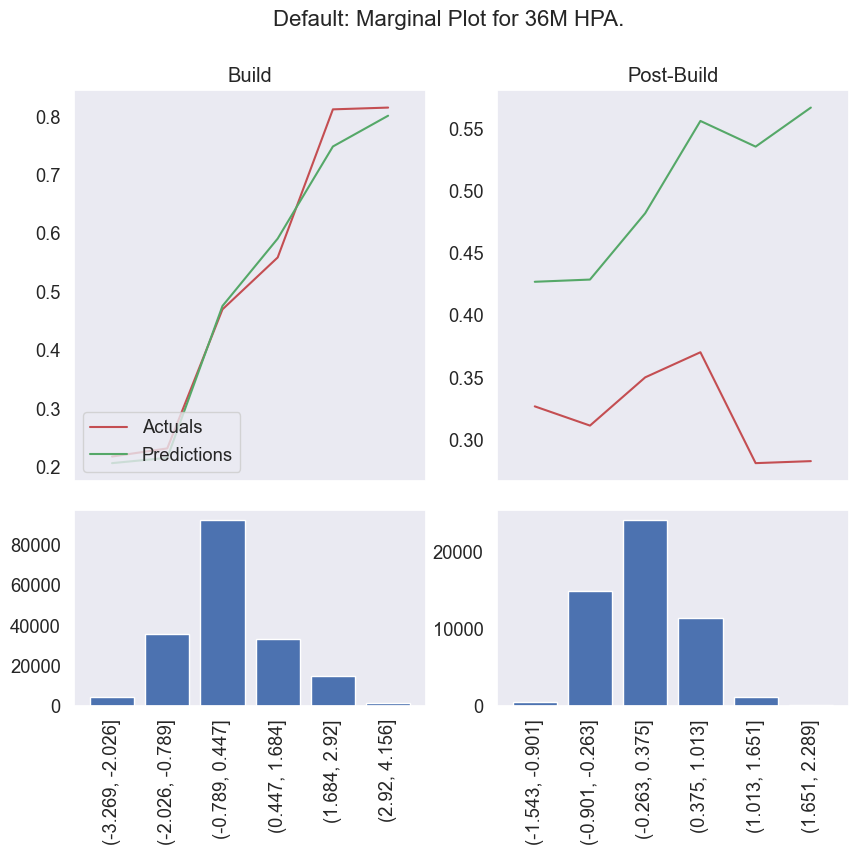

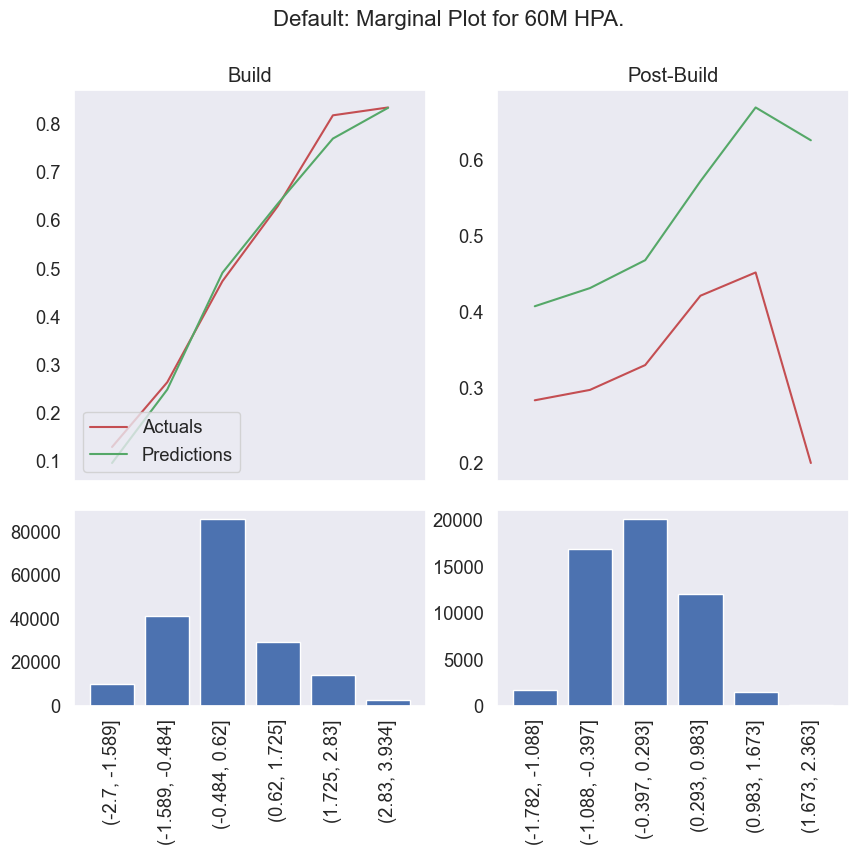

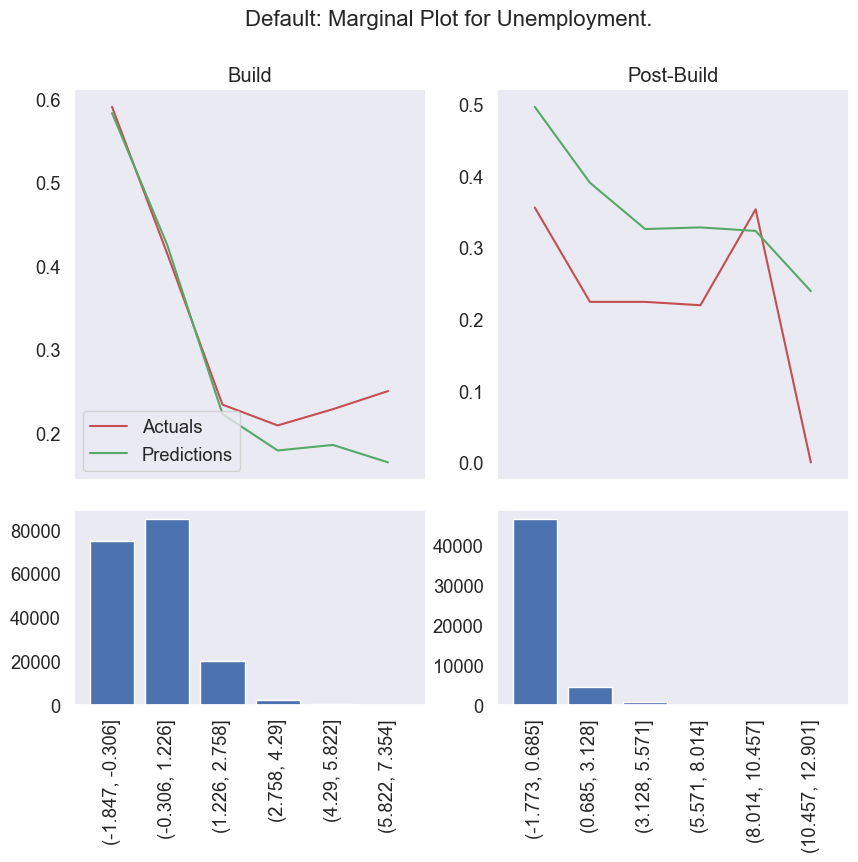

In [170]:

for i,j in zip(x_var_list, x_var_name):

    marginal_plots(df_ins_4plot,df_oot_4plot,i,j,y_var,y_pred,bin_size)

In [171]:
### there are different types of scalers but for interpretability purposes I will center the numerical variables at their mean


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

x = df_model_log[num_vars].values #returns a numpy array
"""
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_model_log = pd.DataFrame(x_scaled, index = df_model_log.index, columns = df_model_log.columns)
"""
"""power_trans=preprocessing.power_transform(x, standardize=True, copy=True)
#x_power_trans=power_trans.fit_transform(x)
df_model_log_num=pd.DataFrame(power_trans, index = df_model_log.index, columns = num_vars)"""

scaler = StandardScaler()

# Fit and transform the data
centered_data = scaler.fit_transform(x)

# The centered data will have a mean close to zero
#print(np.mean(centered_data))
# Output: [0.]
#df_model_log_num=pd.DataFrame(centered_data, index = df_model_log.index, columns = num_vars)

In [172]:


# Specify the independent (numericals to spline and dummies as is) and dependent variables
#x1 = data["Independent_Variable_1"]
#x2 = data["Independent_Variable_2"]
#y = data["Dependent_Variable"]

# Define a design matrix for B-splines only for x1
#x_trans = sm.tools.tools.add_constant(x, prepend=False)
#x_spline = sm.tools.splines.BSplines(x, df=3, degree=3)
#x1_trans = x_spline.build_design_matrix(x_trans)

from sklearn import preprocessing
from sklearn.preprocessing import SplineTransformer
spline = SplineTransformer(degree=1, n_knots=2)
#x1_trans=spline.fit_transform(x)
x1_trans=spline.fit_transform(centered_data)
spline_cols=spline.get_feature_names_out(input_features=num_vars)



#df_model_log_num_spline=pd.DataFrame(x1_trans, index = df_model_log.index, columns = num_vars)
df_model_log_num_spline=pd.DataFrame(x1_trans, index = df_model_log.index,columns=spline_cols)

In [173]:
### since I have only centered numeric features I need to reconstitute the model dataset

l_cat=list(df_model_log.columns)
#l_cat.remove(num_vars)
l_cat = [i for i in l_cat if i not in num_vars]
l_cat.remove('Default')

In [174]:
df_model_log_spline = pd.concat([df_model_log_num_spline, df_model_log[l_cat],df_model_log['Default']], axis=1)


In [175]:
### the variables below created issues with logistic regression. Therefore I dropped them
### TO DO: create a variable for num_bo so I can combine any number of borrowers greater than 1 into one category

l=list(df_model_log_spline.columns)
l.remove('Default')
#l.remove('cscore_c')
#l.remove('cscore_min')
#l.remove('ocltv')
l.remove('mi_type_3.0')
l.remove('num_bo_5.0')
#l.remove('num_bo_6.0')
#l.remove('num_bo_7.0')
#l.remove('high_balance_loan_indicator')
#l.remove('Vintage')

In [176]:
df_oot_log_spline=df_model_log_spline.loc[oot_index_names]
X_oot_log_spline=df_oot_log_spline[l]
Y_oot_log_spline=df_oot_log_spline["Default"]

In [177]:
df_ins_log_spline=df_model_log_spline.drop(oot_index_names)
X_ins_log_spline=df_ins_log_spline[l]
Y_ins_log_spline=df_ins_log_spline["Default"]

In [178]:
X_ins_log_spline= sm.add_constant(X_ins_log_spline)
final_features_log_spline=list(X_ins_log_spline.columns)
# Instantiate a binomial family model with the default link function.
#log_model = sm.GLM(Y_ins_log, X_ins_log, family=sm.families.Binomial(),offset=offset)
log_model_spline = sm.GLM(Y_ins_log_spline, X_ins_log_spline, family=sm.families.Binomial())

In [179]:
log_results_spline = log_model_spline.fit()

print(log_results_spline.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:               182635
Model:                            GLM   Df Residuals:                   182594
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78373.
Date:                Wed, 27 Sep 2023   Deviance:                   1.5675e+05
Time:                        15:29:11   Pearson chi2:                 2.29e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [180]:
#ypred = pd.DataFrame(xgbc.predict_proba(df_ins.values),columns=['predA','pred'])
ypred_log_spline = pd.DataFrame(log_results_spline.predict(X_ins_log_spline.values),columns=['pred'])
#df1 = pd.DataFrame(df_ins.values, columns =final_features)
df1=pd.DataFrame(X_ins_log_spline.values,columns=final_features_log_spline)
#df2 = pd.DataFrame(Y_ins.values, columns =['target'])
df2=pd.DataFrame(Y_ins_log.values,columns =['target'])
#df3 = df.drop(oot_index_names) ## df_oot=df_model.loc[oot_index_names]s ##
df3 =df_model.drop(oot_index_names)
df_ins_4plot=pd.concat([df1,df2,df3[['Vintage']+num_vars],ypred_log],axis=1)

In [181]:
X_oot_log_spline= sm.add_constant(X_oot_log_spline)
#ypred_oot = pd.DataFrame(xgbc.predict_proba(df_oot.values),columns=['predA','pred'])
ypred_log_oot_spline = pd.DataFrame(log_results_spline.predict(X_oot_log_spline.values),columns=['pred'])
#df1_oot = pd.DataFrame(df_oot.values, columns =final_features)
df1_oot=pd.DataFrame(X_oot_log_spline.values,columns=final_features_log_spline)
#df2_oot = pd.DataFrame(Y_oot.values, columns =['target'])
df2_oot=pd.DataFrame(Y_oot_log_spline.values,columns =['target'])
#df3_oot=df.loc[oot_index_names] ## df_oot=df_model.loc[oot_index_names]
df3_oot=df_model.loc[oot_index_names]
df_oot_4plot=pd.concat([df1_oot,df2_oot,df3_oot[['Vintage']+num_vars],ypred_log_oot],axis=1)

In [182]:
x_var_list=['Vintage',
            'orig_rate',
 'orig_upb',
 'orig_val',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'dti',
 'cscore_b',
 'cscore_c',
 'cscore_min',
 'mi_pct',
 '12M Change',
 '36M Change',
 '60M Change',
 'unemp']
x_var_name=['Vintage',
            'Origination Rate',
            'Origination Balance',
            'Origination Value',
            'Origination Term',
            'Loan Age',
            'Remaining Months',
            'Origination LTV',
           'Origination CLTV',
            'Debt to Income',
            'Borrower FICO',
            'CoBorrower FICO',
            'Minimum FICO',
            'Mortgage Insurance Percent',
            '12M HPA',
            '36M HPA',
            '60M HPA',
            'Unemployment']


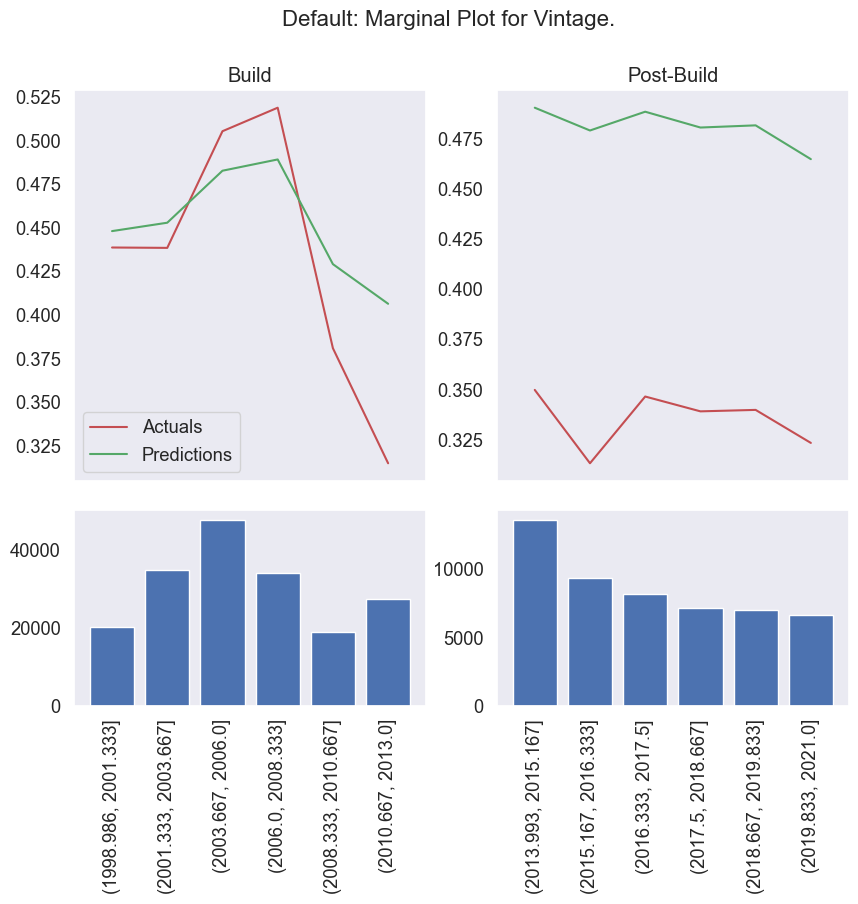

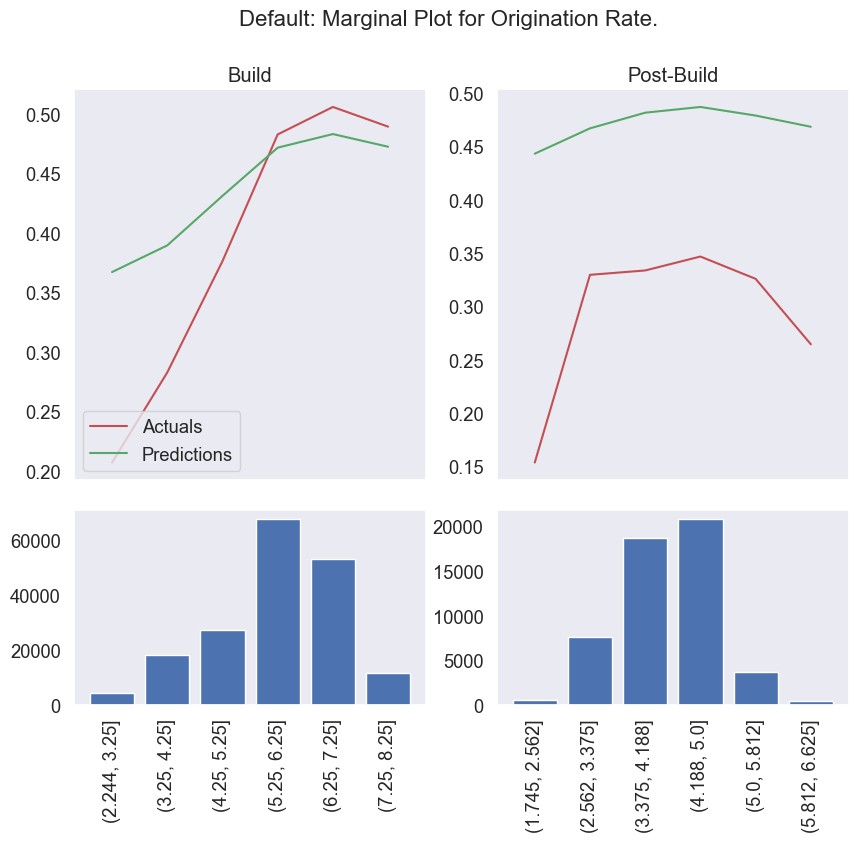

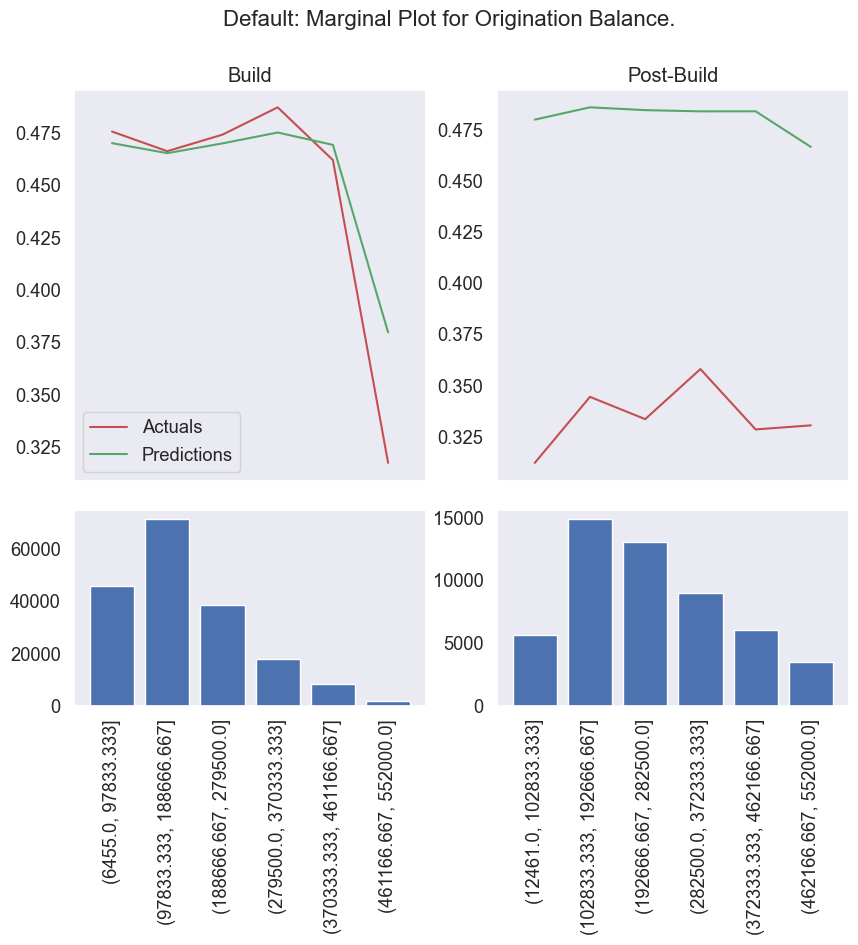

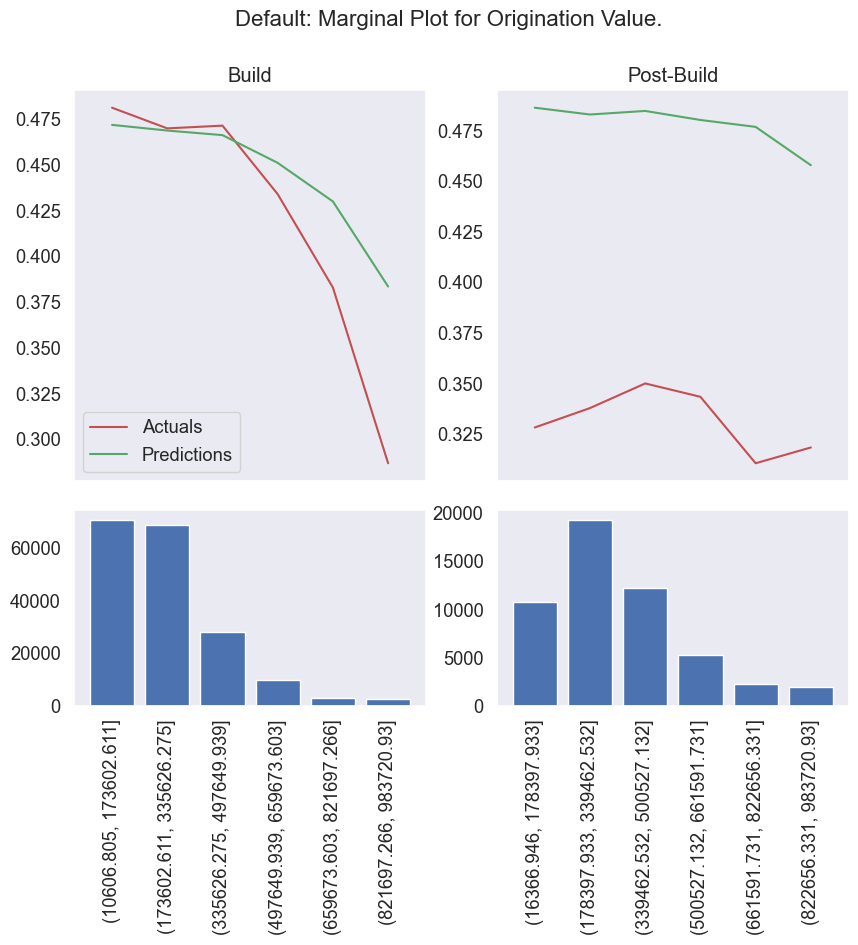

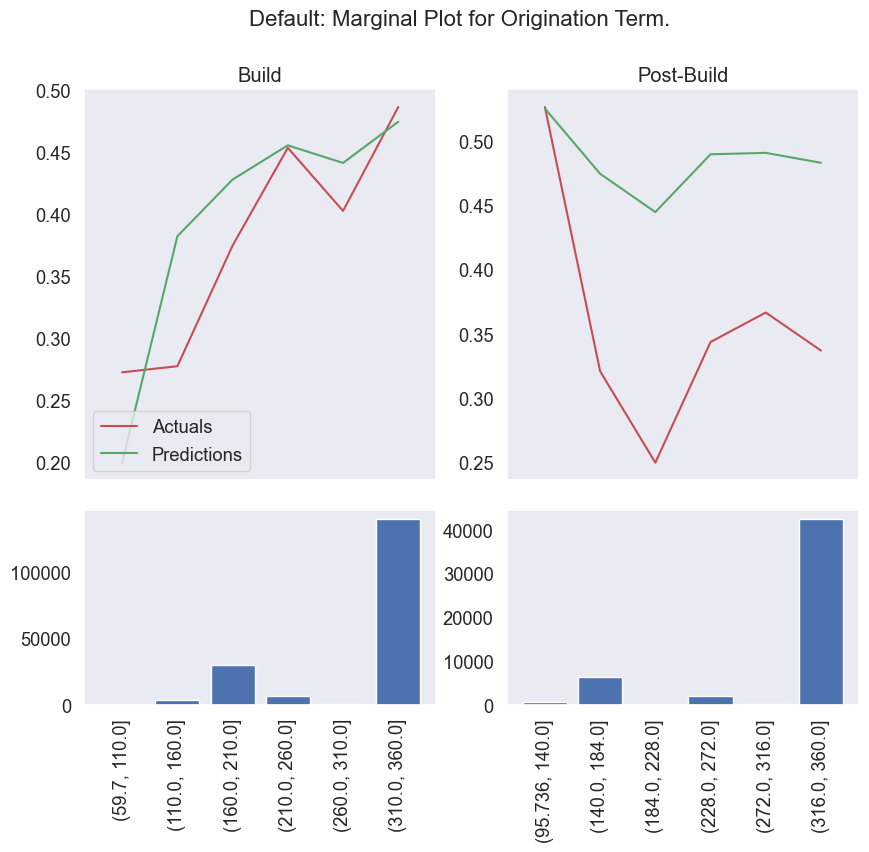

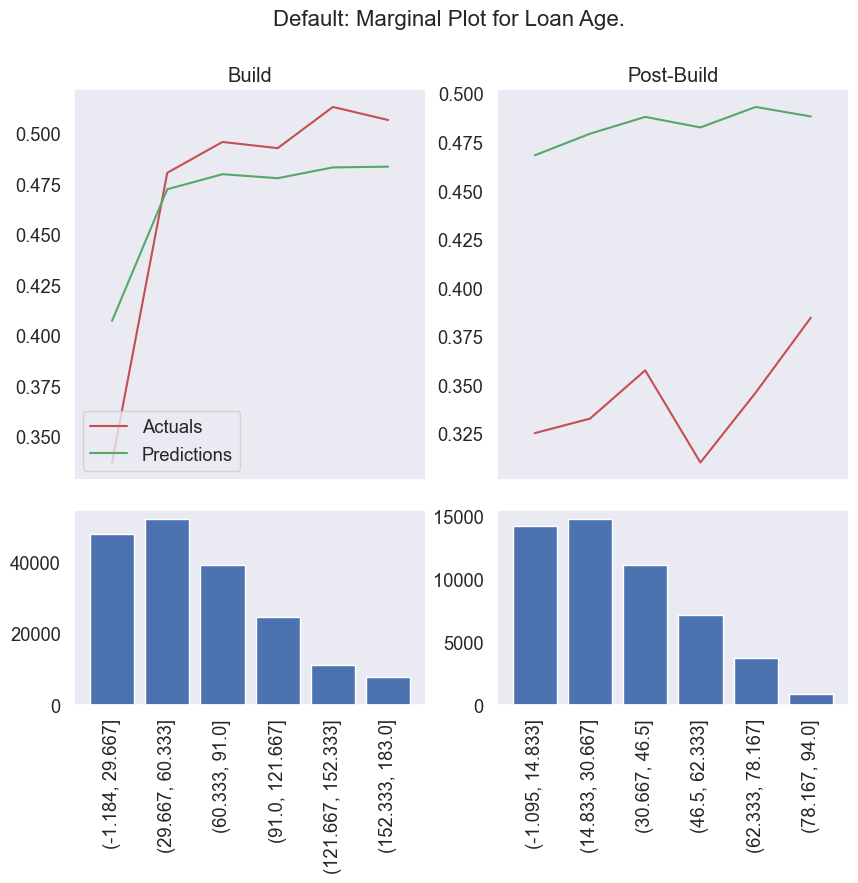

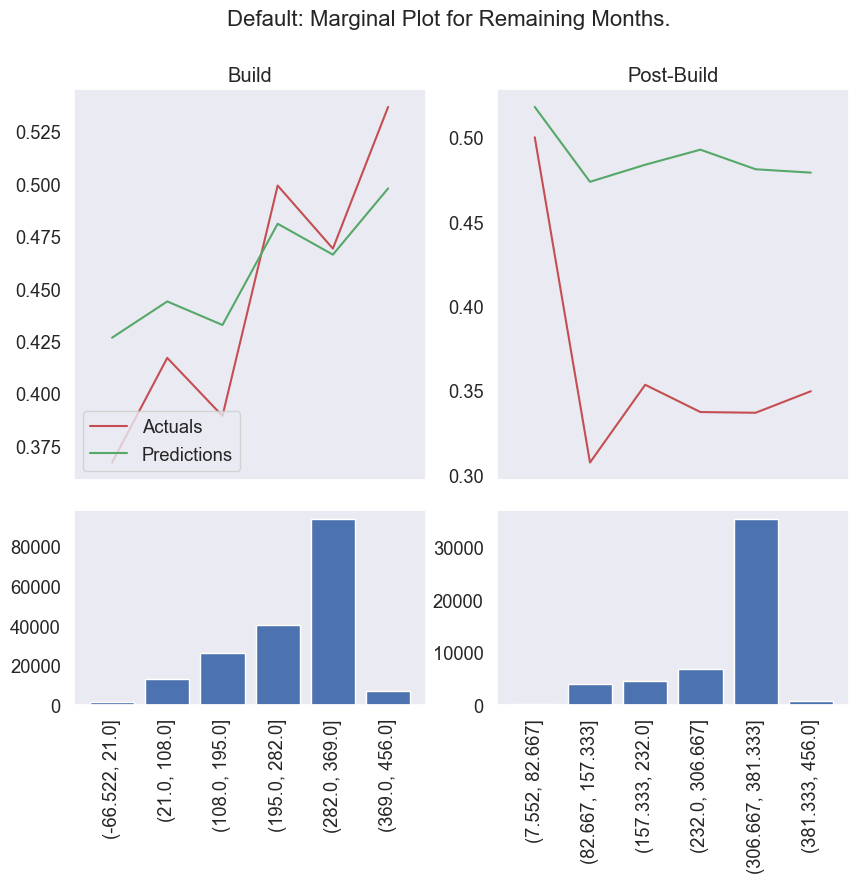

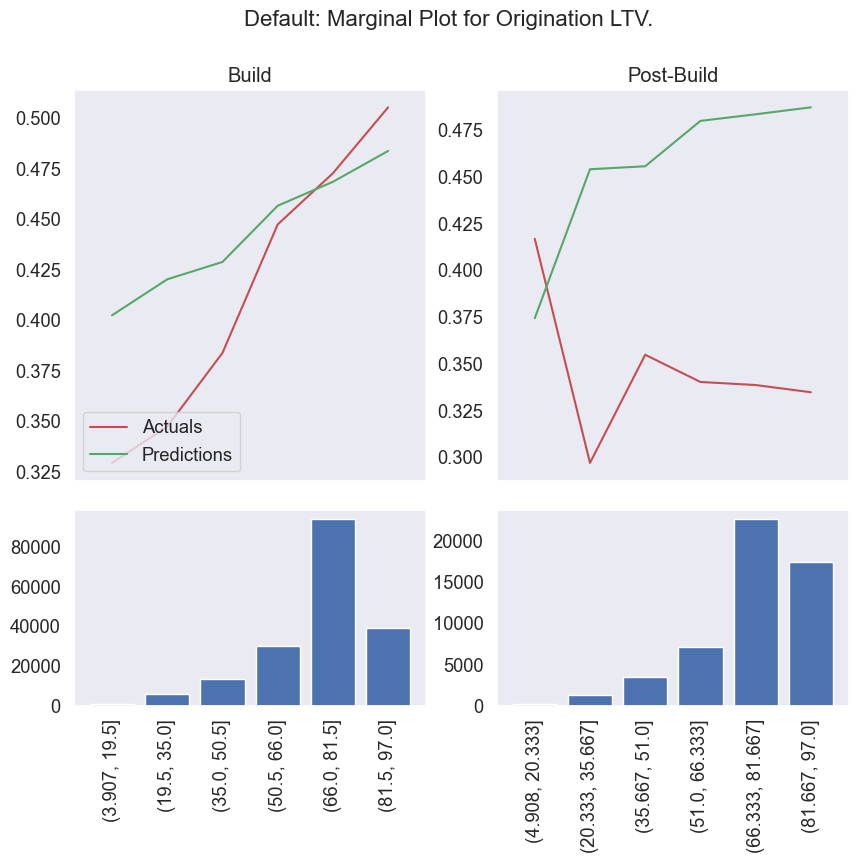

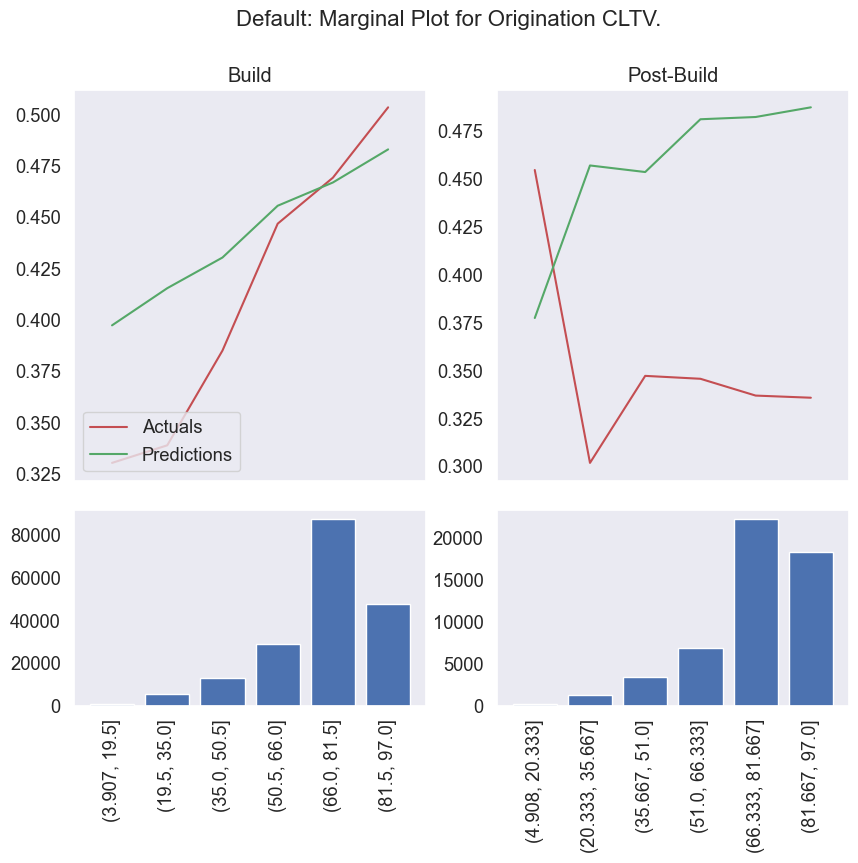

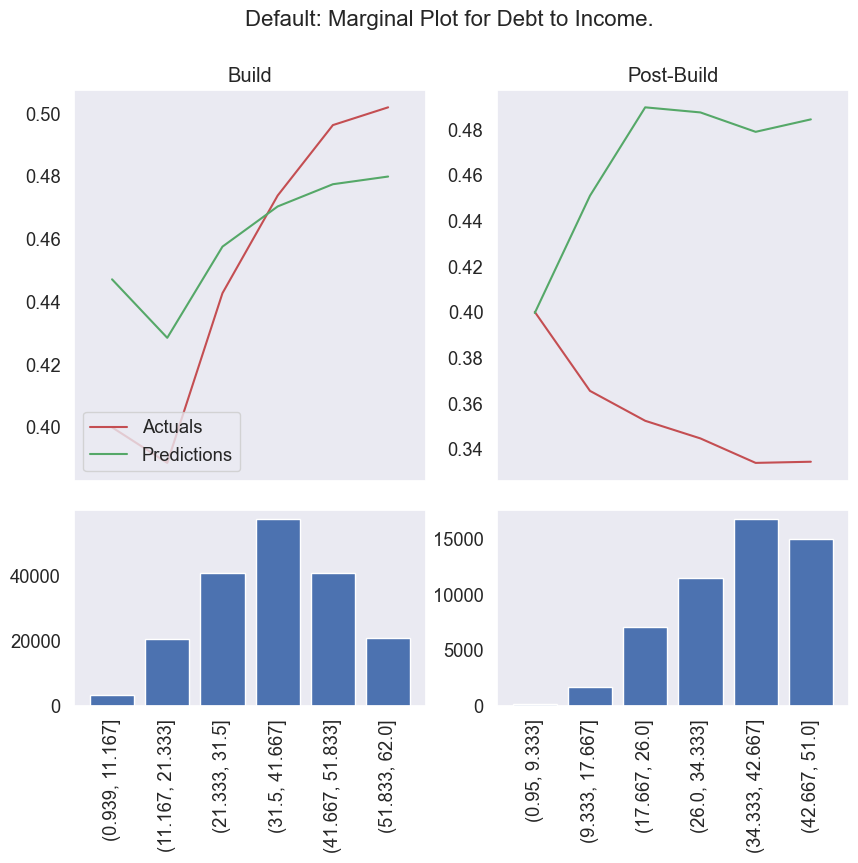

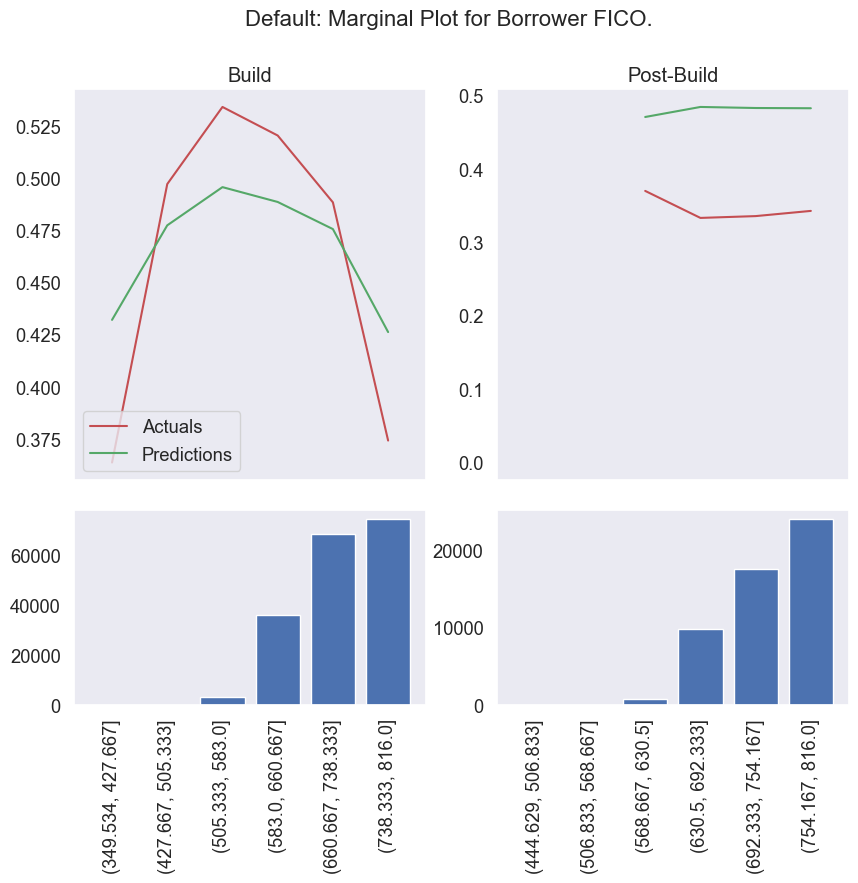

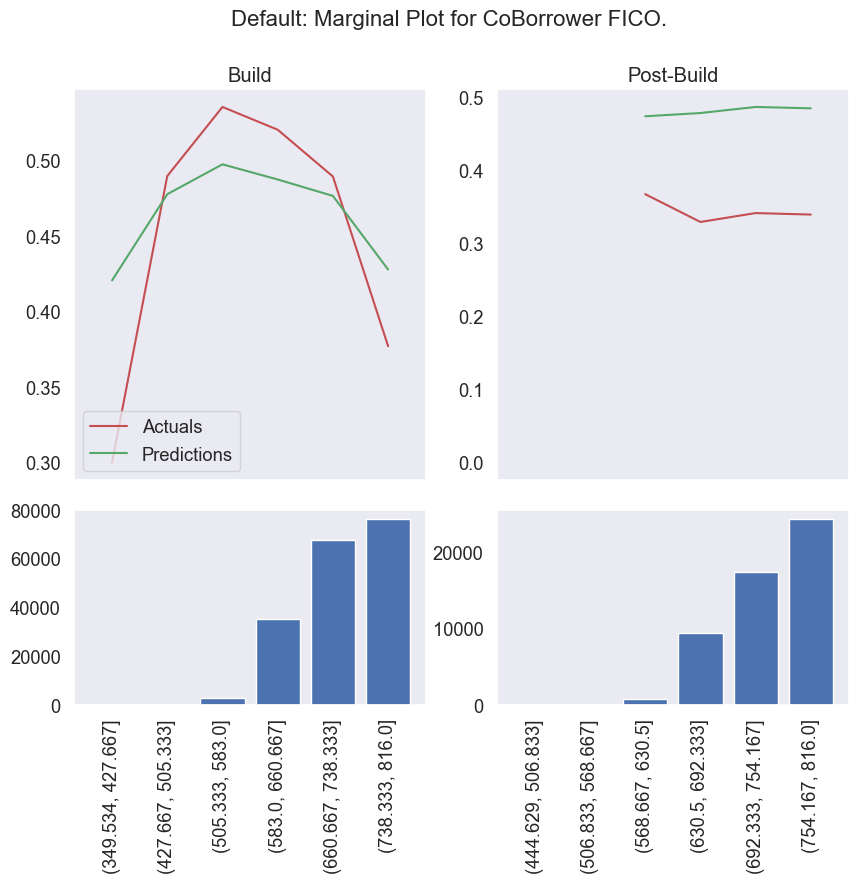

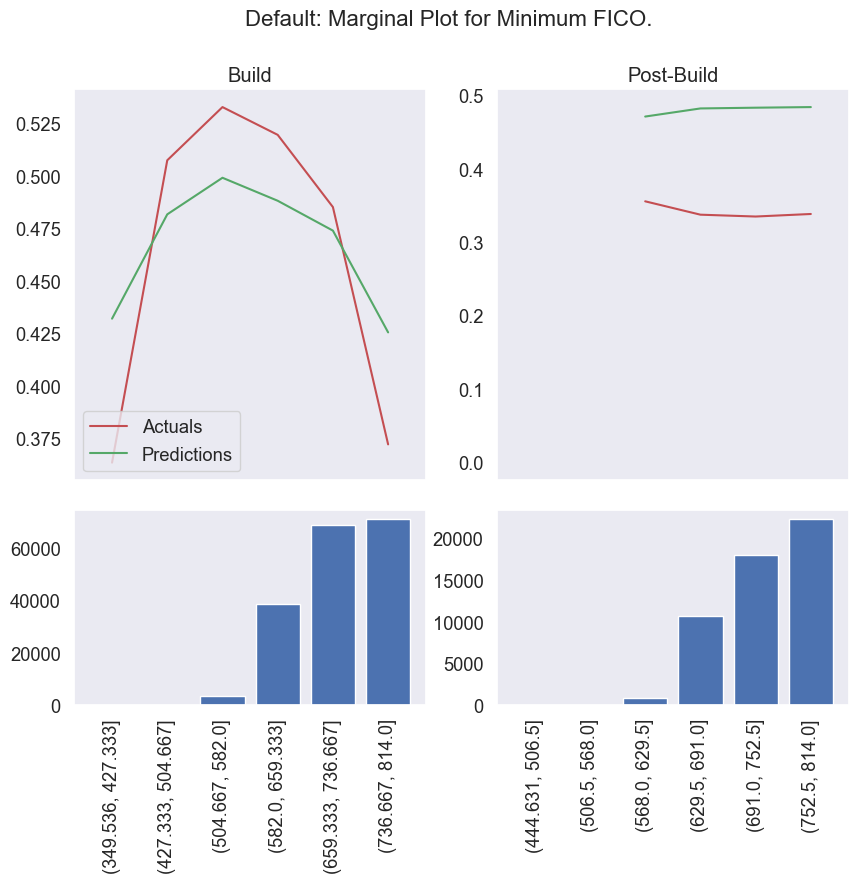

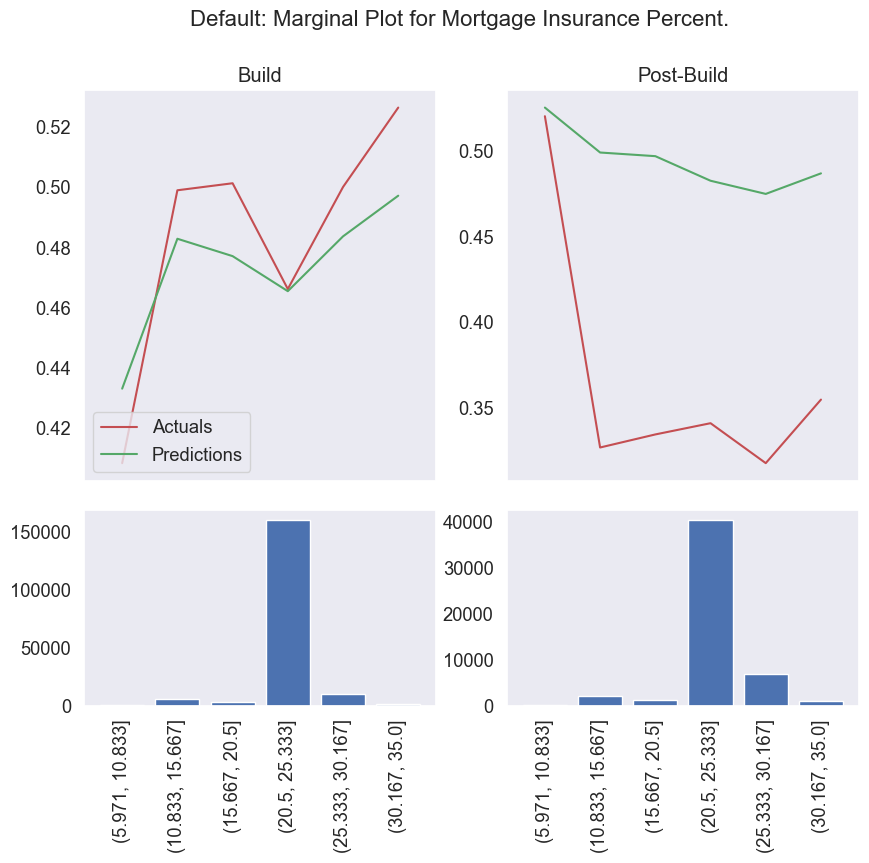

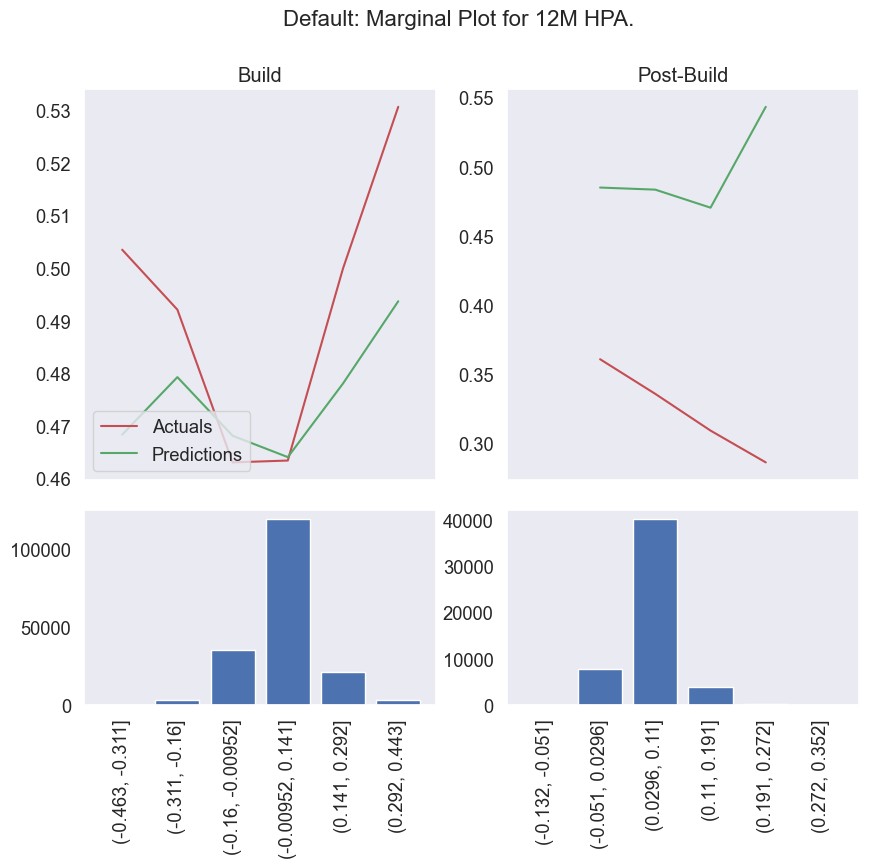

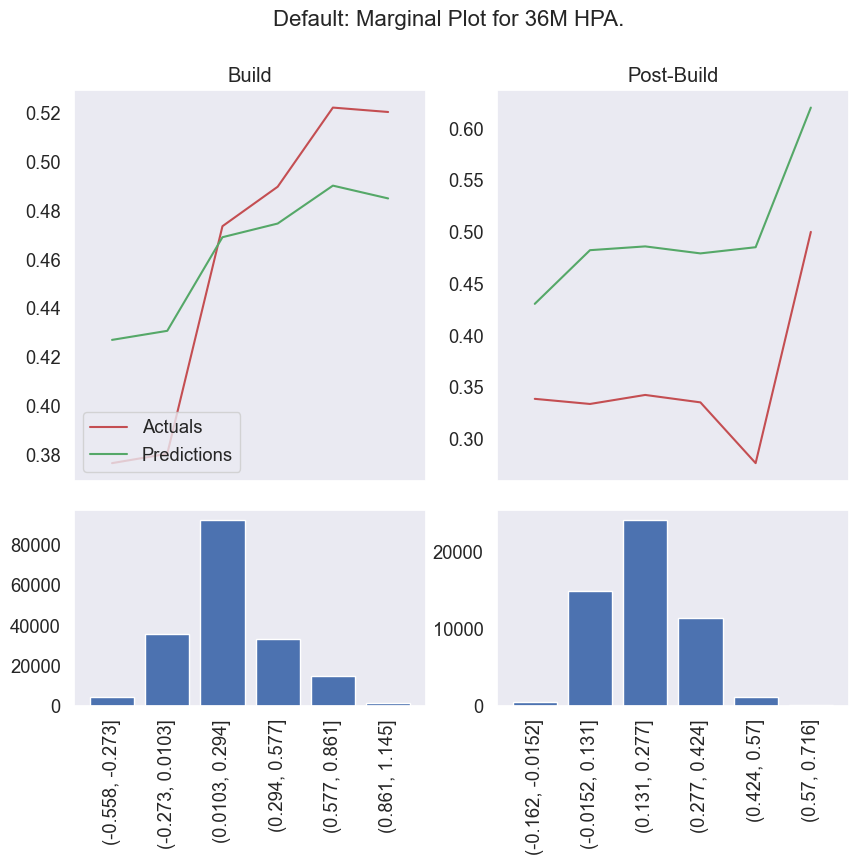

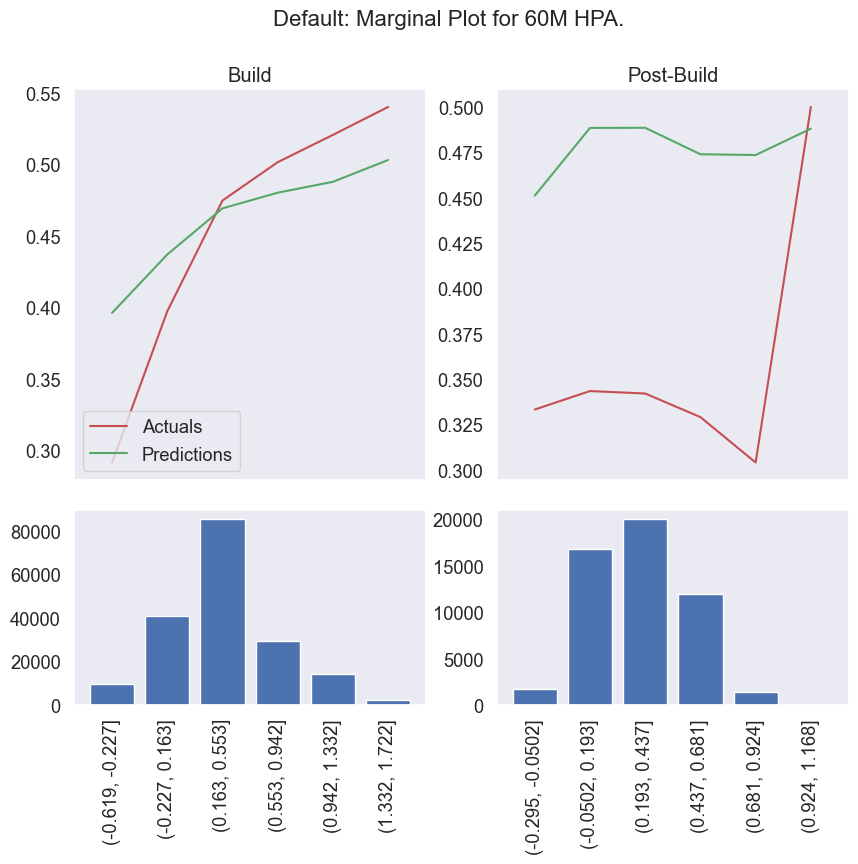

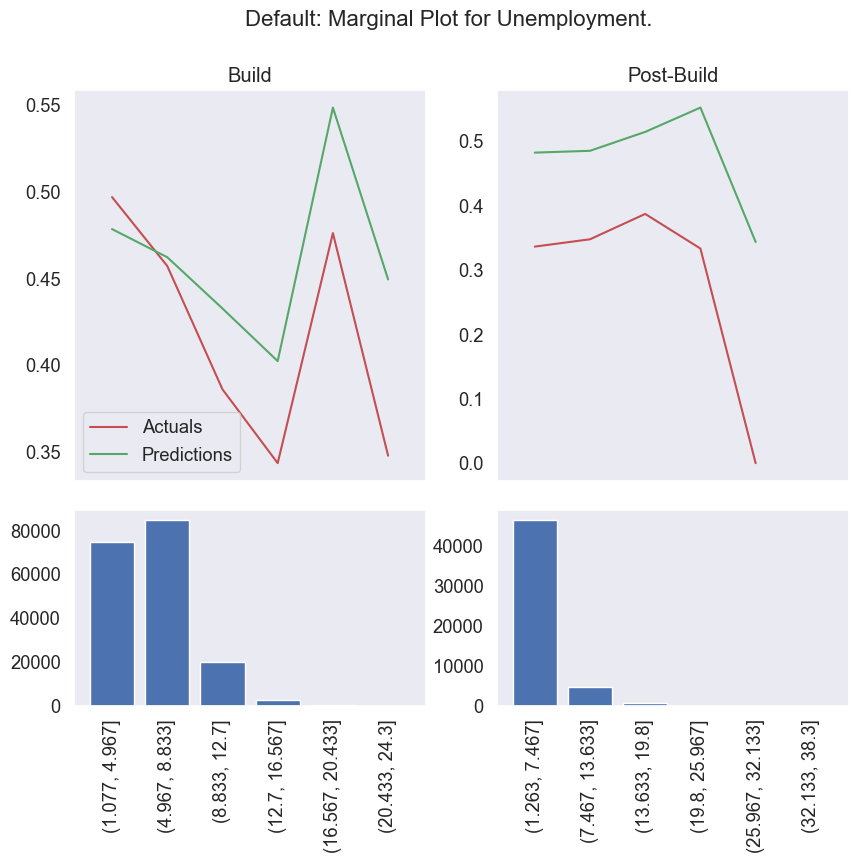

In [183]:
for i,j in zip(x_var_list, x_var_name):

    marginal_plots(df_ins_4plot,df_oot_4plot,i,j,y_var,y_pred,bin_size)

In [187]:
ypred = log_results.predict(X_oot_log)

#cm = confusion_matrix(Y_oot_log,ypred)
#print(cm)

#f1 = f1_score(Y_oot_log, ypred)
#print("f1: %.2f%%" % (f1 * 100.0))

In [185]:
ypred_log = log_results.predict(X_oot_log.values)
roc_auc_score(Y_oot, ypred_log)

0.8088426688048045